# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

# Importing Libraries


# libarary

In [1002]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
#import missingno as msno
#from textwrap import wrap

In [1003]:
# Loading dataset
transaction_df = pd.read_excel('/Users/angelwang/Desktop/KPMG_VI_New_raw_data_update_final.xlsx','Transactions')


In [1004]:
# View data
transaction_df.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                     transaction_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  3                                                                                                                              
4                                                  4                                                                                                                              

   Unnamed: 1   Unnamed: 2           Unnamed: 3    Unnamed: 4    Unnamed: 5  \
0  product_id  customer_id     transaction_date  online_order  order_status   
1           2         2950  2017-02-25 00:00:00         False      Approved   
2           3         3120  2017-05-21 00:00:00          True      Approved   
3          37          402  2017-10-16 00:00:00         False      Approved   
4          88         3135  2017-08-31 00:00:00         False      Approved   

       Unnamed: 6    Unnamed: 7     Unnamed: 8    Unnamed: 9 Unnamed: 10  \
0           brand  product_line  product_class  product_size  list_price   
1           Solex      Standard         medium        medium       71.49   
2   Trek Bicycles      Standard         medium         large     2091.47   
3      OHM Cycles      Standard            low        medium     1793.43   
4  Norco Bicycles      Standard         medium        medium     1198.46   

     Unnamed: 11              Unnamed: 12  
0  standard_cost  product_first_sold_date  
1          53.62                    41245  
2         388.92                    41701  
3         248.82                    36361  
4          381.1                    36145

# Data loading and cleaning

In [1005]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df

0      transaction_id  product_id  customer_id     transaction_date  \
0      transaction_id  product_id  customer_id     transaction_date   
1                   1           2         2950  2017-02-25 00:00:00   
2                   2           3         3120  2017-05-21 00:00:00   
3                   3          37          402  2017-10-16 00:00:00   
4                   4          88         3135  2017-08-31 00:00:00   
...               ...         ...          ...                  ...   
19996           19996          51         1018  2017-06-24 00:00:00   
19997           19997          41          127  2017-11-09 00:00:00   
19998           19998          87         2284  2017-04-14 00:00:00   
19999           19999           6         2764  2017-07-03 00:00:00   
20000           20000          11         1144  2017-09-22 00:00:00   

0      online_order  order_status           brand  product_line  \
0      online_order  order_status           brand  product_line   
1             False      Approved           Solex      Standard   
2              True      Approved   Trek Bicycles      Standard   
3             False      Approved      OHM Cycles      Standard   
4             False      Approved  Norco Bicycles      Standard   
...             ...           ...             ...           ...   
19996          True      Approved      OHM Cycles      Standard   
19997          True      Approved           Solex          Road   
19998          True      Approved      OHM Cycles      Standard   
19999         False      Approved      OHM Cycles      Standard   
20000          True      Approved   Trek Bicycles      Standard   

0      product_class  product_size  list_price  standard_cost  \
0      product_class  product_size  list_price  standard_cost   
1             medium        medium       71.49          53.62   
2             medium         large     2091.47         388.92   
3                low        medium     1793.43         248.82   
4             medium        medium     1198.46          381.1   
...              ...           ...         ...            ...   
19996           high        medium     2005.66         1203.4   
19997         medium        medium      416.98         312.74   
19998         medium        medium      1636.9          44.71   
19999           high        medium      227.88         136.73   
20000         medium         small     1775.81        1580.47   

0      product_first_sold_date  
0      product_first_sold_date  
1                        41245  
2                        41701  
3                        36361  
4                        36145  
...                        ...  
19996                    37823  
19997                    35560  
19998                    40410  
19999                    38216  
20000                    36334  

[20001 rows x 13 columns]

In [1006]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20001 non-null  object
 1   product_id               20001 non-null  object
 2   customer_id              20001 non-null  object
 3   transaction_date         20001 non-null  object
 4   online_order             19641 non-null  object
 5   order_status             20001 non-null  object
 6   brand                    19804 non-null  object
 7   product_line             19804 non-null  object
 8   product_class            19804 non-null  object
 9   product_size             19804 non-null  object
 10  list_price               20001 non-null  object
 11  standard_cost            19804 non-null  object
 12  product_first_sold_date  19804 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [1007]:
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [1008]:
transaction_df

0     transaction_id product_id customer_id     transaction_date online_order  \
1                  1          2        2950  2017-02-25 00:00:00        False   
2                  2          3        3120  2017-05-21 00:00:00         True   
3                  3         37         402  2017-10-16 00:00:00        False   
4                  4         88        3135  2017-08-31 00:00:00        False   
5                  5         78         787  2017-10-01 00:00:00         True   
...              ...        ...         ...                  ...          ...   
19996          19996         51        1018  2017-06-24 00:00:00         True   
19997          19997         41         127  2017-11-09 00:00:00         True   
19998          19998         87        2284  2017-04-14 00:00:00         True   
19999          19999          6        2764  2017-07-03 00:00:00        False   
20000          20000         11        1144  2017-09-22 00:00:00         True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0     list_price standard_cost product_first_sold_date  
1          71.49         53.62                   41245  
2        2091.47        388.92                   41701  
3        1793.43        248.82                   36361  
4        1198.46         381.1                   36145  
5         1765.3        709.48                   42226  
...          ...           ...                     ...  
19996    2005.66        1203.4                   37823  
19997     416.98        312.74                   35560  
19998     1636.9         44.71                   40410  
19999     227.88        136.73                   38216  
20000    1775.81       1580.47                   36334  

[20000 rows x 13 columns]

In [1009]:
transaction_df.describe()

0       transaction_id  product_id  customer_id     transaction_date  \
count            20000       20000        20000                20000   
unique           20000         101         3494                  364   
top                  1           0         2183  2017-02-14 00:00:00   
freq                 1        1378           14                   82   

0      online_order order_status  brand product_line product_class  \
count         19640        20000  19803        19803         19803   
unique            2            2      6            4             3   
top            True     Approved  Solex     Standard        medium   
freq           9829        19821   4253        14176         13826   

0      product_size  list_price  standard_cost  product_first_sold_date  
count         19803    20000.00       19803.00                    19803  
unique            3      296.00         103.00                      100  
top          medium     2091.47         388.92                    33879  
freq          12990      465.00         465.00                      234

In [1010]:
address_df = pd.read_excel('/Users/angelwang/Desktop/KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')
address_df.columns = address_df.iloc[0]


In [1011]:
address_df.drop(index=address_df.index[0], axis=0, inplace=True)
address_df

0    customer_id                    address postcode            state  \
1              1         060 Morning Avenue     2016  New South Wales   
2              2        6 Meadow Vale Court     2153  New South Wales   
3              4         0 Holy Cross Court     4211              QLD   
4              5        17979 Del Mar Point     2448  New South Wales   
5              6           9 Oakridge Court     3216              VIC   
...          ...                        ...      ...              ...   
3995        3999            1482 Hauk Trail     3064              VIC   
3996        4000  57042 Village Green Point     4511              QLD   
3997        4001     87 Crescent Oaks Alley     2756              NSW   
3998        4002           8194 Lien Street     4032              QLD   
3999        4003            320 Acker Drive     2251              NSW   

0       country property_valuation  
1     Australia                 10  
2     Australia                 10  
3     Australia                  9  
4     Australia                  4  
5     Australia                  9  
...         ...                ...  
3995  Australia                  3  
3996  Australia                  6  
3997  Australia                 10  
3998  Australia                  7  
3999  Australia                  7  

[3999 rows x 6 columns]

In [1012]:
address_df.describe()

0       customer_id                  address  postcode state    country  \
count          3999                     3999      3999  3999       3999   
unique         3999                     3996       873     5          1   
top               1  3 Mariners Cove Terrace      2170   NSW  Australia   
freq              1                        2        31  2054       3999   

0       property_valuation  
count                 3999  
unique                  12  
top                      9  
freq                   647

In [1013]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [1014]:
customerdemo_df = pd.read_excel('/Users/angelwang/Desktop/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
customerdemo_df

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/1746748810.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customerdemo_df = pd.read_excel('/Users/angelwang/Desktop/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')


customer_id               name  gender  \
0              34  Jephthah Bachmann       U   
1             144    Jory Barrabeale       U   
2             168   Reggie Broggetti       U   
3             267      Edgar Buckler       U   
4             290     Giorgio Kevane       U   
...           ...                ...     ...   
3995         2858    Benedicto Radki    Male   
3996         3173            Angelo     Male   
3997         3435    Stevena Allcock  Female   
3998         3949  Costa Sleightholm    Male   
3999         3997      Blanch Nisuis  Female   

      past_3_years_bike_related_purchases        DOB    age  \
0                                      59 1843-12-21    NaN   
1                                      71        NaT  120.0   
2                                       8        NaT  120.0   
3                                      53        NaT  120.0   
4                                      42        NaT  120.0   
...                                   ...        ...    ...   
3995                                    4 2002-01-09   18.0   
3996                                   55 2001-10-10   18.0   
3997                                   80 2002-01-15   18.0   
3998                                   24 2001-12-19   18.0   
3999                                   87 2001-07-13   18.0   

                       job_title job_industry_category     wealth_segment  \
0                Legal Assistant                    IT  Affluent Customer   
1             Environmental Tech                    IT      Mass Customer   
2                General Manager                    IT  Affluent Customer   
3                            NaN                    IT     High Net Worth   
4         Senior Sales Associate                    IT      Mass Customer   
...                          ...                   ...                ...   
3995          Recruiting Manager                   NaN      Mass Customer   
3996  Computer Systems Analyst I                Health      Mass Customer   
3997               Senior Editor                   NaN  Affluent Customer   
3998             Web Designer IV         Manufacturing     High Net Worth   
3999             Statistician II         Manufacturing     High Net Worth   

     deceased_indicator owns_car  tenure  
0                     N       No    20.0  
1                     N       No     NaN  
2                     N      Yes     NaN  
3                     N       No     NaN  
4                     N       No     NaN  
...                 ...      ...     ...  
3995                  N      Yes     1.0  
3996                  N      Yes     1.0  
3997                  N       No     1.0  
3998                  N      Yes     1.0  
3999                  N      Yes     1.0  

[4000 rows x 12 columns]

In [1015]:
customerdemo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  3999 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

# EDA - Transaction table merge customer table - dist - strip - rel - heatmap......

## Data Cleaning - Checking and working with missing value

### transaction dataframe

##### dealing with missing value

In [1016]:
transaction_df.head()

0 transaction_id product_id customer_id     transaction_date online_order  \
1              1          2        2950  2017-02-25 00:00:00        False   
2              2          3        3120  2017-05-21 00:00:00         True   
3              3         37         402  2017-10-16 00:00:00        False   
4              4         88        3135  2017-08-31 00:00:00        False   
5              5         78         787  2017-10-01 00:00:00         True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0 list_price standard_cost product_first_sold_date  
1      71.49         53.62                   41245  
2    2091.47        388.92                   41701  
3    1793.43        248.82                   36361  
4    1198.46         381.1                   36145  
5     1765.3        709.48                   42226

In [1017]:
transaction_df['list_price'] = pd.to_numeric(transaction_df['list_price'])
transaction_df['standard_cost'] = pd.to_numeric(transaction_df['standard_cost'])
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])

In [1018]:
transaction_df.isnull().values.sum()

1542

In [1019]:
transaction_df = transaction_df.replace(" ",np.NaN)
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  object        
 1   product_id               20000 non-null  object        
 2   customer_id              20000 non-null  object        
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

<Axes: >

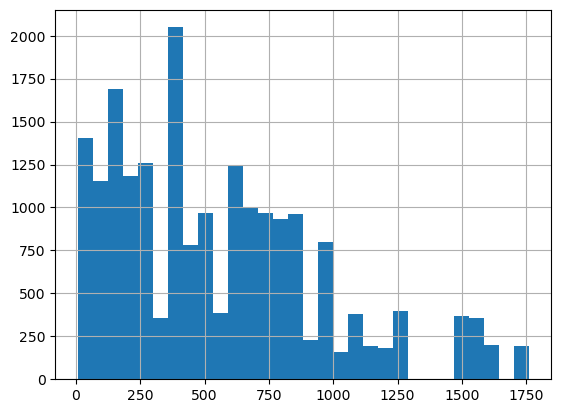

In [1020]:
transaction_df['standard_cost'].hist(bins = 30)
#skewed distribution use median to fill NA values

In [1021]:
transaction_df['standard_cost'] = transaction_df['standard_cost'].fillna(transaction_df['standard_cost'].median())

In [1022]:
def fill_na_with_mode(df):
    for column in df.select_dtypes(include=['object']).columns:
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)
fill_na_with_mode(transaction_df)

In [1023]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  object        
 1   product_id               20000 non-null  object        
 2   customer_id              20000 non-null  object        
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [1024]:
transaction_df.isnull().values.sum()

0

#### customerdemo_df

In [1025]:
customerdemo_df.head()

customer_id               name gender  past_3_years_bike_related_purchases  \
0           34  Jephthah Bachmann      U                                   59   
1          144    Jory Barrabeale      U                                   71   
2          168   Reggie Broggetti      U                                    8   
3          267      Edgar Buckler      U                                   53   
4          290     Giorgio Kevane      U                                   42   

         DOB    age               job_title job_industry_category  \
0 1843-12-21    NaN         Legal Assistant                    IT   
1        NaT  120.0      Environmental Tech                    IT   
2        NaT  120.0         General Manager                    IT   
3        NaT  120.0                     NaN                    IT   
4        NaT  120.0  Senior Sales Associate                    IT   

      wealth_segment deceased_indicator owns_car  tenure  
0  Affluent Customer                  N       No    20.0  
1      Mass Customer                  N       No     NaN  
2  Affluent Customer                  N      Yes     NaN  
3     High Net Worth                  N       No     NaN  
4      Mass Customer                  N       No     NaN

In [1026]:
customerdemo_df.describe()

customer_id  past_3_years_bike_related_purchases          age  \
count  4000.000000                          4000.000000  3999.000000   
mean   2000.500000                            48.890000    44.054514   
std    1154.844867                            28.715005    16.858429   
min       1.000000                             0.000000    18.000000   
25%    1000.750000                            24.000000    33.000000   
50%    2000.500000                            48.000000    43.000000   
75%    3000.250000                            73.000000    53.000000   
max    4000.000000                            99.000000   120.000000   

            tenure  
count  3913.000000  
mean     10.657041  
std       5.660146  
min       1.000000  
25%       6.000000  
50%      11.000000  
75%      15.000000  
max      22.000000

In [1027]:
customerdemo_df
customerdemo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  3999 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [1028]:
customerdemo_df = customerdemo_df.replace(" ",np.NaN)
fill_na_with_mode(customerdemo_df)

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/2224425565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customerdemo_df['age'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='age', ylabel='Density'>

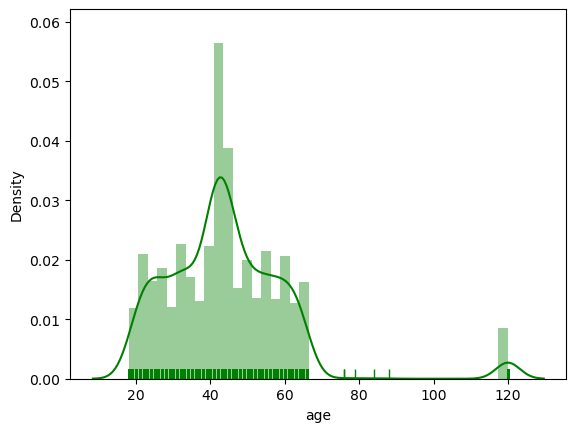

In [1029]:
sns.distplot(customerdemo_df['age'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/955203703.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customerdemo_df['tenure'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='tenure', ylabel='Density'>

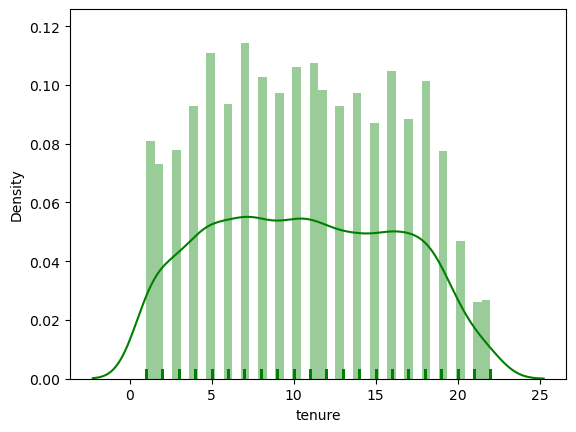

In [1030]:
sns.distplot(customerdemo_df['tenure'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

In [1031]:
customerdemo_df.age.max()
customerdemo_df['age'] = customerdemo_df['age'].apply(lambda x: customerdemo_df['age'].mean() if pd.isna(x) or x > 100 else x)
customerdemo_df['tenure'] = customerdemo_df['tenure'].apply(lambda x: customerdemo_df['tenure'].median() if pd.isna(x) else x)

In [1032]:
customerdemo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   float64       
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [1033]:
customerdemo_df

customer_id               name  gender  \
0              34  Jephthah Bachmann       U   
1             144    Jory Barrabeale       U   
2             168   Reggie Broggetti       U   
3             267      Edgar Buckler       U   
4             290     Giorgio Kevane       U   
...           ...                ...     ...   
3995         2858    Benedicto Radki    Male   
3996         3173            Angelo     Male   
3997         3435    Stevena Allcock  Female   
3998         3949  Costa Sleightholm    Male   
3999         3997      Blanch Nisuis  Female   

      past_3_years_bike_related_purchases        DOB        age  \
0                                      59 1843-12-21  44.054514   
1                                      71        NaT  44.054514   
2                                       8        NaT  44.054514   
3                                      53        NaT  44.054514   
4                                      42        NaT  44.054514   
...                                   ...        ...        ...   
3995                                    4 2002-01-09  18.000000   
3996                                   55 2001-10-10  18.000000   
3997                                   80 2002-01-15  18.000000   
3998                                   24 2001-12-19  18.000000   
3999                                   87 2001-07-13  18.000000   

                                 job_title job_industry_category  \
0                          Legal Assistant                    IT   
1                       Environmental Tech                    IT   
2                          General Manager                    IT   
3     Business Systems Development Analyst                    IT   
4                   Senior Sales Associate                    IT   
...                                    ...                   ...   
3995                    Recruiting Manager         Manufacturing   
3996            Computer Systems Analyst I                Health   
3997                         Senior Editor         Manufacturing   
3998                       Web Designer IV         Manufacturing   
3999                       Statistician II         Manufacturing   

         wealth_segment deceased_indicator owns_car  tenure  
0     Affluent Customer                  N       No    20.0  
1         Mass Customer                  N       No    11.0  
2     Affluent Customer                  N      Yes    11.0  
3        High Net Worth                  N       No    11.0  
4         Mass Customer                  N       No    11.0  
...                 ...                ...      ...     ...  
3995      Mass Customer                  N      Yes     1.0  
3996      Mass Customer                  N      Yes     1.0  
3997  Affluent Customer                  N       No     1.0  
3998     High Net Worth                  N      Yes     1.0  
3999     High Net Worth                  N      Yes     1.0  

[4000 rows x 12 columns]

In [1034]:
Year_of_Collection = (customerdemo_df['DOB'].dt.year + customerdemo_df['age']).mode()

Year_of_Collection

0    2019.0
dtype: float64

In [1035]:
customerdemo_df['DOB'] = customerdemo_df.apply(
    lambda row: pd.Timestamp(2019 - int(row['age']), 1, 1) if pd.isna(row['DOB']) else row['DOB'],
    axis=1
)

In [1036]:
customerdemo_df['DOB'].value_counts().sort_index() # impossible to have DOB 1843 to make an order 

1843-12-21    1
1931-10-23    1
1935-08-22    1
1940-09-22    1
1943-08-11    1
             ..
2002-01-06    1
2002-01-09    1
2002-01-15    1
2002-01-26    1
2002-03-11    1
Name: DOB, Length: 3449, dtype: int64

In [1037]:
customerdemo_df.loc[customerdemo_df['DOB'] == '1843-12-21', 'DOB'] = customerdemo_df.loc[customerdemo_df['DOB'] == '1843-12-21', 'age'].apply(
lambda x: pd.Timestamp(2019 - int(x), 1, 1))

In [1038]:
np.random.seed(42)
mask = customerdemo_df['gender'] == 'U'
customerdemo_df.loc[mask, 'gender'] = np.random.choice(['Male', 'Female'], size=mask.sum())

In [1039]:
customerdemo_df

customer_id               name  gender  \
0              34  Jephthah Bachmann    Male   
1             144    Jory Barrabeale  Female   
2             168   Reggie Broggetti    Male   
3             267      Edgar Buckler    Male   
4             290     Giorgio Kevane    Male   
...           ...                ...     ...   
3995         2858    Benedicto Radki    Male   
3996         3173            Angelo     Male   
3997         3435    Stevena Allcock  Female   
3998         3949  Costa Sleightholm    Male   
3999         3997      Blanch Nisuis  Female   

      past_3_years_bike_related_purchases        DOB        age  \
0                                      59 1975-01-01  44.054514   
1                                      71 1975-01-01  44.054514   
2                                       8 1975-01-01  44.054514   
3                                      53 1975-01-01  44.054514   
4                                      42 1975-01-01  44.054514   
...                                   ...        ...        ...   
3995                                    4 2002-01-09  18.000000   
3996                                   55 2001-10-10  18.000000   
3997                                   80 2002-01-15  18.000000   
3998                                   24 2001-12-19  18.000000   
3999                                   87 2001-07-13  18.000000   

                                 job_title job_industry_category  \
0                          Legal Assistant                    IT   
1                       Environmental Tech                    IT   
2                          General Manager                    IT   
3     Business Systems Development Analyst                    IT   
4                   Senior Sales Associate                    IT   
...                                    ...                   ...   
3995                    Recruiting Manager         Manufacturing   
3996            Computer Systems Analyst I                Health   
3997                         Senior Editor         Manufacturing   
3998                       Web Designer IV         Manufacturing   
3999                       Statistician II         Manufacturing   

         wealth_segment deceased_indicator owns_car  tenure  
0     Affluent Customer                  N       No    20.0  
1         Mass Customer                  N       No    11.0  
2     Affluent Customer                  N      Yes    11.0  
3        High Net Worth                  N       No    11.0  
4         Mass Customer                  N       No    11.0  
...                 ...                ...      ...     ...  
3995      Mass Customer                  N      Yes     1.0  
3996      Mass Customer                  N      Yes     1.0  
3997  Affluent Customer                  N       No     1.0  
3998     High Net Worth                  N      Yes     1.0  
3999     High Net Worth                  N      Yes     1.0  

[4000 rows x 12 columns]

In [1040]:
customerdemo_df.isnull().values.sum()

0

##### address_df

In [1041]:
address_df.head()

0 customer_id              address postcode            state    country  \
1           1   060 Morning Avenue     2016  New South Wales  Australia   
2           2  6 Meadow Vale Court     2153  New South Wales  Australia   
3           4   0 Holy Cross Court     4211              QLD  Australia   
4           5  17979 Del Mar Point     2448  New South Wales  Australia   
5           6     9 Oakridge Court     3216              VIC  Australia   

0 property_valuation  
1                 10  
2                 10  
3                  9  
4                  4  
5                  9

In [1042]:
address_df.describe()

0       customer_id                  address  postcode state    country  \
count          3999                     3999      3999  3999       3999   
unique         3999                     3996       873     5          1   
top               1  3 Mariners Cove Terrace      2170   NSW  Australia   
freq              1                        2        31  2054       3999   

0       property_valuation  
count                 3999  
unique                  12  
top                      9  
freq                   647

In [1043]:
address_df.isnull().values.sum()

0

##### EDA

##### transaction_df

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/3847743446.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction_df['list_price'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='list_price', ylabel='Density'>

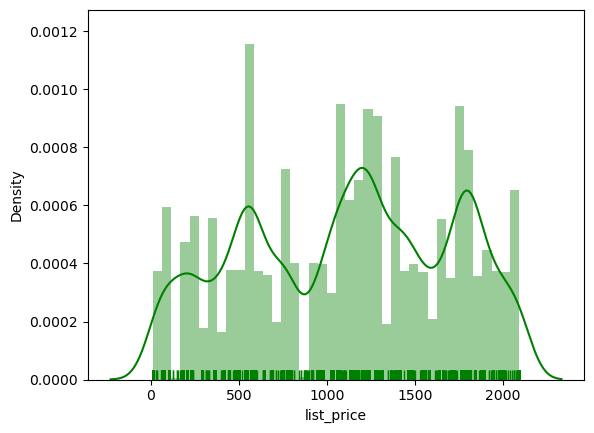

In [1044]:
#not a typical distribution
sns.distplot(transaction_df['list_price'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

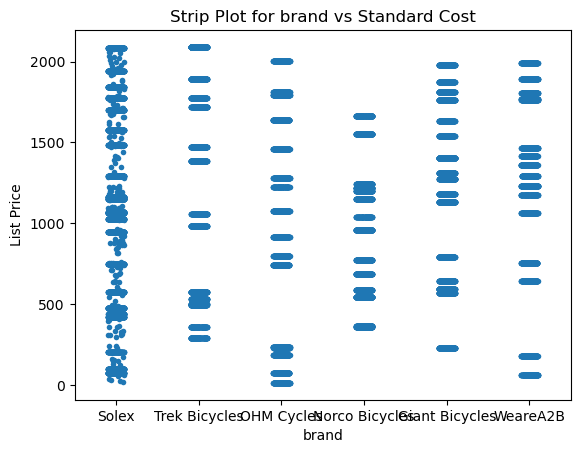

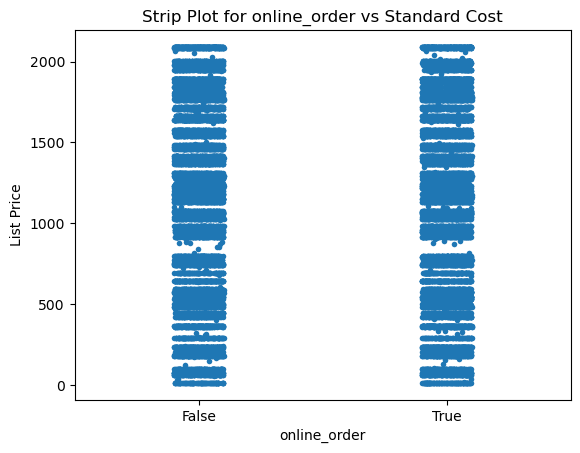

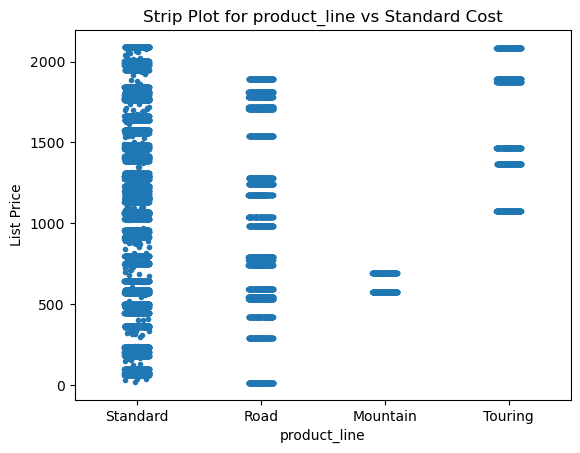

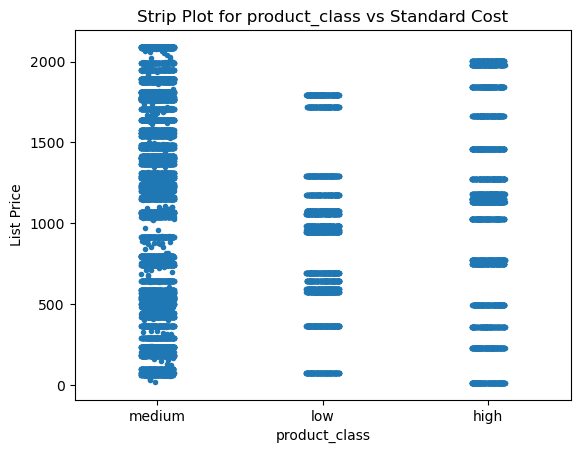

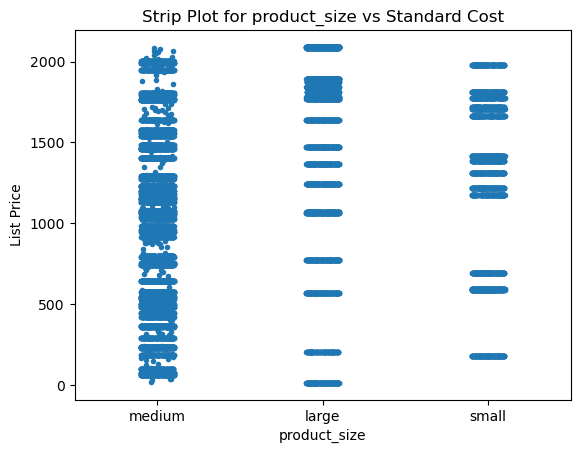

In [1045]:
columns = ['brand', 'online_order', 'product_line', 'product_class', 'product_size']

# Create strip plots
for column in columns:
    sns.stripplot(x=column, y='list_price', data=transaction_df, jitter=True,
                  color=None, size=4, edgecolor="gray", linewidth=0)
    plt.title(f'Strip Plot for {column} vs Standard Cost')
    plt.xlabel(column)
    plt.ylabel('List Price')
    plt.show()

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/1383274620.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction_df['standard_cost'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='standard_cost', ylabel='Density'>

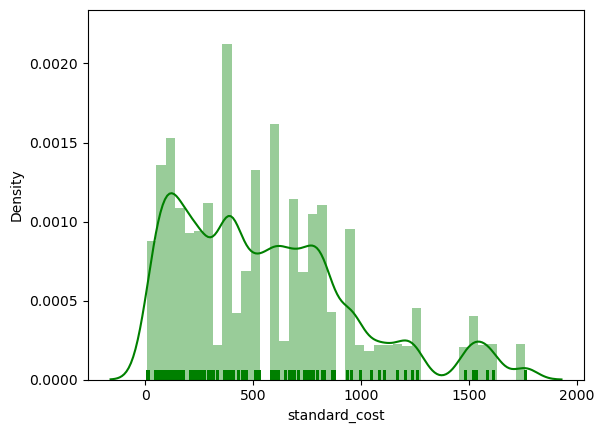

In [1046]:
# right skewed distribution
sns.distplot(transaction_df['standard_cost'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

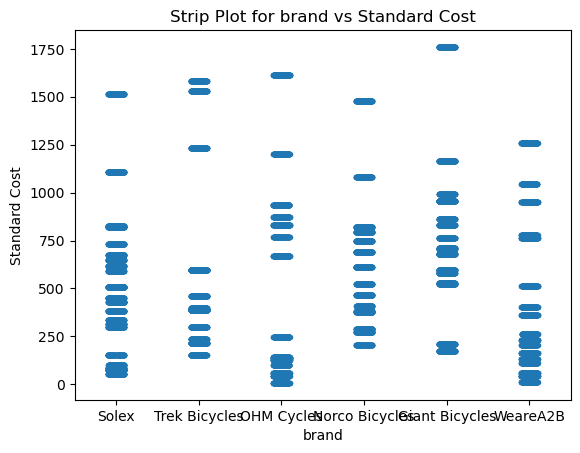

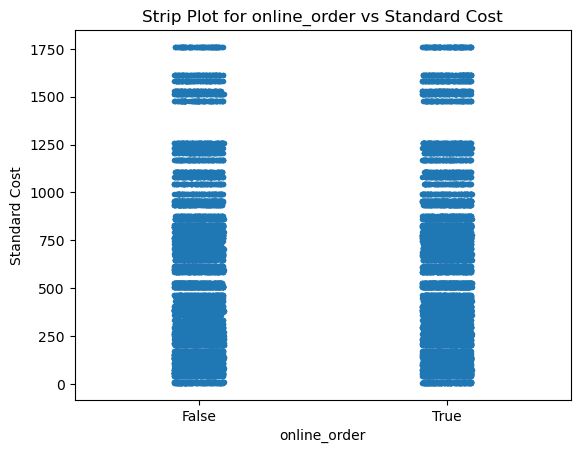

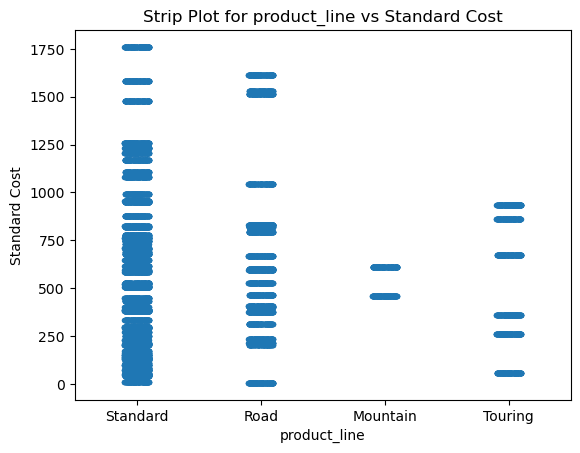

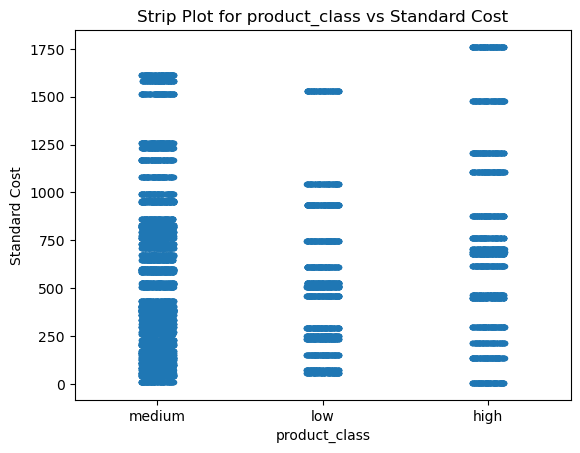

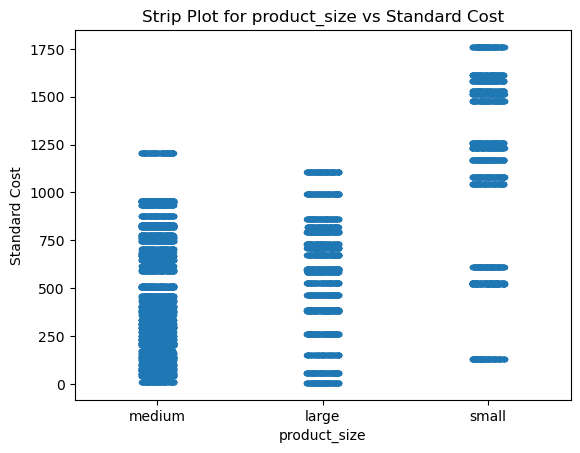

In [1047]:
for column in columns:
    sns.stripplot(x=column, y='standard_cost', data=transaction_df, jitter=True,
                  color=None, size=4, edgecolor="gray", linewidth=0)
    plt.title(f'Strip Plot for {column} vs Standard Cost')
    plt.xlabel(column)
    plt.ylabel('Standard Cost')
    plt.show()

In [1048]:
transaction_df['standard_cost'].median()

507.58

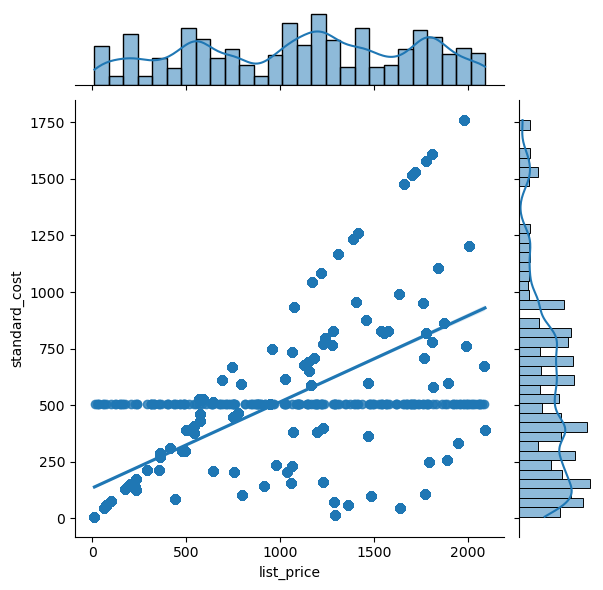

In [1049]:
sns.jointplot(x='list_price', y='standard_cost',
                      data=transaction_df,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)
#the dots in the middle is transaction_df['standard_cost'].median() which filled all the NA values

##### customerdemo_df

In [1050]:
customerdemo_df

customer_id               name  gender  \
0              34  Jephthah Bachmann    Male   
1             144    Jory Barrabeale  Female   
2             168   Reggie Broggetti    Male   
3             267      Edgar Buckler    Male   
4             290     Giorgio Kevane    Male   
...           ...                ...     ...   
3995         2858    Benedicto Radki    Male   
3996         3173            Angelo     Male   
3997         3435    Stevena Allcock  Female   
3998         3949  Costa Sleightholm    Male   
3999         3997      Blanch Nisuis  Female   

      past_3_years_bike_related_purchases        DOB        age  \
0                                      59 1975-01-01  44.054514   
1                                      71 1975-01-01  44.054514   
2                                       8 1975-01-01  44.054514   
3                                      53 1975-01-01  44.054514   
4                                      42 1975-01-01  44.054514   
...                                   ...        ...        ...   
3995                                    4 2002-01-09  18.000000   
3996                                   55 2001-10-10  18.000000   
3997                                   80 2002-01-15  18.000000   
3998                                   24 2001-12-19  18.000000   
3999                                   87 2001-07-13  18.000000   

                                 job_title job_industry_category  \
0                          Legal Assistant                    IT   
1                       Environmental Tech                    IT   
2                          General Manager                    IT   
3     Business Systems Development Analyst                    IT   
4                   Senior Sales Associate                    IT   
...                                    ...                   ...   
3995                    Recruiting Manager         Manufacturing   
3996            Computer Systems Analyst I                Health   
3997                         Senior Editor         Manufacturing   
3998                       Web Designer IV         Manufacturing   
3999                       Statistician II         Manufacturing   

         wealth_segment deceased_indicator owns_car  tenure  
0     Affluent Customer                  N       No    20.0  
1         Mass Customer                  N       No    11.0  
2     Affluent Customer                  N      Yes    11.0  
3        High Net Worth                  N       No    11.0  
4         Mass Customer                  N       No    11.0  
...                 ...                ...      ...     ...  
3995      Mass Customer                  N      Yes     1.0  
3996      Mass Customer                  N      Yes     1.0  
3997  Affluent Customer                  N       No     1.0  
3998     High Net Worth                  N      Yes     1.0  
3999     High Net Worth                  N      Yes     1.0  

[4000 rows x 12 columns]

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/197762679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customerdemo_df['past_3_years_bike_related_purchases'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='Density'>

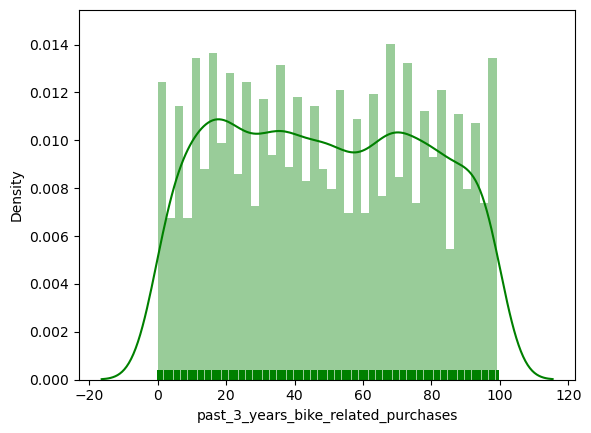

In [1051]:
sns.distplot(customerdemo_df['past_3_years_bike_related_purchases'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

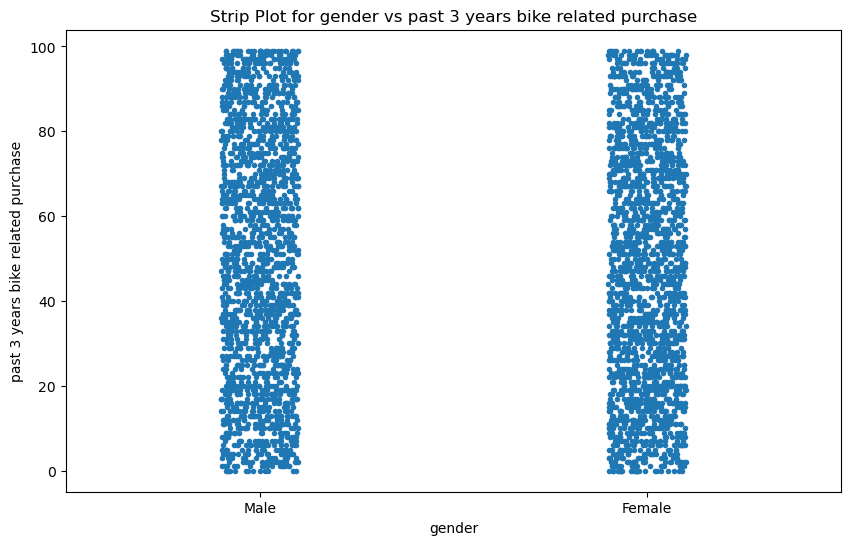

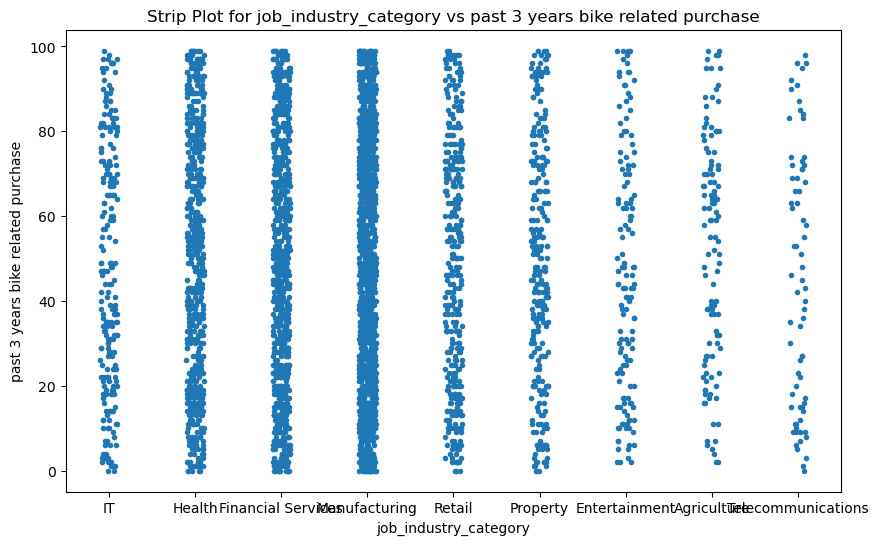

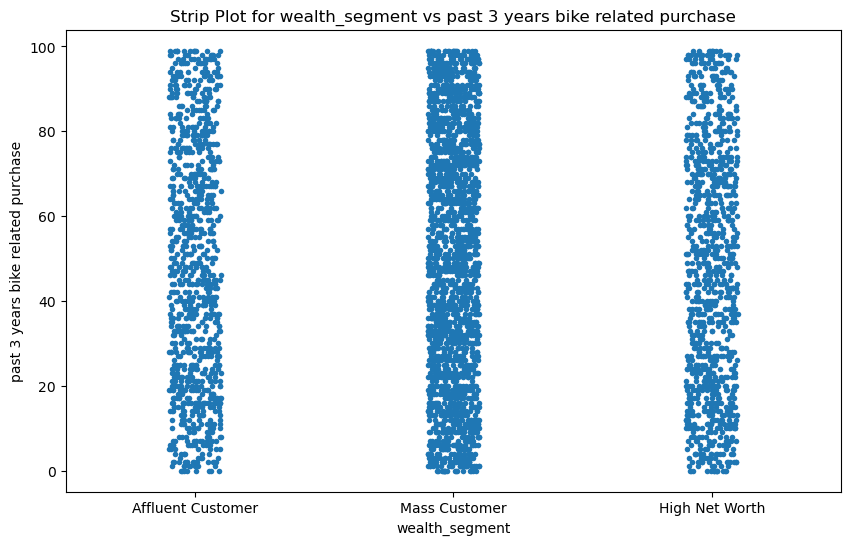

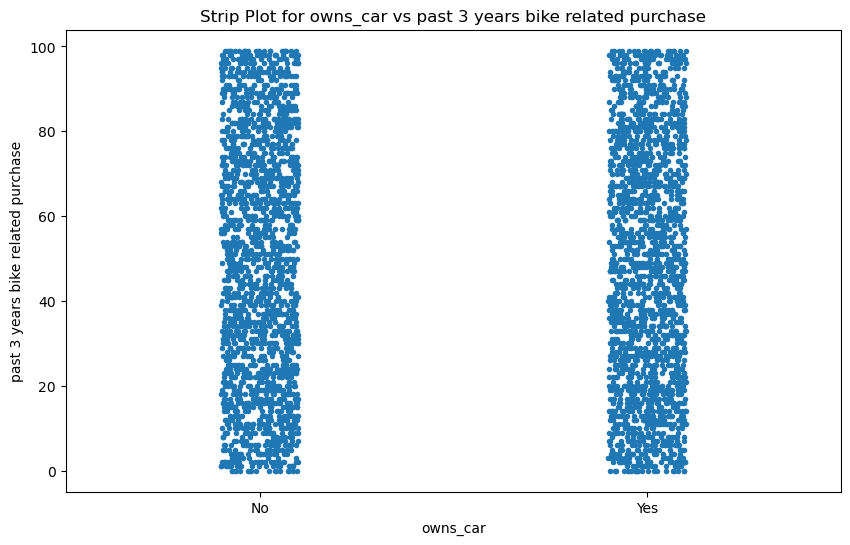

In [1052]:
columns = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car']

# Create strip plots
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x=column, y='past_3_years_bike_related_purchases', data=customerdemo_df, jitter=True,
                  color=None, size=4, edgecolor="gray", linewidth=0)
    plt.title(f'Strip Plot for {column} vs past 3 years bike related purchase')
    plt.xlabel(column)
    plt.ylabel('past 3 years bike related purchase')
    plt.show()

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/2224425565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customerdemo_df['age'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='age', ylabel='Density'>

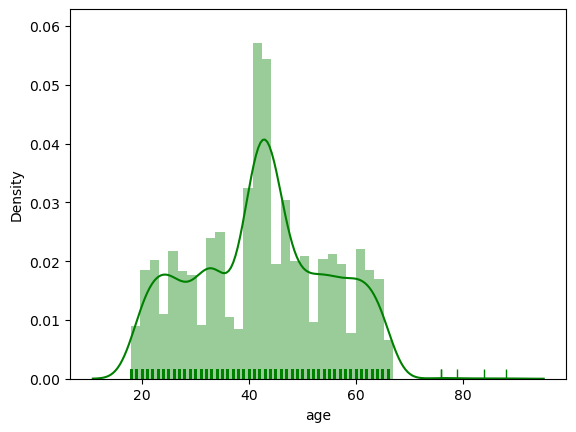

In [1053]:
sns.distplot(customerdemo_df['age'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

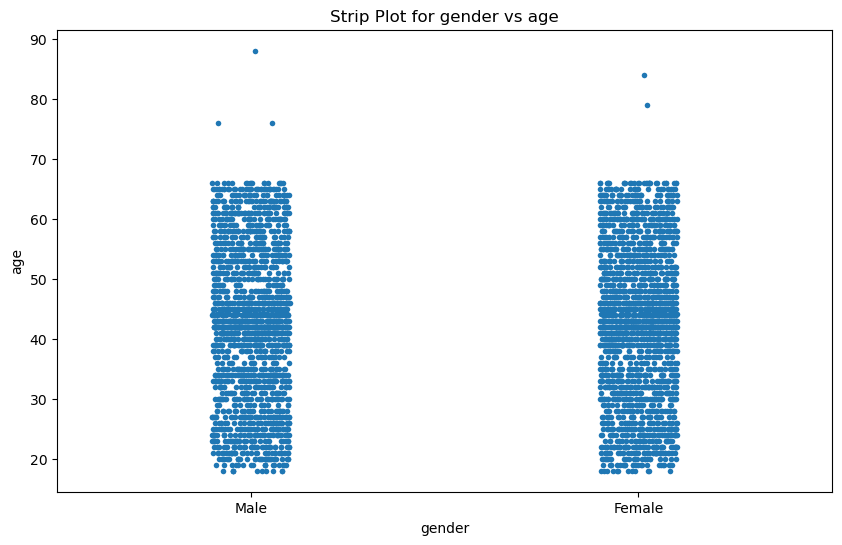

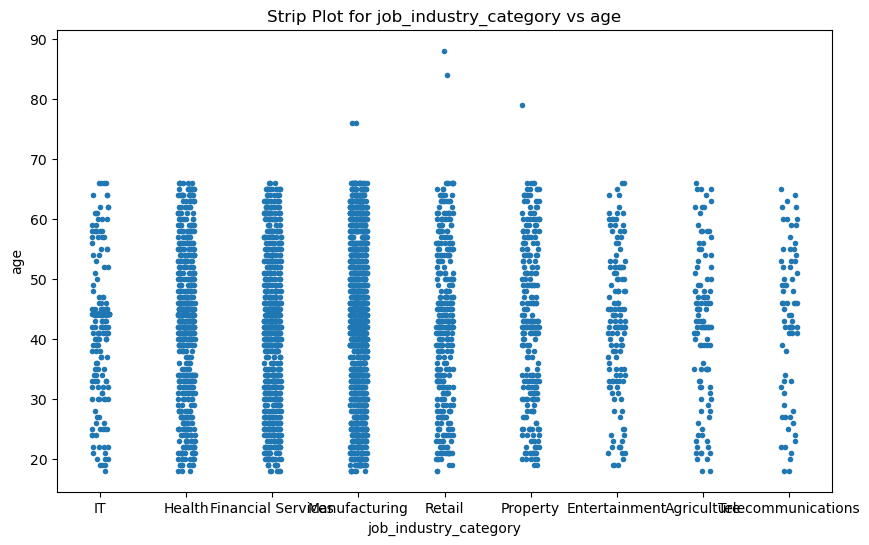

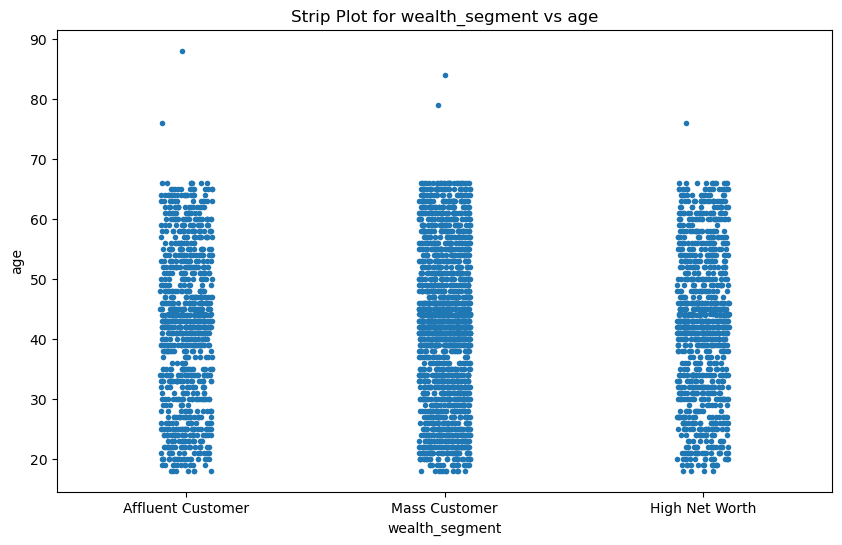

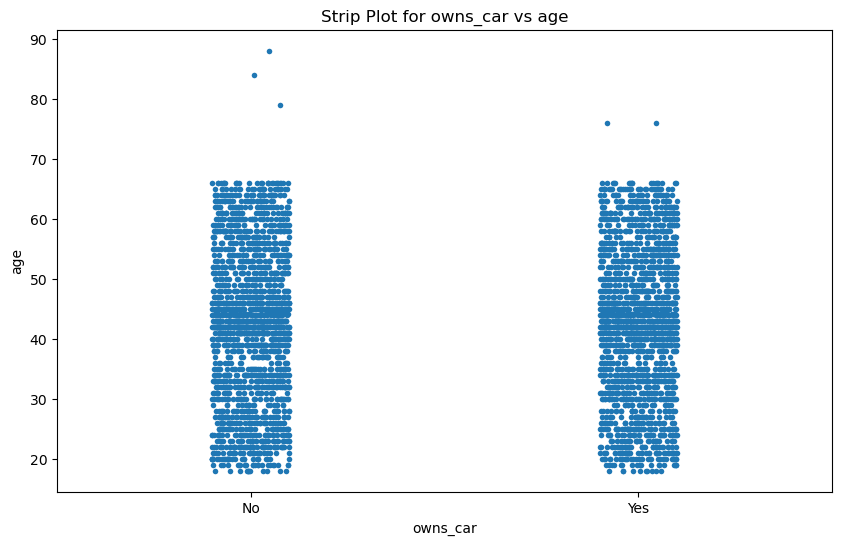

In [1054]:
# Create strip plots
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x=column, y='age', data=customerdemo_df, jitter=True,
                  color=None, size=4, edgecolor="gray", linewidth=0)
    plt.title(f'Strip Plot for {column} vs age')
    plt.xlabel(column)
    plt.ylabel('age')
    plt.show()

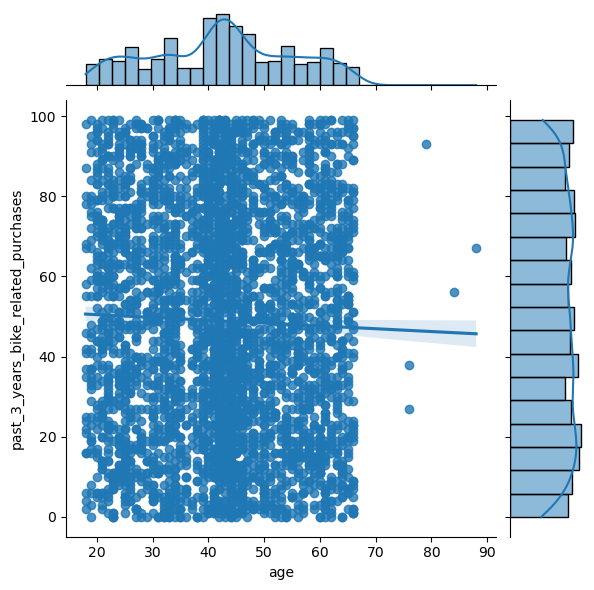

In [1055]:
sns.jointplot(x='age', y='past_3_years_bike_related_purchases',
                      data=customerdemo_df,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)
#the dots in the middle is transaction_df['standard_cost'].median() which filled all the NA values

In [1056]:
merged_df = pd.merge(transaction_df, customerdemo_df, on='customer_id', how='left')
final_df = pd.merge(merged_df, address_df, on='customer_id', how='left')
final_df

transaction_id product_id customer_id transaction_date  online_order  \
0                  1          2        2950       2017-02-25         False   
1                  2          3        3120       2017-05-21          True   
2                  3         37         402       2017-10-16         False   
3                  4         88        3135       2017-08-31         False   
4                  5         78         787       2017-10-01          True   
...              ...        ...         ...              ...           ...   
19995          19996         51        1018       2017-06-24          True   
19996          19997         41         127       2017-11-09          True   
19997          19998         87        2284       2017-04-14          True   
19998          19999          6        2764       2017-07-03         False   
19999          20000         11        1144       2017-09-22          True   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19995     Approved      OHM Cycles     Standard          high       medium   
19996     Approved           Solex         Road        medium       medium   
19997     Approved      OHM Cycles     Standard        medium       medium   
19998     Approved      OHM Cycles     Standard          high       medium   
19999     Approved   Trek Bicycles     Standard        medium        small   

       ...  job_industry_category     wealth_segment  deceased_indicator  \
0      ...     Financial Services      Mass Customer                   N   
1      ...                 Health      Mass Customer                   N   
2      ...                 Retail  Affluent Customer                   N   
3      ...     Financial Services      Mass Customer                   N   
4      ...                 Retail  Affluent Customer                   N   
...    ...                    ...                ...                 ...   
19995  ...          Manufacturing      Mass Customer                   N   
19996  ...     Financial Services      Mass Customer                   N   
19997  ...     Telecommunications     High Net Worth                   N   
19998  ...     Financial Services      Mass Customer                   N   
19999  ...                 Health     High Net Worth                   N   

      owns_car tenure               address postcode  state    country  \
0          Yes   10.0     984 Hoepker Court     3064    VIC  Australia   
1          Yes   10.0       4 Shopko Circle     2196    NSW  Australia   
2           No   22.0    586 Miller Parkway     2835    NSW  Australia   
3           No   16.0   1617 Harper Parkway     2096    NSW  Australia   
4          Yes    2.0    0601 Stephen Place     2292    NSW  Australia   
...        ...    ...                   ...      ...    ...        ...   
19995      Yes    7.0         3 Hayes Court     3109    VIC  Australia   
19996       No   19.0    0 Pearson Crossing     4405    QLD  Australia   
19997       No   14.0  10055 Old Shore Lane     3630    VIC  Australia   
19998      Yes   20.0       1 Wayridge Park     4301    QLD  Australia   
19999      Yes    5.0      4439 7th Terrace     2177    NSW  Australia   

      property_valuation  
0                      6  
1                      5  
2                      1  
3                     10  
4                      7  
...                  ...  
19995                 10  
19996                  1  
19997                  1  
19998                  1  
19999                  9  

[2000

In [1057]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  object        
 1   product_id                           20000 non-null  object        
 2   customer_id                          20000 non-null  object        
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  bool          
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price

In [1058]:
final_df.isnull().values.sum()

193

In [1059]:
final_df[final_df.name.isnull() == True]

transaction_id product_id customer_id transaction_date  online_order  \
8707            8708          0        5034       2017-10-07         False   
16700          16701          0        5034       2017-01-27         False   
17468          17469          0        5034       2017-01-03         False   

      order_status           brand product_line product_class product_size  \
8707      Approved           Solex         Road        medium       medium   
16700     Approved  Norco Bicycles     Standard        medium       medium   
17468     Approved      OHM Cycles         Road        medium       medium   

       ...  job_industry_category  wealth_segment  deceased_indicator  \
8707   ...                    NaN             NaN                 NaN   
16700  ...                    NaN             NaN                 NaN   
17468  ...                    NaN             NaN                 NaN   

      owns_car tenure  address postcode  state country property_valuation  
8707       NaN    NaN      NaN      NaN    NaN     NaN                NaN  
16700      NaN    NaN      NaN      NaN    NaN     NaN                NaN  
17468      NaN    NaN      NaN      NaN    NaN     NaN                NaN  

[3 rows x 29 columns]

In [1060]:
customerdemo_df[customerdemo_df.customer_id == 5034]

Empty DataFrame
Columns: [customer_id, name, gender, past_3_years_bike_related_purchases, DOB, age, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure]
Index: []

In [1061]:
final_df[final_df.address.isnull() == True]

transaction_id product_id customer_id transaction_date  online_order  \
117              118         20          22       2017-03-21         False   
3479            3480         32          22       2017-09-18         False   
3503            3504         38          22       2017-07-16          True   
4564            4565          5          10       2017-08-26         False   
4600            4601         65          22       2017-05-29          True   
5597            5598         85          23       2017-12-20         False   
5955            5956         21          10       2017-06-20          True   
7428            7429         54          23       2017-10-06         False   
7694            7695          0          23       2017-04-02          True   
7950            7951         19          23       2017-08-03          True   
8206            8207         53          22       2017-09-19         False   
8707            8708          0        5034       2017-10-07         False   
10249          10250         44          10       2017-07-13          True   
10301          10302         33           3       2017-02-23         False   
11004          11005         94           3       2017-09-16         False   
11783          11784         55           3       2017-04-21          True   
12953          12954         77           3       2017-04-05         False   
13284          13285         47           3       2017-09-04         False   
14898          14899         69          10       2017-08-09         False   
14955          14956         45          22       2017-09-24          True   
15187          15188         82           3       2017-03-24         False   
15586          15587         77          23       2017-10-09          True   
16094          16095          0          10       2017-11-27         False   
16625          16626        100          22       2017-03-10         False   
16700          16701          0        5034       2017-01-27         False   
16724          16725         90           3       2017-06-26          True   
17001          17002         64          22       2017-01-06          True   
17468          17469          0        5034       2017-01-03         False   
17697          17698         98          23       2017-05-16         False   
18218          18219          0          23       2017-03-27          True   
18945          18946         53          10       2017-11-17         False   
19497          19498          5           3       2017-09-19         False   

      order_status           brand product_line product_class product_size  \
117       Approved   Trek Bicycles     Standard        medium        small   
3479      Approved  Giant Bicycles     Standard        medium       medium   
3503      Approved           Solex     Standard        medium       medium   
4564      Approved   Trek Bicycles     Mountain           low       medium   
4600      Approved        WeareA2B     Standard        medium       medium   
5597      Approved        WeareA2B     Standard        medium       medium   
5955      Approved           Solex     Standard        medium        large   
7428      Approved        WeareA2B     Standard        medium       medium   
7694      Approved           Solex     Standard        medium       medium   
7950      Approved   Trek Bicycles     Mountain           low       medium   
8206      Approved      OHM Cycles     Standard        medium       medium   
8707      Approved           Solex         Road        medium       medium   
10249     Approved        WeareA2B     Standard        medium       medium   
10301     Approved  Giant Bicycles     Standard        medium        small   
11004     Approved  Giant Bicycles     Standard        medium        large   
11783     Approved   Trek Bicycles         Road        medium        large   
12953     Approved  Norco Bicycles         Road        medium        large   
13284     Approved   Trek B

In [1062]:
rows_with_nulls = final_df[final_df.isnull().any(axis=1)]

null_counts = rows_with_nulls.isnull().sum(axis=1)
null_counts.value_counts()
# columns with null may be those who are age > 100 which are impossible to purchase for bike, therefore decide to dropp all those line

5     29
16     3
dtype: int64

In [1063]:
df = final_df[~final_df.name.isnull()]

In [1064]:
df['profit'] = df.apply(lambda row: row['list_price'] - row['standard_cost'], axis=1)
df

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/81667950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit'] = df.apply(lambda row: row['list_price'] - row['standard_cost'], axis=1)


transaction_id product_id customer_id transaction_date  online_order  \
0                  1          2        2950       2017-02-25         False   
1                  2          3        3120       2017-05-21          True   
2                  3         37         402       2017-10-16         False   
3                  4         88        3135       2017-08-31         False   
4                  5         78         787       2017-10-01          True   
...              ...        ...         ...              ...           ...   
19995          19996         51        1018       2017-06-24          True   
19996          19997         41         127       2017-11-09          True   
19997          19998         87        2284       2017-04-14          True   
19998          19999          6        2764       2017-07-03         False   
19999          20000         11        1144       2017-09-22          True   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19995     Approved      OHM Cycles     Standard          high       medium   
19996     Approved           Solex         Road        medium       medium   
19997     Approved      OHM Cycles     Standard        medium       medium   
19998     Approved      OHM Cycles     Standard          high       medium   
19999     Approved   Trek Bicycles     Standard        medium        small   

       ...     wealth_segment  deceased_indicator  owns_car tenure  \
0      ...      Mass Customer                   N       Yes   10.0   
1      ...      Mass Customer                   N       Yes   10.0   
2      ...  Affluent Customer                   N        No   22.0   
3      ...      Mass Customer                   N        No   16.0   
4      ...  Affluent Customer                   N       Yes    2.0   
...    ...                ...                 ...       ...    ...   
19995  ...      Mass Customer                   N       Yes    7.0   
19996  ...      Mass Customer                   N        No   19.0   
19997  ...     High Net Worth                   N        No   14.0   
19998  ...      Mass Customer                   N       Yes   20.0   
19999  ...     High Net Worth                   N       Yes    5.0   

                    address  postcode state    country property_valuation  \
0         984 Hoepker Court      3064   VIC  Australia                  6   
1           4 Shopko Circle      2196   NSW  Australia                  5   
2        586 Miller Parkway      2835   NSW  Australia                  1   
3       1617 Harper Parkway      2096   NSW  Australia                 10   
4        0601 Stephen Place      2292   NSW  Australia                  7   
...                     ...       ...   ...        ...                ...   
19995         3 Hayes Court      3109   VIC  Australia                 10   
19996    0 Pearson Crossing      4405   QLD  Australia                  1   
19997  10055 Old Shore Lane      3630   VIC  Australia                  1   
19998       1 Wayridge Park      4301   QLD  Australia                  1   
19999      4439 7th Terrace      2177   NSW  Australia                  9   

        profit  
0        17.87  
1      1702.55  
2      1544.61  
3       817.36  
4      1055.82  
...        ...  
19995   802.26  
19996   104.24  
19997  1592.19  
19998    91.15  
19999   195.34  

[19997 rows x 30 columns]

In [1065]:
df.isnull().values.sum()

145

EDA for final_df

In [1066]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  object        
 1   product_id                           19997 non-null  object        
 2   customer_id                          19997 non-null  object        
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19997 non-null  bool          
 5   order_status                         19997 non-null  object        
 6   brand                                19997 non-null  object        
 7   product_line                         19997 non-null  object        
 8   product_class                        19997 non-null  object        
 9   product_size                         19997 non-null  object        
 10  list_price

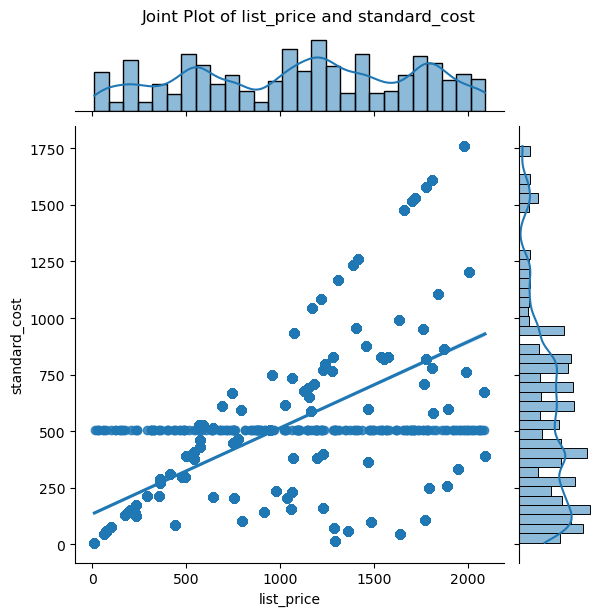

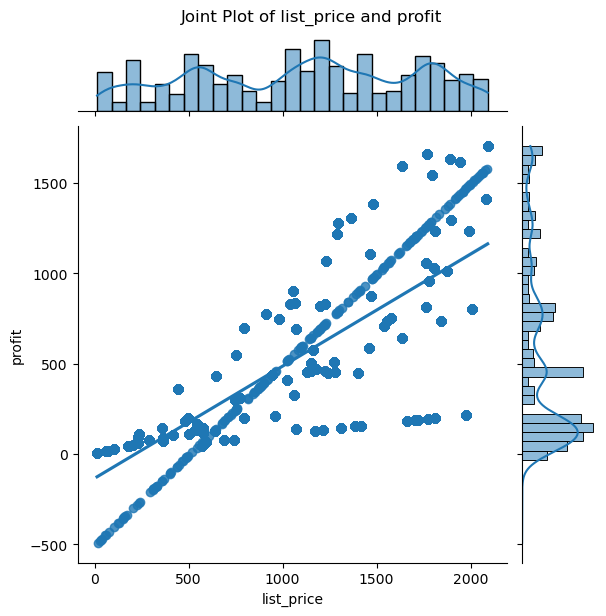

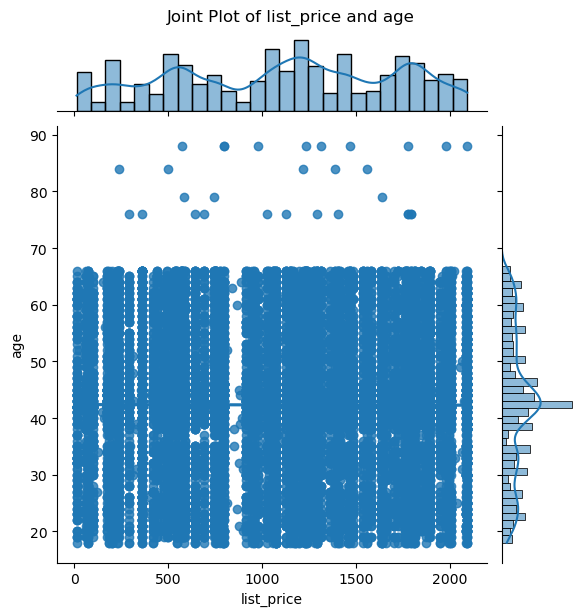

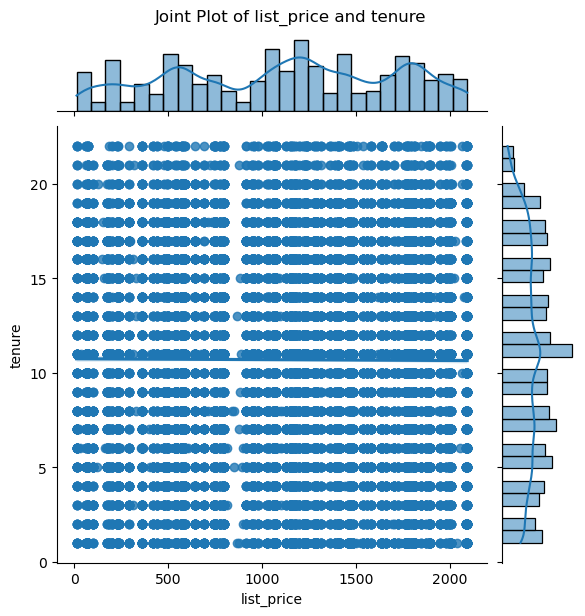

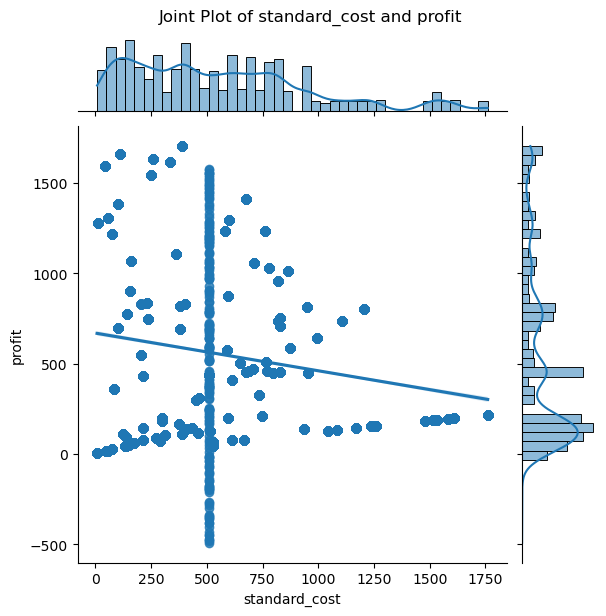

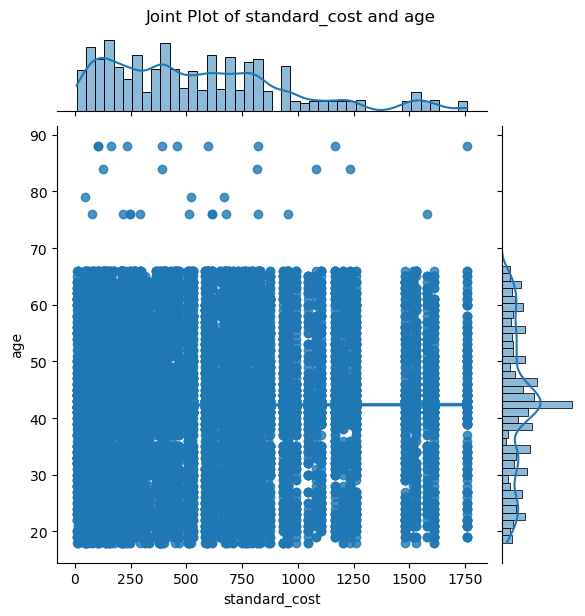

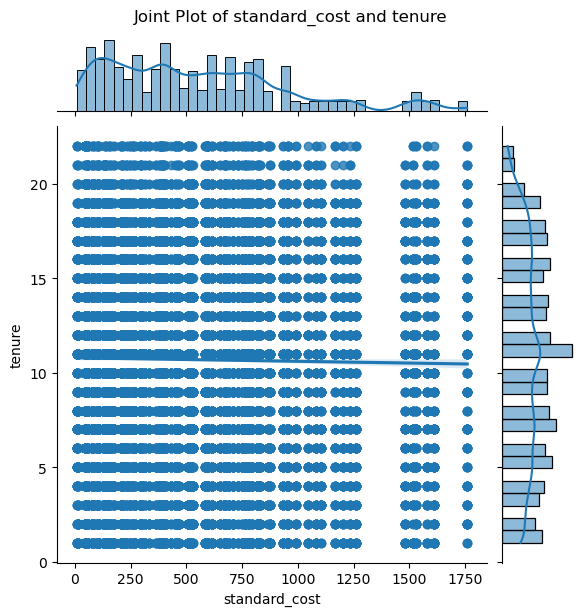

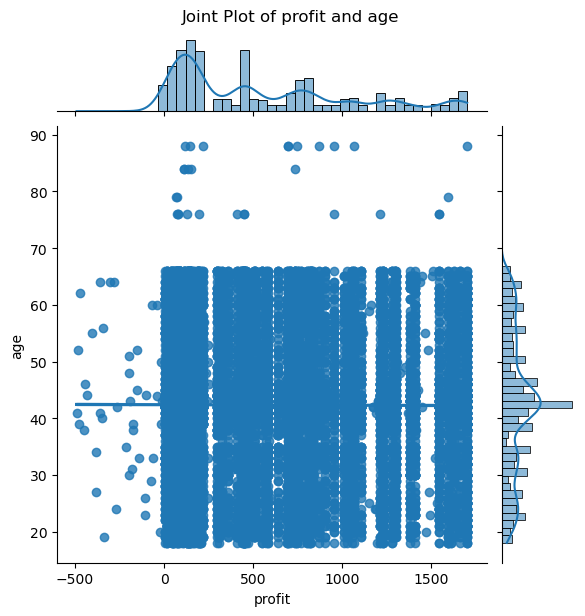

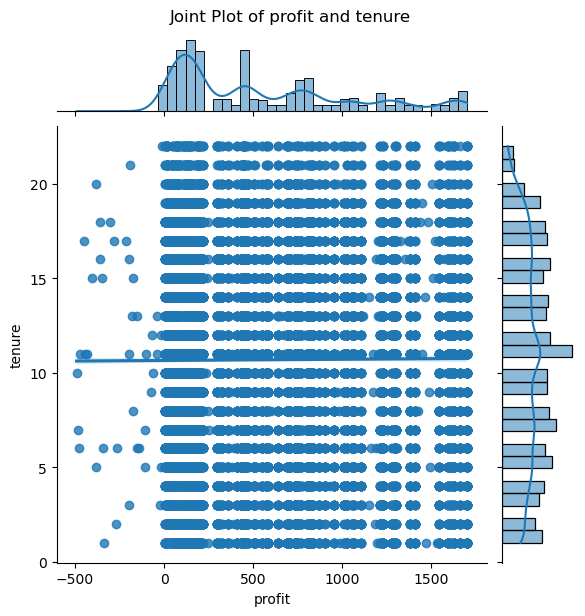

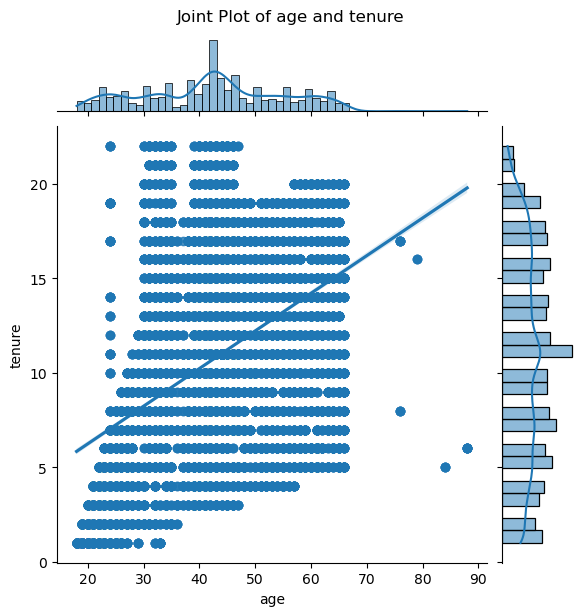

In [1067]:
numerical_columns = ['list_price', 'standard_cost','profit','age','tenure']

for i, col1 in enumerate(numerical_columns):
    for col2 in numerical_columns[i+1:]:
        sns.jointplot(x=col1, y=col2, data=df, kind="reg", color=None, ratio=5, dropna=True)
        plt.suptitle(f'Joint Plot of {col1} and {col2}', y=1.02)
        plt.show()

###Here, we can see that we have 1542 null values. Which we treated with mean as well as most frequent values as per datatype. Now, as we have completed our data cleaning and understanding, now we will commence the Cohort Analysis.

Higher dimension graph

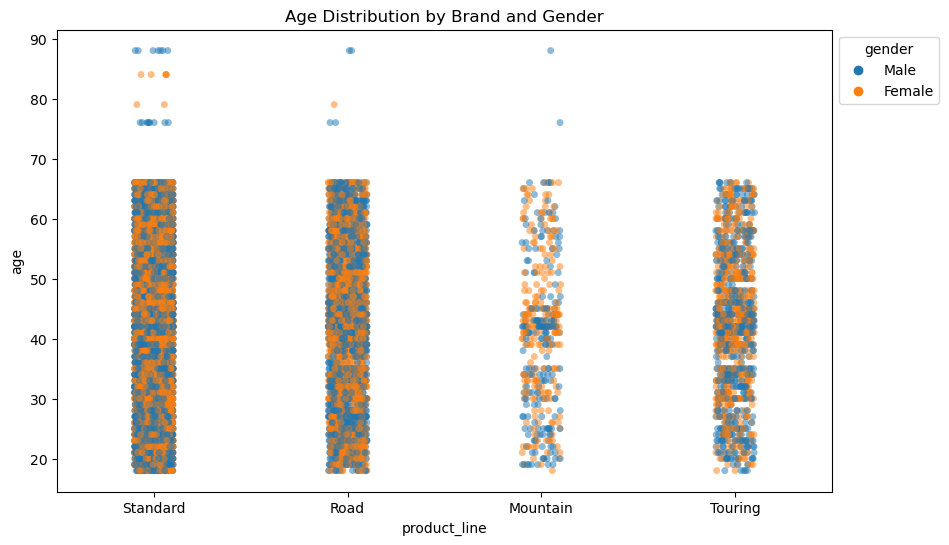

In [1068]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="product_line", y="age", hue="gender", data=df, alpha=0.5)
plt.legend(title='gender', loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Age Distribution by Brand and Gender")
plt.show()

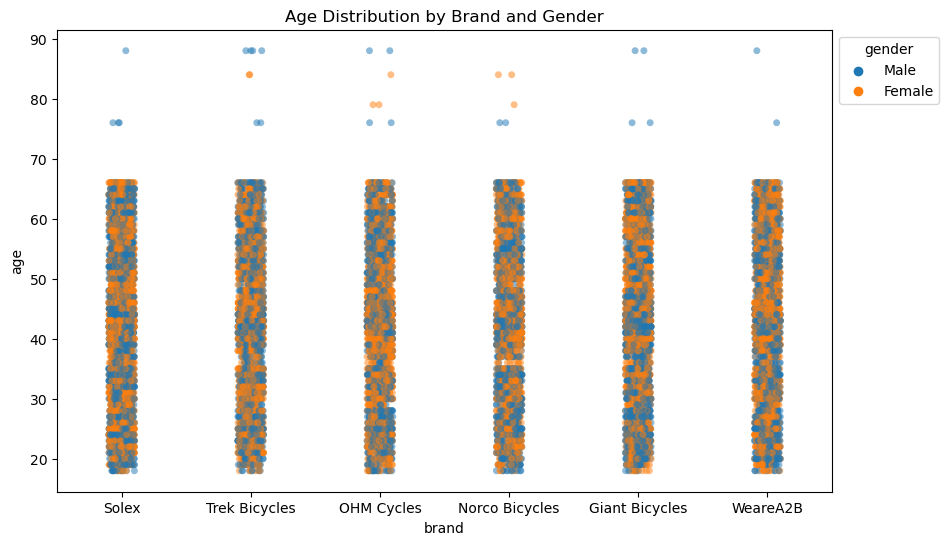

In [1069]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="brand", y="age", hue="gender", data=df, alpha=0.5)
plt.legend(title='gender', loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Age Distribution by Brand and Gender")
plt.show()

Text(0.5, 1.0, 'Profit Distribution by Brand and Gender')

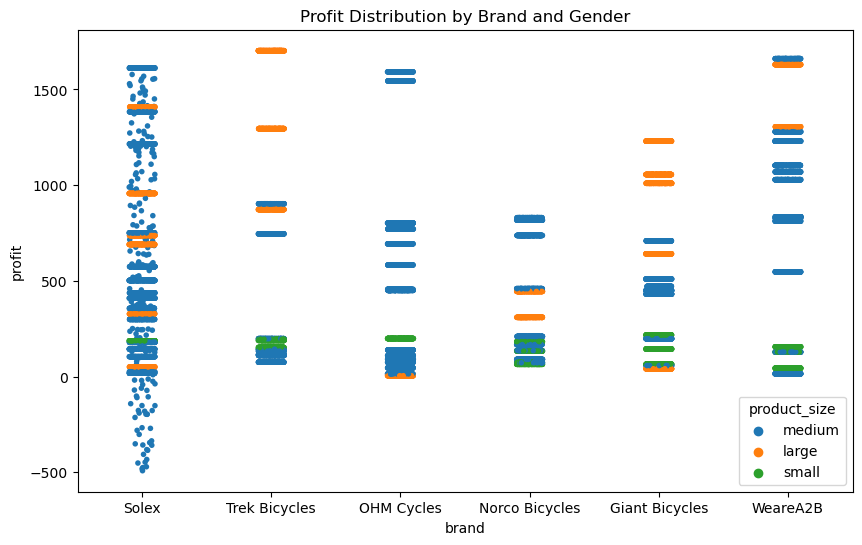

In [1070]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='brand', y='profit', hue = 'product_size', data=df,
                  color=None, size=4, edgecolor="gray", linewidth=0)

plt.title("Profit Distribution by Brand and Gender")

Text(0.5, 1.0, 'Age Distribution by Wealth Segment and Gender')

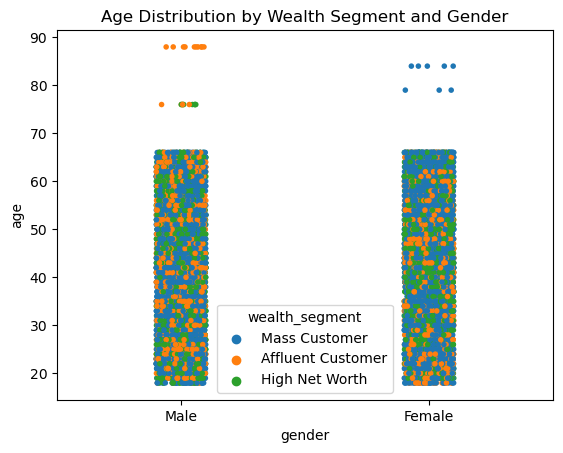

In [1071]:
sns.stripplot(x='gender', y='age', hue = 'wealth_segment',data=df, jitter=True,
                  color=None, size=4, edgecolor="gray", linewidth=0)
plt.title("Age Distribution by Wealth Segment and Gender")

# Assigned the cohorts and calculated the monthly offset

In [1072]:
dt.datetime(df['transaction_date'][1].year, df['transaction_date'][1].month, 1)

datetime.datetime(2017, 5, 1, 0, 0)

In [1073]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
df['TransactionMonth'] = df['transaction_date'].apply(get_month)
df

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/3382328228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionMonth'] = df['transaction_date'].apply(get_month)


transaction_id product_id customer_id transaction_date  online_order  \
0                  1          2        2950       2017-02-25         False   
1                  2          3        3120       2017-05-21          True   
2                  3         37         402       2017-10-16         False   
3                  4         88        3135       2017-08-31         False   
4                  5         78         787       2017-10-01          True   
...              ...        ...         ...              ...           ...   
19995          19996         51        1018       2017-06-24          True   
19996          19997         41         127       2017-11-09          True   
19997          19998         87        2284       2017-04-14          True   
19998          19999          6        2764       2017-07-03         False   
19999          20000         11        1144       2017-09-22          True   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19995     Approved      OHM Cycles     Standard          high       medium   
19996     Approved           Solex         Road        medium       medium   
19997     Approved      OHM Cycles     Standard        medium       medium   
19998     Approved      OHM Cycles     Standard          high       medium   
19999     Approved   Trek Bicycles     Standard        medium        small   

       ...  deceased_indicator  owns_car  tenure               address  \
0      ...                   N       Yes    10.0     984 Hoepker Court   
1      ...                   N       Yes    10.0       4 Shopko Circle   
2      ...                   N        No    22.0    586 Miller Parkway   
3      ...                   N        No    16.0   1617 Harper Parkway   
4      ...                   N       Yes     2.0    0601 Stephen Place   
...    ...                 ...       ...     ...                   ...   
19995  ...                   N       Yes     7.0         3 Hayes Court   
19996  ...                   N        No    19.0    0 Pearson Crossing   
19997  ...                   N        No    14.0  10055 Old Shore Lane   
19998  ...                   N       Yes    20.0       1 Wayridge Park   
19999  ...                   N       Yes     5.0      4439 7th Terrace   

      postcode  state    country  property_valuation   profit TransactionMonth  
0         3064    VIC  Australia                   6    17.87       2017-02-01  
1         2196    NSW  Australia                   5  1702.55       2017-05-01  
2         2835    NSW  Australia                   1  1544.61       2017-10-01  
3         2096    NSW  Australia                  10   817.36       2017-08-01  
4         2292    NSW  Australia                   7  1055.82       2017-10-01  
...        ...    ...        ...                 ...      ...              ...  
19995     3109    VIC  Australia                  10   802.26       2017-06-01  
19996     4405    QLD  Australia                   1   104.24       2017-11-01  
19997     3630    VIC  Australia                   1  1592.19       2017-04-01  
19998     4301    QLD  Australia                   1    91.15       2017-07-01  
19999     2177    NSW  Australia                   9   195.34       2017-09-01  

[19997 rows x 31 columns]

In [1074]:
df.groupby('customer_id')['TransactionMonth'].min()

customer_id
1      2017-01-01
2      2017-05-01
3      2017-02-01
4      2017-04-01
5      2017-03-01
          ...    
3496   2017-03-01
3497   2017-09-01
3498   2017-02-01
3499   2017-01-01
3500   2017-01-01
Name: TransactionMonth, Length: 3493, dtype: datetime64[ns]

In [1075]:
df.groupby('customer_id')['TransactionMonth'].transform('min')

0       2017-02-01
1       2017-01-01
2       2017-01-01
3       2017-02-01
4       2017-01-01
           ...    
19995   2017-01-01
19996   2017-01-01
19997   2017-04-01
19998   2017-02-01
19999   2017-03-01
Name: TransactionMonth, Length: 19997, dtype: datetime64[ns]

In [1076]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth value to the dataset
df['CohortMonth'] = df.groupby('customer_id')['TransactionMonth'].transform('min')
# printing top 5 rows
print(df.head())

  transaction_id product_id customer_id transaction_date  online_order  \
0              1          2        2950       2017-02-25         False   
1              2          3        3120       2017-05-21          True   
2              3         37         402       2017-10-16         False   
3              4         88        3135       2017-08-31         False   
4              5         78         787       2017-10-01          True   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved   Trek Bicycles     Standard        medium        large  ...   
2     Approved      OHM Cycles     Standard           low       medium  ...   
3     Approved  Norco Bicycles     Standard        medium       medium  ...   
4     Approved  Giant Bicycles     Standard        medium        large  ...   

   owns_car  tenure              address postcode state    country  \
0       Ye

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/1800854445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMonth'] = df.groupby('customer_id')['TransactionMonth'].transform('min')


## Calculating time offset in Month as Cohort Index

Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [1077]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [1078]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1
transaction_df.head(5)

0 transaction_id product_id customer_id transaction_date  online_order  \
1              1          2        2950       2017-02-25         False   
2              2          3        3120       2017-05-21          True   
3              3         37         402       2017-10-16         False   
4              4         88        3135       2017-08-31         False   
5              5         78         787       2017-10-01          True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0  list_price  standard_cost  product_first_sold_date  CohortIndex  
1       71.49          53.62                    41245          5.0  
2     2091.47         388.92                    41701         10.0  
3     1793.43         248.82                    36361          7.0  
4     1198.46         381.10                    36145         10.0  
5     1765.30         709.48                    42226          2.0

In [1079]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
df['CohortIndex'] = years_diff * 12 + months_diff  + 1
df.head(5)

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/3997840597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = years_diff * 12 + months_diff  + 1


transaction_id product_id customer_id transaction_date  online_order  \
0              1          2        2950       2017-02-25         False   
1              2          3        3120       2017-05-21          True   
2              3         37         402       2017-10-16         False   
3              4         88        3135       2017-08-31         False   
4              5         78         787       2017-10-01          True   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved   Trek Bicycles     Standard        medium        large  ...   
2     Approved      OHM Cycles     Standard           low       medium  ...   
3     Approved  Norco Bicycles     Standard        medium       medium  ...   
4     Approved  Giant Bicycles     Standard        medium        large  ...   

   tenure              address  postcode state    country  property_valuation  \
0    10.0    984 Hoepker Court      3064   VIC  Australia                   6   
1    10.0      4 Shopko Circle      2196   NSW  Australia                   5   
2    22.0   586 Miller Parkway      2835   NSW  Australia                   1   
3    16.0  1617 Harper Parkway      2096   NSW  Australia                  10   
4     2.0   0601 Stephen Place      2292   NSW  Australia                   7   

    profit  TransactionMonth CohortMonth CohortIndex  
0    17.87        2017-02-01  2017-02-01           1  
1  1702.55        2017-05-01  2017-01-01           5  
2  1544.61        2017-10-01  2017-01-01          10  
3   817.36        2017-08-01  2017-02-01           7  
4  1055.82        2017-10-01  2017-01-01          10  

[5 rows x 33 columns]


Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.

In [1081]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head()

CohortMonth  CohortIndex  customer_id
0  2017-01-01            1         1353
1  2017-01-01            2          486
2  2017-01-01            3          508
3  2017-01-01            4          509
4  2017-01-01            5          502

# Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

In [1082]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2017-01-01   1353.0  486.0  508.0  509.0  502.0  483.0  518.0  529.0  500.0   
2017-02-01    800.0  325.0  298.0  313.0  288.0  298.0  308.0  281.0  329.0   
2017-03-01    484.0  167.0  174.0  167.0  182.0  184.0  172.0  212.0  189.0   
2017-04-01    336.0  111.0  121.0  153.0  143.0  121.0  142.0  126.0  132.0   
2017-05-01    210.0   85.0   81.0   87.0   71.0   74.0   73.0   81.0    NaN   
2017-06-01    122.0   45.0   44.0   47.0   46.0   46.0   53.0    NaN    NaN   
2017-07-01     77.0   26.0   29.0   32.0   37.0   24.0    NaN    NaN    NaN   
2017-08-01     51.0   19.0   21.0   17.0   13.0    NaN    NaN    NaN    NaN   
2017-09-01     23.0    7.0    7.0    9.0    NaN    NaN    NaN    NaN    NaN   
2017-10-01     20.0    6.0    8.0    NaN    NaN    NaN    NaN    NaN    NaN   
2017-11-01     13.0    5.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-12-01      4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12  
CohortMonth                       
2017-01-01   530.0  497.0  516.0  
2017-02-01   308.0  296.0    NaN  
2017-03-01   181.0    NaN    NaN  
2017-04-01     NaN    NaN    NaN  
2017-05-01     NaN    NaN    NaN  
2017-06-01     NaN    NaN    NaN  
2017-07-01     NaN    NaN    NaN  
2017-08-01     NaN    NaN    NaN  
2017-09-01     NaN    NaN    NaN  
2017-10-01     NaN    NaN    NaN  
2017-11-01     NaN    NaN    NaN  
2017-12-01     NaN    NaN    NaN

In [1083]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex     1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                
2017-01-01   100.0  35.9  37.5  37.6  37.1  35.7  38.3  39.1  37.0  39.2   
2017-02-01   100.0  40.6  37.2  39.1  36.0  37.2  38.5  35.1  41.1  38.5   
2017-03-01   100.0  34.5  36.0  34.5  37.6  38.0  35.5  43.8  39.0  37.4   
2017-04-01   100.0  33.0  36.0  45.5  42.6  36.0  42.3  37.5  39.3   NaN   
2017-05-01   100.0  40.5  38.6  41.4  33.8  35.2  34.8  38.6   NaN   NaN   
2017-06-01   100.0  36.9  36.1  38.5  37.7  37.7  43.4   NaN   NaN   NaN   
2017-07-01   100.0  33.8  37.7  41.6  48.1  31.2   NaN   NaN   NaN   NaN   
2017-08-01   100.0  37.3  41.2  33.3  25.5   NaN   NaN   NaN   NaN   NaN   
2017-09-01   100.0  30.4  30.4  39.1   NaN   NaN   NaN   NaN   NaN   NaN   
2017-10-01   100.0  30.0  40.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-11-01   100.0  38.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    11    12  
CohortMonth              
2017-01-01   36.7  38.1  
2017-02-01   37.0   NaN  
2017-03-01    NaN   NaN  
2017-04-01    NaN   NaN  
2017-05-01    NaN   NaN  
2017-06-01    NaN   NaN  
2017-07-01    NaN   NaN  
2017-08-01    NaN   NaN  
2017-09-01    NaN   NaN  
2017-10-01    NaN   NaN  
2017-11-01    NaN   NaN  
2017-12-01    NaN   NaN

The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

#Visualizing the retention rate
# Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

In [1084]:
retention.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='CohortMonth', freq=None)

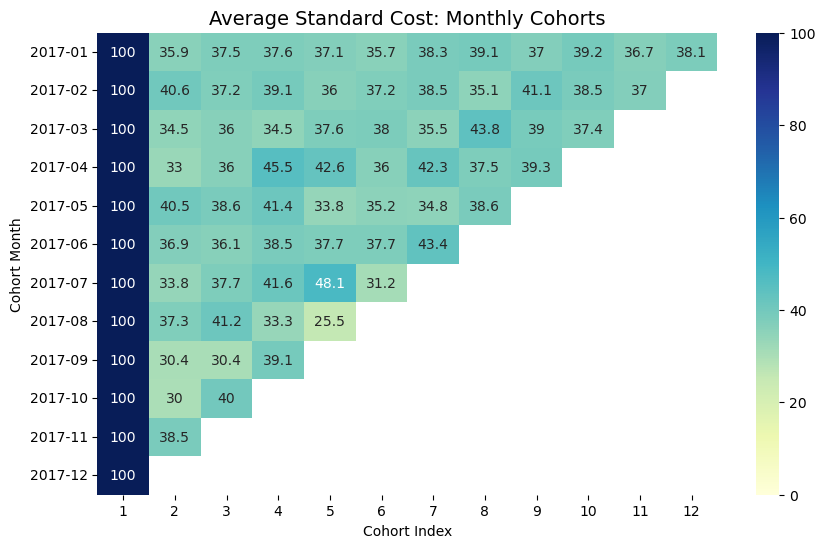

In [1085]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(10, 6))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='horizontal')
plt.show()

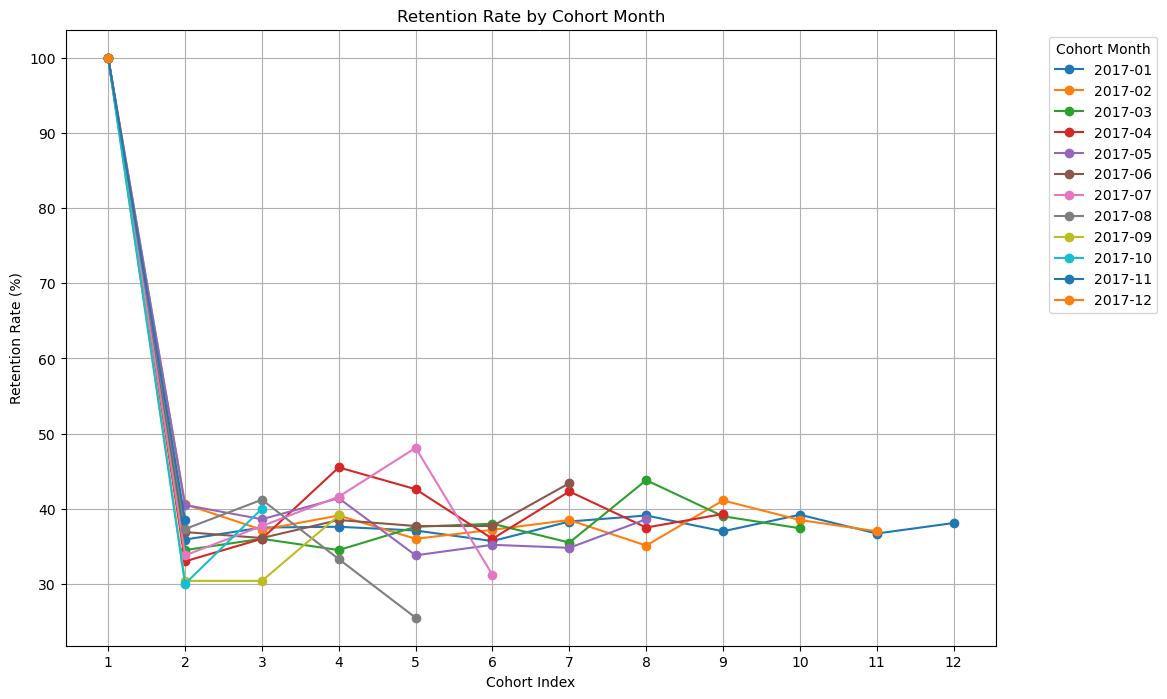

In [1086]:
retention.index = pd.to_datetime(retention.index)
plt.figure(figsize=(12, 8))

for cohort_month in retention.index:
    plt.plot(retention.columns, retention.loc[cohort_month], marker='o', label=cohort_month.strftime('%Y-%m'))

plt.title('Retention Rate by Cohort Month')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.xticks(range(1, 13))  # Assuming 12 CohortIndex values
plt.legend(title='Cohort Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [1087]:
from datetime import datetime, timedelta
last_purchase = df.groupby('customer_id')['transaction_date'].max().reset_index()
last_purchase.columns = ['customer_id', 'last_purchase_date']

fixed_current_date = datetime(2017, 12, 31)
churn_threshold = fixed_current_date - timedelta(days=90)

last_purchase['churn_status'] = last_purchase['last_purchase_date'] < churn_threshold

df = pd.merge(df, last_purchase, on='customer_id', how='left')

first_purchase = df.groupby('customer_id')['transaction_date'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_date']

customer_lifecycle = pd.merge(first_purchase, last_purchase, on='customer_id')
customer_lifecycle['customer_lifetime'] = customer_lifecycle['last_purchase_date'] - customer_lifecycle['first_purchase_date']

customer_lifecycle

customer_id first_purchase_date last_purchase_date  churn_status  \
0               1          2017-01-05         2017-12-23         False   
1               2          2017-05-04         2017-08-24          True   
2               3          2017-02-23         2017-09-19          True   
3               4          2017-04-03         2017-06-18          True   
4               5          2017-03-03         2017-12-14         False   
...           ...                 ...                ...           ...   
3488         3496          2017-03-07         2017-04-18          True   
3489         3497          2017-09-01         2017-11-08         False   
3490         3498          2017-02-03         2017-08-25          True   
3491         3499          2017-01-12         2017-11-09         False   
3492         3500          2017-01-09         2017-08-08          True   

     customer_lifetime  
0             352 days  
1             112 days  
2             208 days  
3              76 days  
4             286 days  
...                ...  
3488           42 days  
3489           68 days  
3490          203 days  
3491          301 days  
3492          211 days  

[3493 rows x 5 columns]

In [1088]:
customer_lifecycle.describe()

customer_id            customer_lifetime
count  3493.000000                         3493
mean   1749.916118  240 days 16:35:35.470941884
std    1010.520804   81 days 15:00:47.021234823
min       1.000000              0 days 00:00:00
25%     876.000000            196 days 00:00:00
50%    1750.000000            258 days 00:00:00
75%    2624.000000            303 days 00:00:00
max    3500.000000            362 days 00:00:00

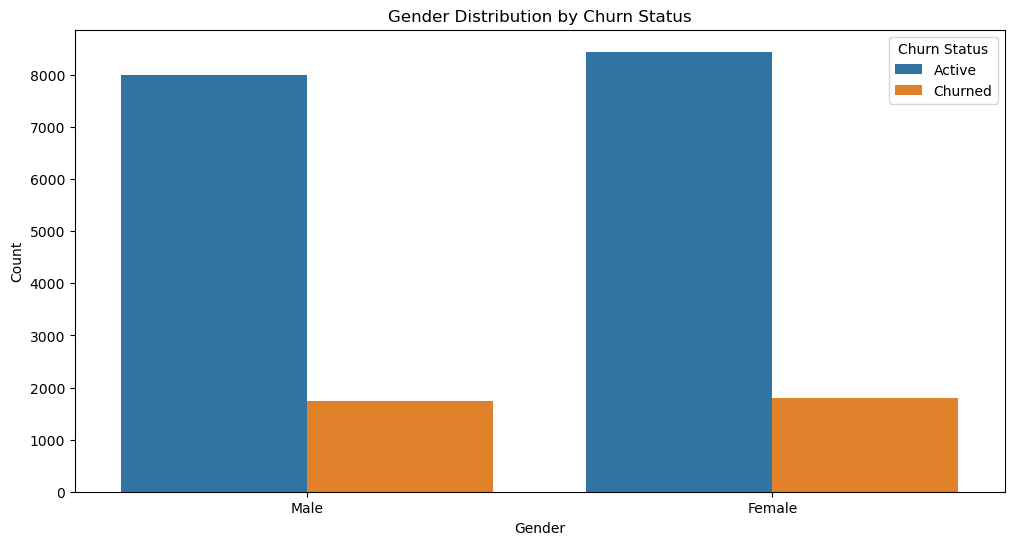

In [1089]:
# Gender comparison
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', hue='churn_status')
plt.title('Gender Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Active', 'Churned'])
plt.show()

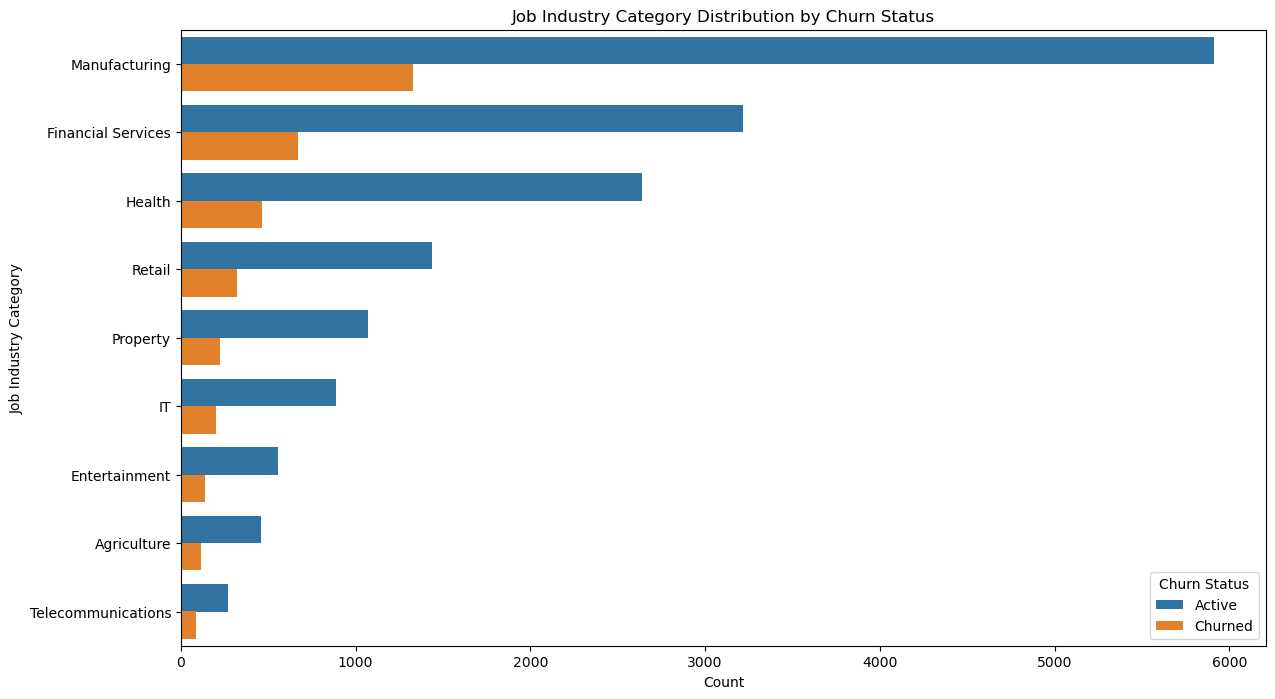

In [1090]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='job_industry_category', hue='churn_status', order=df['job_industry_category'].value_counts().index)
plt.title('Job Industry Category Distribution by Churn Status')
plt.xlabel('Count')
plt.ylabel('Job Industry Category')
plt.legend(title='Churn Status', labels=['Active', 'Churned'])
plt.show()

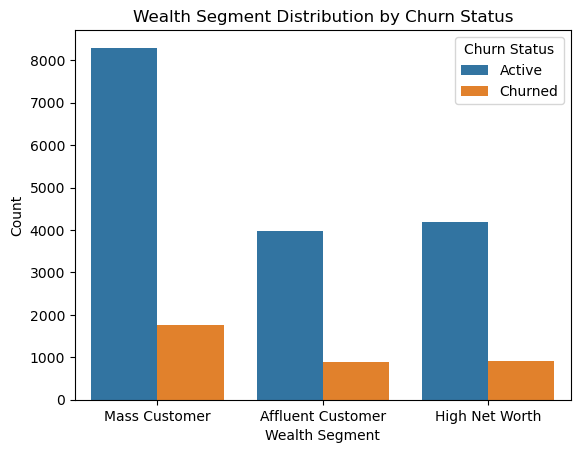

In [1091]:
sns.countplot(data=df, x='wealth_segment', hue='churn_status')
plt.title('Wealth Segment Distribution by Churn Status')
plt.xlabel('Wealth Segment')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Active', 'Churned'])
plt.show()

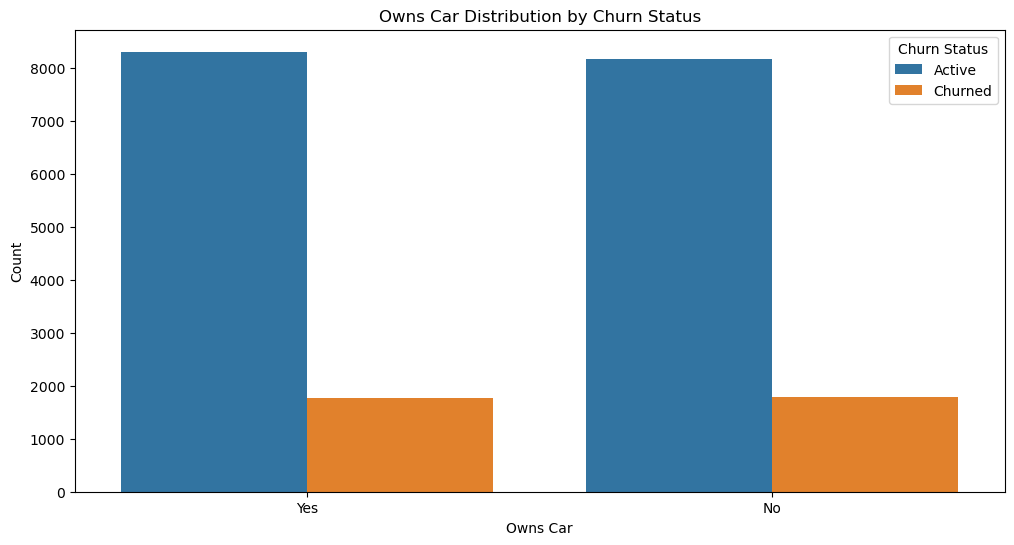

In [1092]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='owns_car', hue='churn_status')
plt.title('Owns Car Distribution by Churn Status')
plt.xlabel('Owns Car')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Active', 'Churned'])
plt.show()

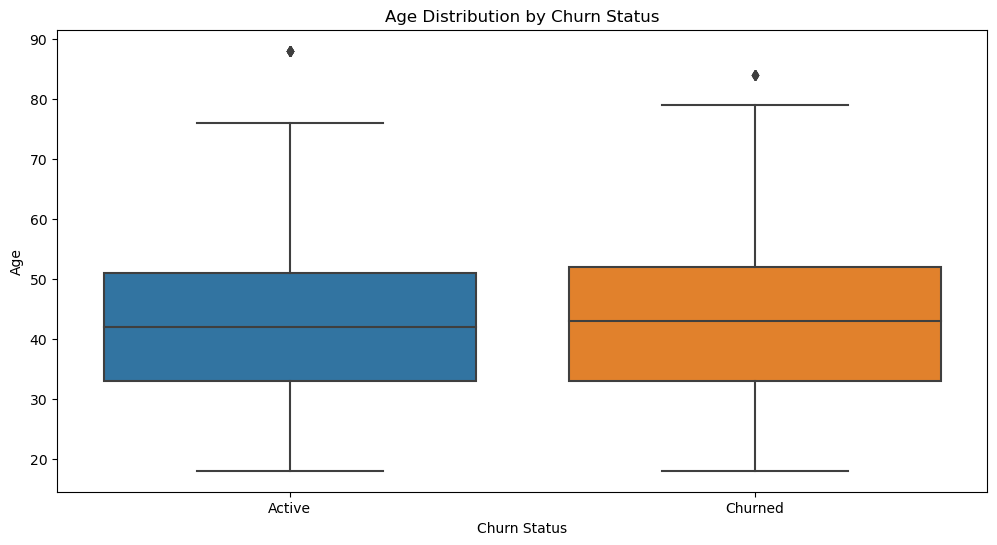

In [1093]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='churn_status', y='age')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.show()

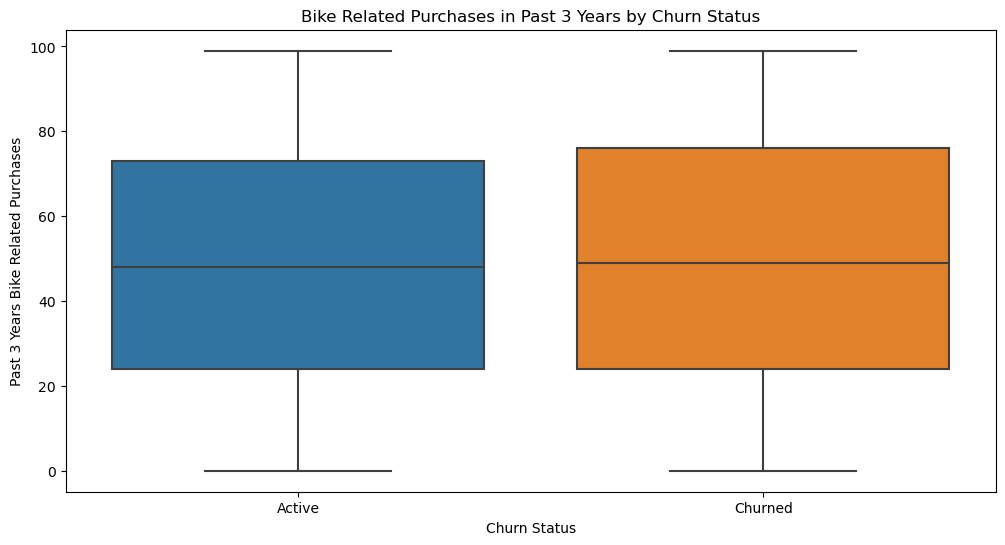

In [1094]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='churn_status', y='past_3_years_bike_related_purchases')
plt.title('Bike Related Purchases in Past 3 Years by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Past 3 Years Bike Related Purchases')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.show()

<Figure size 1400x800 with 0 Axes>

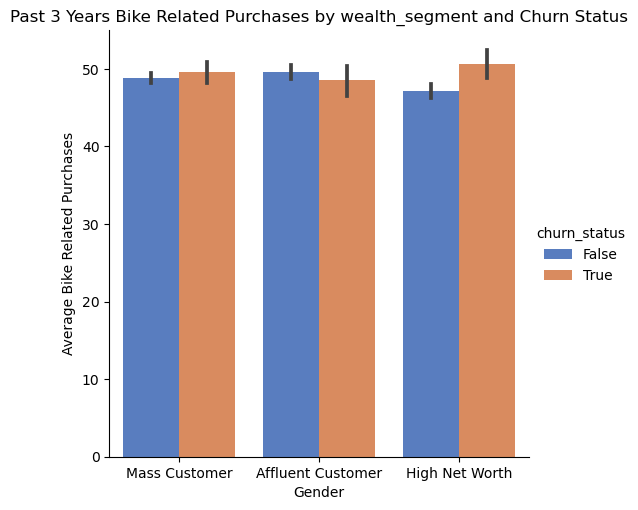

In [1095]:
# Assuming 'df' is your DataFrame and it already contains the necessary columns
plt.figure(figsize=(14, 8))
sns.catplot(
    data=df,
    x='wealth_segment',
    y='past_3_years_bike_related_purchases',
    hue='churn_status',
    kind='bar',
    palette='muted'
)
plt.title('Past 3 Years Bike Related Purchases by wealth_segment and Churn Status')
plt.xlabel('Gender')
plt.ylabel('Average Bike Related Purchases')
plt.show()

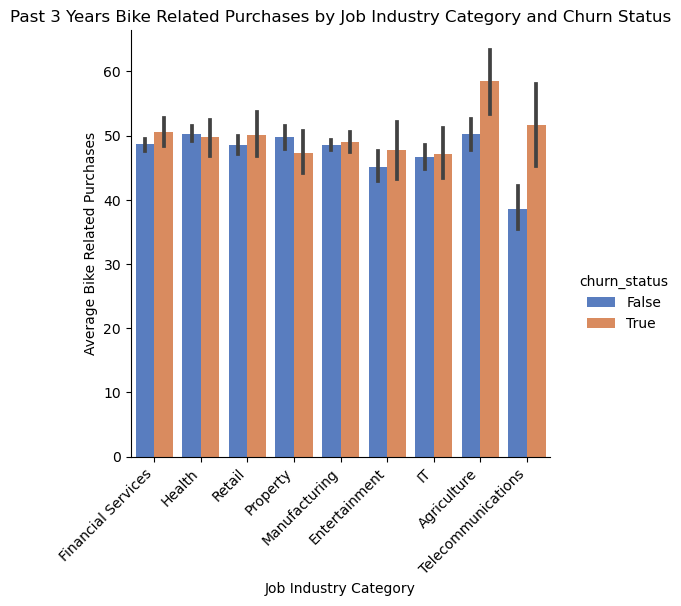

In [1096]:
catplot = sns.catplot(
    data=df,
    x='job_industry_category',
    y='past_3_years_bike_related_purchases',
    hue='churn_status',
    kind='bar',
    palette='muted',
)

plt.title('Past 3 Years Bike Related Purchases by Job Industry Category and Churn Status')
plt.xlabel('Job Industry Category')
plt.ylabel('Average Bike Related Purchases')
catplot.set_xticklabels(rotation=45, ha='right')
plt.show()

The plot suggests that for most job industry categories, there isn't a substantial difference in the average bike-related purchases between active and churned customers.
The notable exceptions are in Agriculture and Telecommunications, where churned customers have significantly higher average purchases.

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/3284231244.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


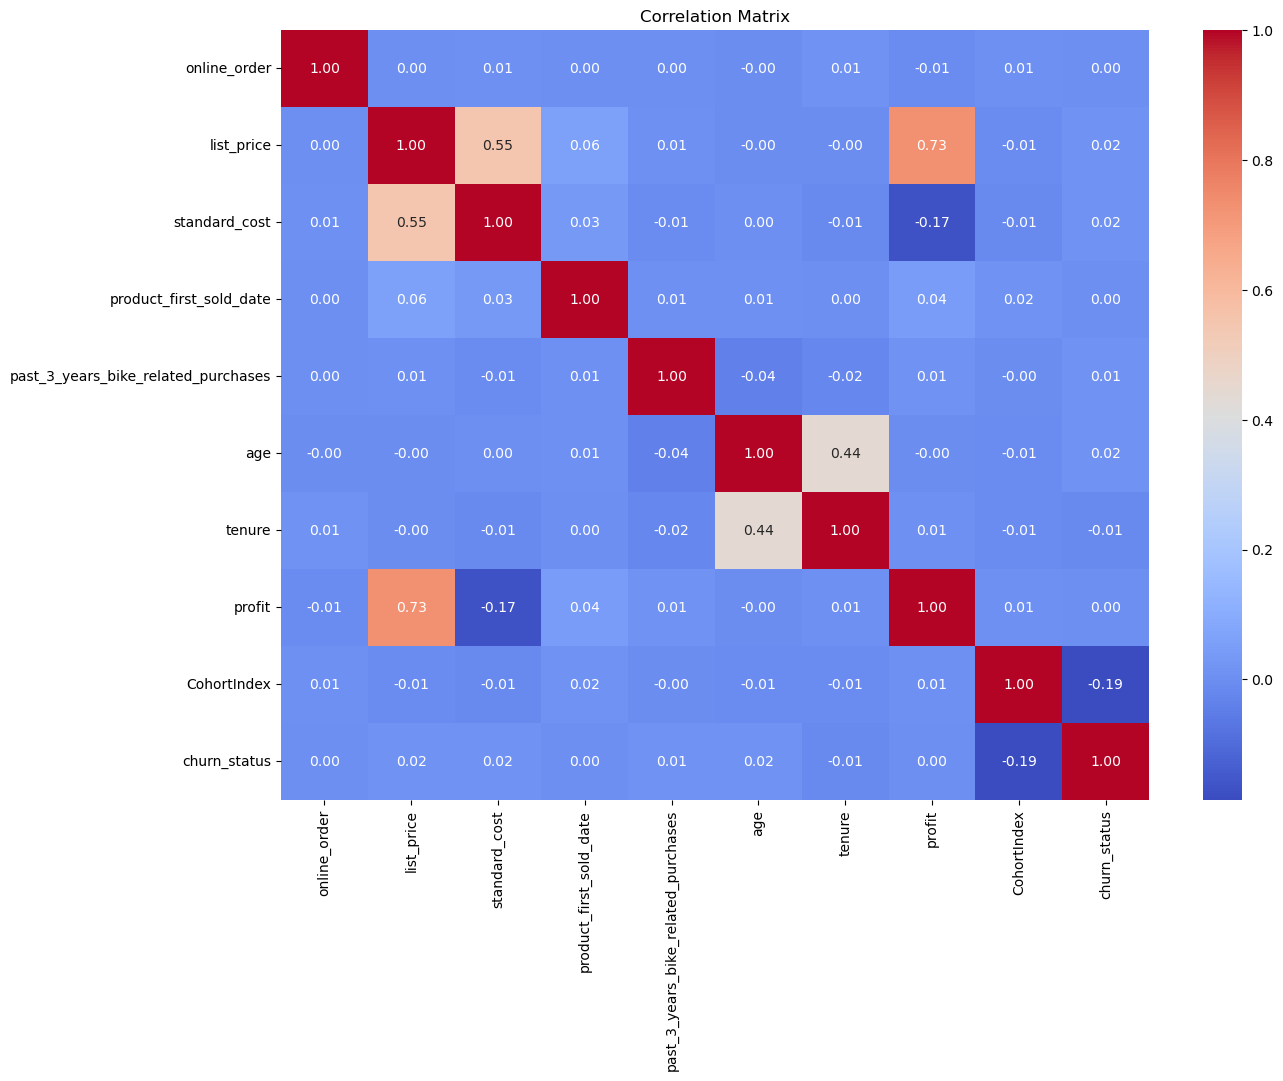

In [1097]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Age and Bike Purchases:
Neither age nor the number of bike-related purchases in the past 3 years are significant factors in determining churn. Both variables show similar distributions and weak correlations with churn status.
CohortIndex:
While the CohortIndex has a slightly stronger negative correlation with churn, indicating that longer-tenured customers are less likely to churn, the relationship is still relatively weak.

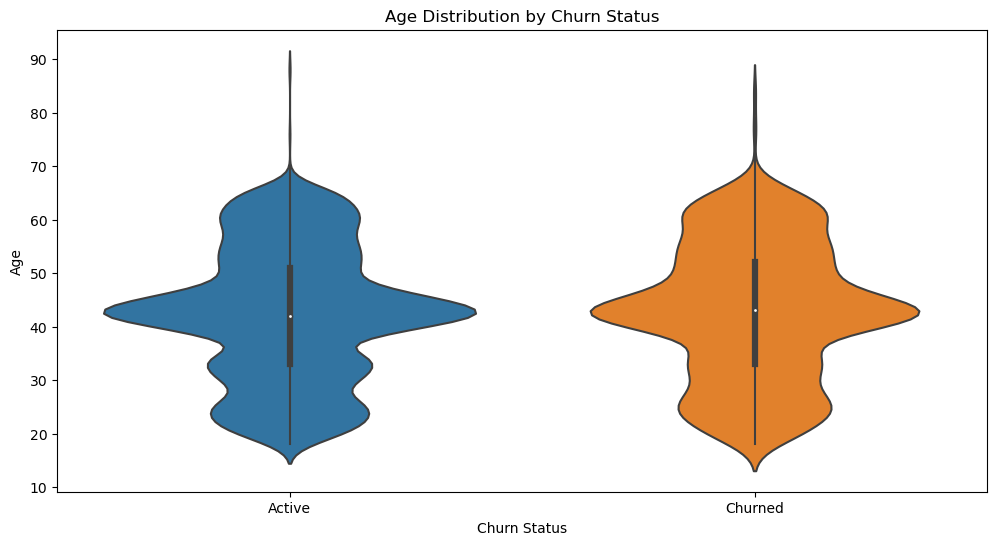

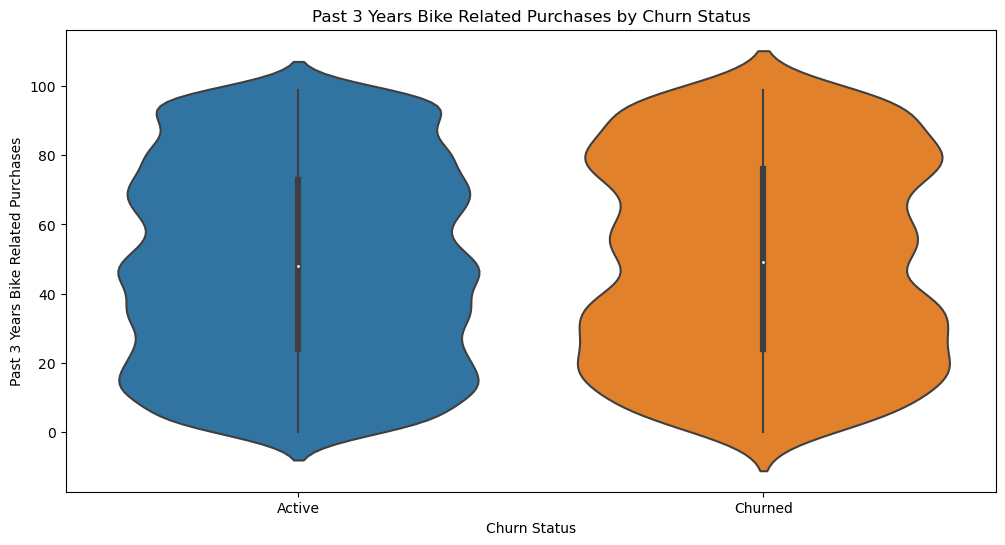

In [1098]:
# Violin plot for age
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='churn_status', y='age')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.show()

# Violin plot for past_3_years_bike_related_purchases
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='churn_status', y='past_3_years_bike_related_purchases')
plt.title('Past 3 Years Bike Related Purchases by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Past 3 Years Bike Related Purchases')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.show()


The age distribution alone does not provide a clear differentiation between churned and active customers, as both groups have similar age profiles. Therefore, age is not a significant factor in determining churn in this dataset.
The number of bike-related purchases in the past 3 years is also similar between churned and active customers. This suggests that high engagement in terms of bike-related purchases does not necessarily correlate with retention, indicating that other factors might be influencing churn.

In [1099]:
df[df.customer_id==1068].past_3_years_bike_related_purchases

759      5.0
4037     5.0
4316     5.0
4436     5.0
4596     5.0
7624     5.0
11470    5.0
12972    5.0
13895    5.0
15127    5.0
16551    5.0
17176    5.0
17278    5.0
17345    5.0
Name: past_3_years_bike_related_purchases, dtype: float64

In [1100]:
grouped_df = df.groupby('customer_id').agg({
    'list_price': 'sum',
    'gender': 'first',
    'age': 'first',
    'job_title': 'first',
    'job_industry_category': 'first',
    'wealth_segment': 'first',
    'owns_car': 'first',
    'churn_status': 'first',
    'CohortMonth' : 'first',
    'past_3_years_bike_related_purchases': 'first',
    'tenure': 'first'


}).reset_index()

# Rename columns for clarity
grouped_df.rename(columns={'list_price': 'total_spent'}, inplace=True)

grouped_df

customer_id  total_spent  gender   age  \
0               1      9084.45  Female  66.0   
1               2      4149.07    Male  39.0   
2               3      9888.23    Male  66.0   
3               4      1047.72    Male  58.0   
4               5      5903.20  Female  43.0   
...           ...          ...     ...   ...   
3488         3496      4725.38    Male  34.0   
3489         3497      3744.07  Female  34.0   
3490         3498      5177.06  Female  24.0   
3491         3499      7673.48    Male  40.0   
3492         3500      4922.41  Female  52.0   

                                 job_title job_industry_category  \
0                      Executive Secretary                Health   
1                   Administrative Officer    Financial Services   
2                       Recruiting Manager              Property   
3     Business Systems Development Analyst                    IT   
4                            Senior Editor         Manufacturing   
...                                    ...                   ...   
3488                                Editor         Manufacturing   
3489           Administrative Assistant IV         Manufacturing   
3490  Business Systems Development Analyst         Manufacturing   
3491  Business Systems Development Analyst         Manufacturing   
3492  Business Systems Development Analyst         Entertainment   

         wealth_segment owns_car  churn_status CohortMonth  \
0         Mass Customer      Yes         False  2017-01-01   
1         Mass Customer      Yes          True  2017-05-01   
2         Mass Customer      Yes          True  2017-02-01   
3         Mass Customer       No          True  2017-04-01   
4     Affluent Customer      Yes         False  2017-03-01   
...                 ...      ...           ...         ...   
3488      Mass Customer      Yes          True  2017-03-01   
3489  Affluent Customer      Yes         False  2017-09-01   
3490      Mass Customer       No          True  2017-02-01   
3491      Mass Customer      Yes         False  2017-01-01   
3492  Affluent Customer       No          True  2017-01-01   

      past_3_years_bike_related_purchases  tenure  
0                                    93.0    11.0  
1                                    81.0    16.0  
2                                    61.0    15.0  
3                                    33.0     7.0  
4                                    56.0     8.0  
...                                   ...     ...  
3488                                 99.0    19.0  
3489                                 73.0    18.0  
3490                                 28.0     5.0  
3491                                 29.0     7.0  
3492                                 71.0    17.0  

[3493 rows x 12 columns]

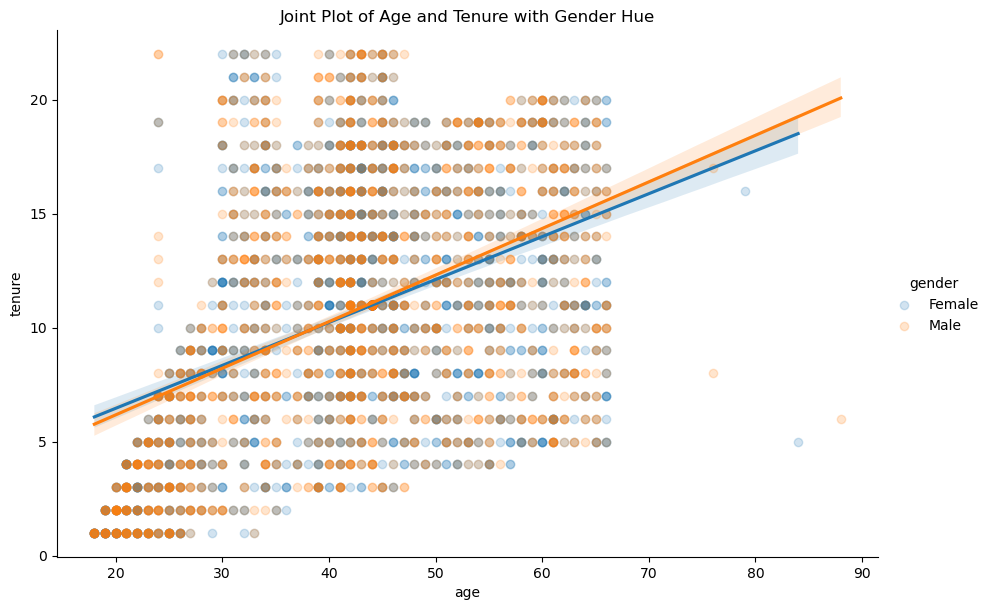

In [1101]:
sns.lmplot(x="age", y="tenure", hue="gender", data=grouped_df, aspect=1.5, height=6, scatter_kws={'alpha':0.2})

plt.title("Joint Plot of Age and Tenure with Gender Hue")
plt.show()

In [1102]:
telecom_data = df[df['job_industry_category'] == 'Telecommunications']
agriculture_data = df[df['job_industry_category'] == 'Agriculture']

telecom_stats = telecom_data.describe()
agriculture_stats = agriculture_data.describe()

print("Telecommunications Descriptive Statistics:")
print(telecom_stats)

print("\nAgriculture Descriptive Statistics:")
print(agriculture_stats)


Telecommunications Descriptive Statistics:
        list_price  standard_cost  product_first_sold_date  \
count   354.000000     354.000000               354.000000   
mean   1059.988701     526.417627             38431.669492   
std     572.750368     389.696458              2922.352422   
min      12.010000       7.210000             33259.000000   
25%     569.560000     205.360000             35707.000000   
50%    1148.640000     464.720000             38339.000000   
75%    1538.990000     778.690000             41064.000000   
max    2091.470000    1759.850000             42710.000000   

       past_3_years_bike_related_purchases         age      tenure  \
count                           354.000000  354.000000  354.000000   
mean                             41.731638   42.364407   12.073446   
std                              29.379393   12.866716    6.198348   
min                               0.000000   18.000000    1.000000   
25%                              15.000000   33.

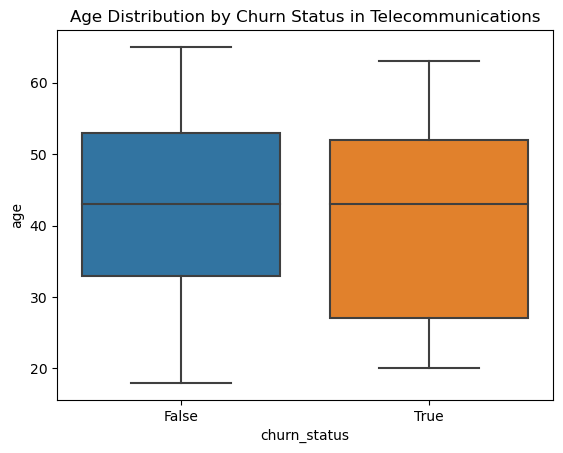

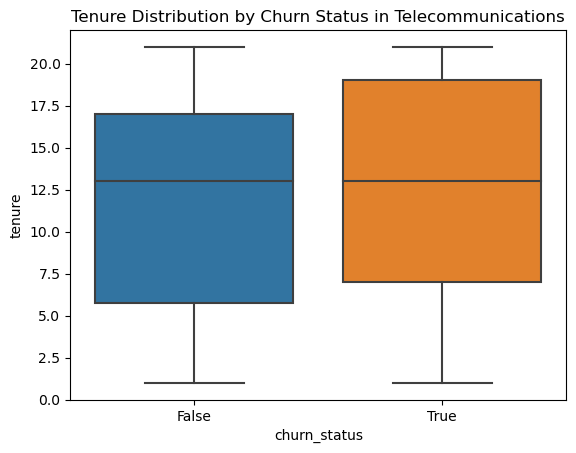

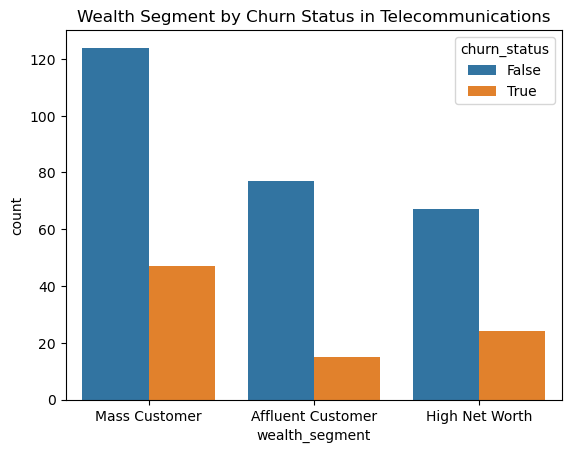

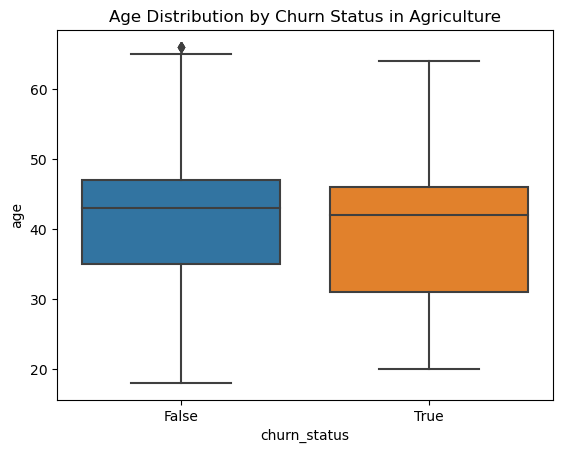

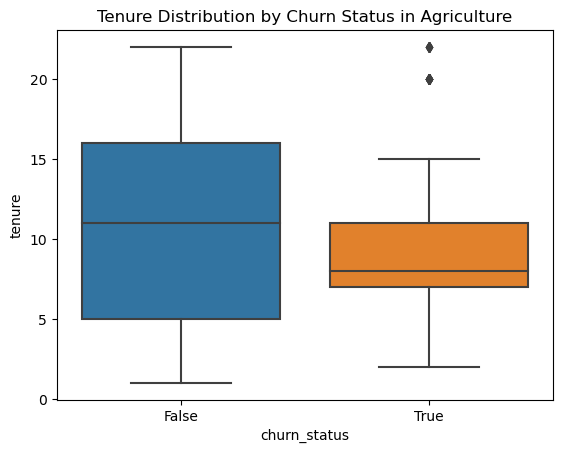

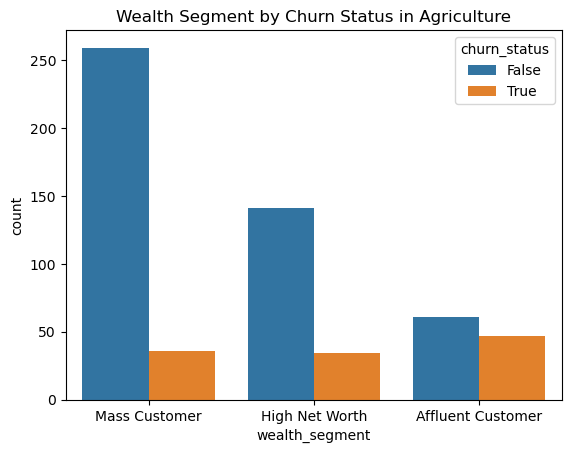

In [1103]:
# Compare additional features for Telecommunications
sns.boxplot(data=telecom_data, x='churn_status', y='age')
plt.title('Age Distribution by Churn Status in Telecommunications')
plt.show()

sns.boxplot(data=telecom_data, x='churn_status', y='tenure')
plt.title('Tenure Distribution by Churn Status in Telecommunications')
plt.show()

sns.countplot(data=telecom_data, x='wealth_segment', hue='churn_status')
plt.title('Wealth Segment by Churn Status in Telecommunications')
plt.show()

# Compare additional features for Agriculture
sns.boxplot(data=agriculture_data, x='churn_status', y='age')
plt.title('Age Distribution by Churn Status in Agriculture')
plt.show()

sns.boxplot(data=agriculture_data, x='churn_status', y='tenure')
plt.title('Tenure Distribution by Churn Status in Agriculture')
plt.show()

sns.countplot(data=agriculture_data, x='wealth_segment', hue='churn_status')
plt.title('Wealth Segment by Churn Status in Agriculture')
plt.show()


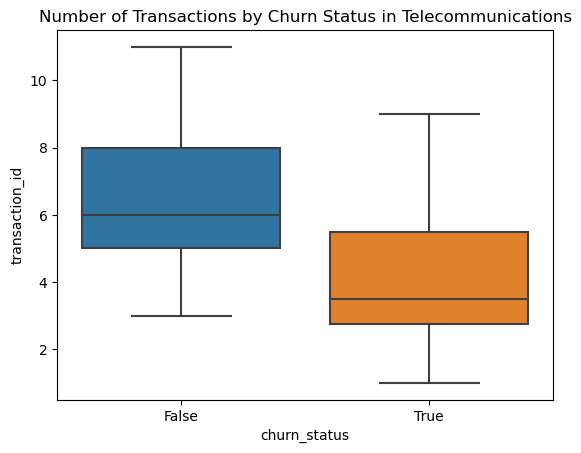

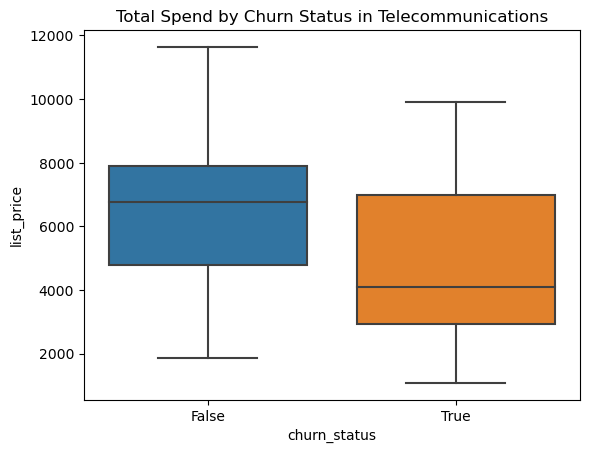

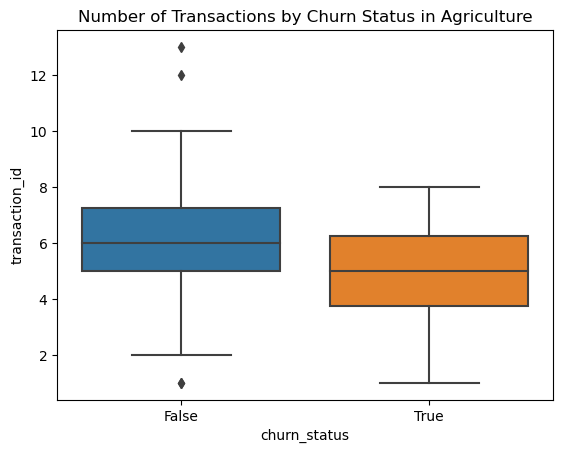

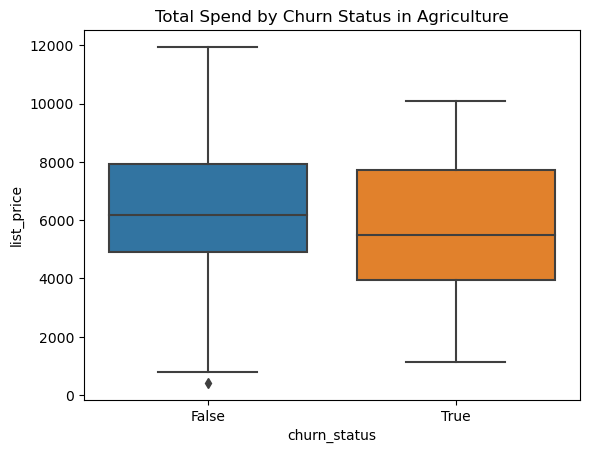

In [1104]:
# Purchase patterns for Telecommunications
telecom_behavior = telecom_data.groupby(['customer_id', 'churn_status']).agg({
    'transaction_id': 'count',
    'list_price': 'sum',
}).reset_index()

sns.boxplot(data=telecom_behavior, x='churn_status', y='transaction_id')
plt.title('Number of Transactions by Churn Status in Telecommunications')
plt.show()

sns.boxplot(data=telecom_behavior, x='churn_status', y='list_price')
plt.title('Total Spend by Churn Status in Telecommunications')
plt.show()


# Purchase patterns for Agriculture
agriculture_behavior = agriculture_data.groupby(['customer_id', 'churn_status']).agg({
    'transaction_id': 'count',
    'list_price': 'sum',
}).reset_index()

sns.boxplot(data=agriculture_behavior, x='churn_status', y='transaction_id')
plt.title('Number of Transactions by Churn Status in Agriculture')
plt.show()

sns.boxplot(data=agriculture_behavior, x='churn_status', y='list_price')
plt.title('Total Spend by Churn Status in Agriculture')
plt.show()


In [1105]:
july_2017_cohort = df[df['CohortMonth'] == '2017-07-01']
july_2017_cohort_5 = july_2017_cohort[july_2017_cohort['CohortIndex'] == 5]
july_2017_cohort_6 = july_2017_cohort[july_2017_cohort['CohortIndex'] == 6]

In [1106]:
combined_cohorts = pd.concat([july_2017_cohort_5, july_2017_cohort_6])
combined_cohorts

transaction_id product_id customer_id transaction_date  online_order  \
1750            1751         22        2730       2017-11-21         False   
2160            2161         98        2694       2017-11-22         False   
2561            2562         35        2514       2017-11-14          True   
3035            3036         27        2730       2017-11-21         False   
3397            3398         51        1809       2017-11-20         False   
...              ...        ...         ...              ...           ...   
16936          16939         40        1167       2017-12-20         False   
17550          17554         68        1050       2017-12-04          True   
18354          18358         33         856       2017-12-14         False   
18602          18606          4        1809       2017-12-03          True   
19600          19604         74         926       2017-12-18         False   

      order_status           brand product_line product_class product_size  \
1750      Approved        WeareA2B     Standard        medium       medium   
2160      Approved   Trek Bicycles     Standard          high       medium   
2561      Approved  Giant Bicycles     Standard        medium       medium   
3035      Approved   Trek Bicycles     Standard        medium       medium   
3397      Approved      OHM Cycles     Standard          high       medium   
...            ...             ...          ...           ...          ...   
16936     Approved      OHM Cycles     Standard          high       medium   
17550     Approved      OHM Cycles     Standard        medium       medium   
18354     Approved  Giant Bicycles     Standard        medium        small   
18602     Approved  Giant Bicycles     Standard          high       medium   
19600     Approved        WeareA2B     Standard        medium       medium   

       ...  postcode  state    country property_valuation   profit  \
1750   ...      4165    QLD  Australia                  7    15.08   
2160   ...      4510    QLD  Australia                  3   143.36   
2561   ...      3111    VIC  Australia                 10   448.68   
3035   ...      4165    QLD  Australia                  7   110.81   
3397   ...      2263    NSW  Australia                  7   802.26   
...    ...       ...    ...        ...                ...      ...   
16936  ...      4209    QLD  Australia                  6   583.27   
17550  ...      2131    NSW  Australia                 11  1592.19   
18354  ...      3139    VIC  Australia                  7   144.26   
18602  ...      2263    NSW  Australia                  7   451.65   
19600  ...      2766    NSW  Australia                  8   827.16   

       TransactionMonth CohortMonth  CohortIndex last_purchase_date  \
1750         2017-11-01  2017-07-01            5         2017-12-26   
2160         2017-11-01  2017-07-01            5         2017-12-01   
2561         2017-11-01  2017-07-01            5         2017-11-14   
3035         2017-11-01  2017-07-01            5         2017-12-26   
3397         2017-11-01  2017-07-01            5         2017-12-03   
...                 ...         ...          ...                ...   
16936        2017-12-01  2017-07-01            6         2017-12-20   
17550        2017-12-01  2017-07-01            6         2017-12-04   
18354        2017-12-01  2017-07-01            6         2017-12-29   
18602        2017-12-01  2017-07-01            6         2017-12-03   
19600        2017-12-01  2017-07-01            6         2017-12-18   

      churn_status  
1750         False  
2160         False  
2561         False  
3035         False  
3397         False  
...            ...  
16936        False  
17550        False  
18354        False  
18602        False  
19600        False  

[76 rows x 35 columns]

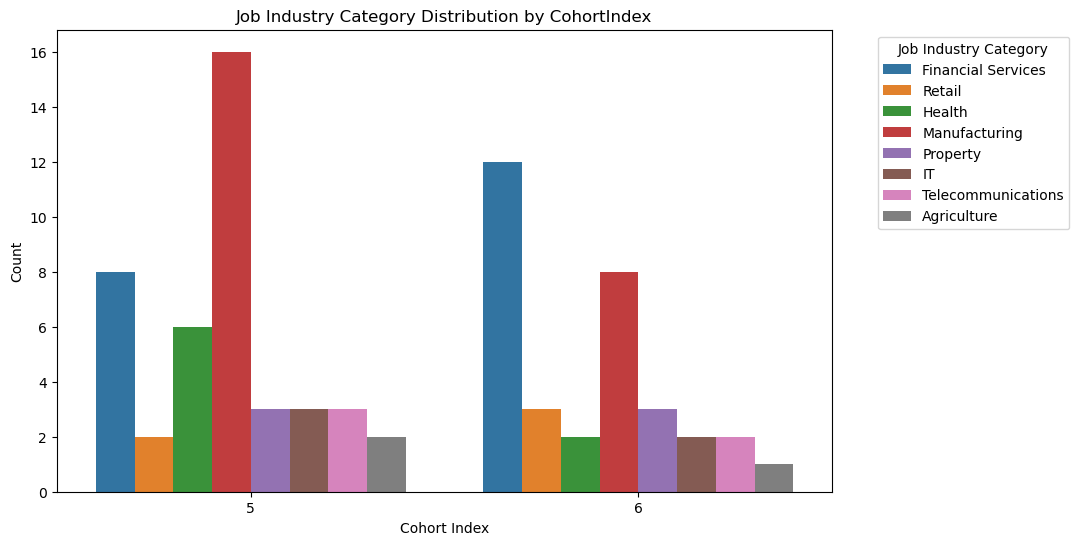

In [1107]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_cohorts, x='CohortIndex', hue='job_industry_category')
plt.title('Job Industry Category Distribution by CohortIndex')
plt.xlabel('Cohort Index')
plt.ylabel('Count')
plt.legend(title='Job Industry Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

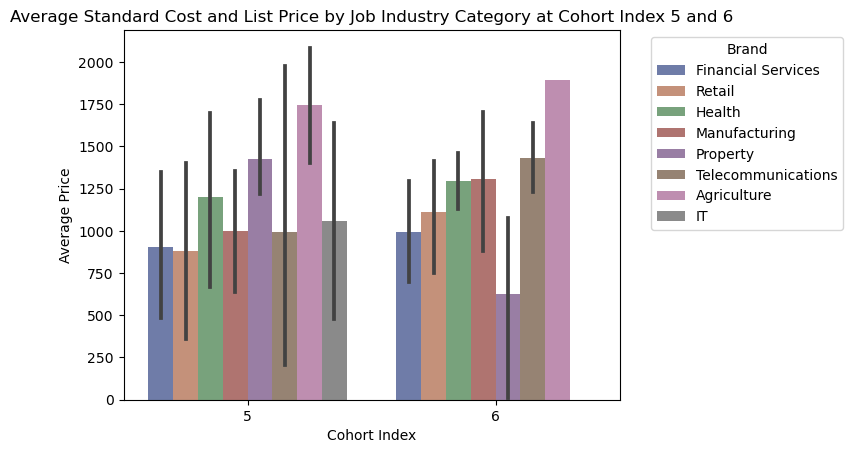

In [ ]:
sns.barplot(data=combined_cohorts, x='CohortIndex', y='list_price', hue='job_industry_category', palette='dark', alpha=0.6)

# Add title and labels
plt.title('Average Standard Cost and List Price by Job Industry Category at Cohort Index 5 and 6')
plt.xlabel('Cohort Index')
plt.ylabel('Average Price')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


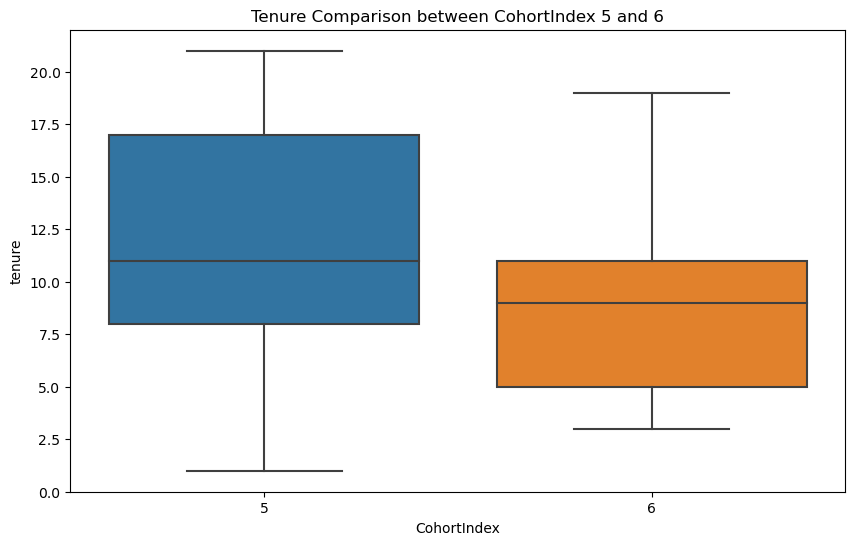

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CohortIndex', y='tenure', data=combined_cohorts)
plt.title('Tenure Comparison between CohortIndex 5 and 6')
plt.show()

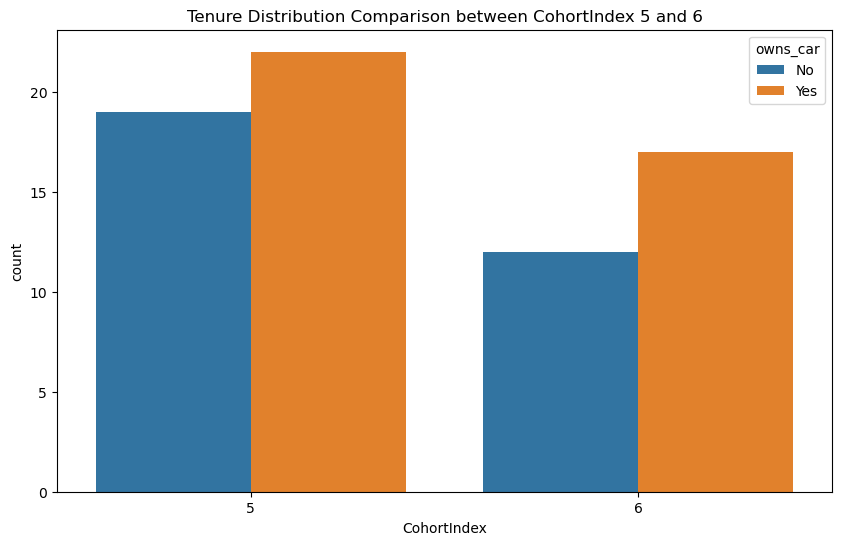

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_cohorts, x='CohortIndex', hue='owns_car')
plt.title('Tenure Distribution Comparison between CohortIndex 5 and 6')
plt.show()

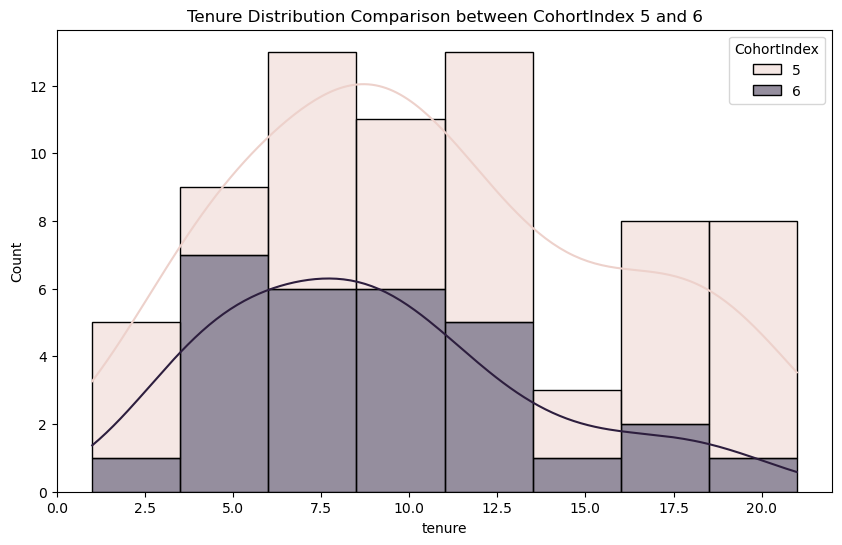

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_cohorts, x='tenure', hue='CohortIndex', multiple="stack", kde=True)
plt.title('Tenure Distribution Comparison between CohortIndex 5 and 6')
plt.show()

## Interpreting the retention rate
The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.

# bonus = join 3 table -> EDA + missing + cohort_analysis + root cause analysis connecting with customer tables + RFM model + segmentation

In [1109]:
agg_df = df.groupby('customer_id').agg(
    name=('name', 'first'),
    total_profit=('profit', 'sum'),
    total_list_price = ('list_price', 'sum'),
    last_transaction_date=('transaction_date', 'max'),
    transaction_count=('transaction_date', 'count')
).reset_index()
agg_df['Monetary_rank'] = agg_df['total_list_price'].rank(ascending=False, method='min')
agg_df['Recency_rank'] = agg_df['last_transaction_date'].rank(ascending=False, method='min')
agg_df['Frequency_rank'] = agg_df['transaction_count'].rank(ascending=False, method='min')
agg_df['avg_rank'] = agg_df[['Monetary_rank', 'Recency_rank', 'Frequency_rank']].mean(axis=1)
agg_df['rank'] = agg_df['avg_rank'].rank(ascending=True, method='min')
agg_df


customer_id                   name  total_profit  total_list_price  \
0               1      Laraine Medendorp       3018.09           9084.45   
1               2            Eli Bockman       2226.26           4149.07   
2               3           Arlin Dearle       3362.81           9888.23   
3               4                Talbot         220.57           1047.72   
4               5  Sheila-kathryn Calton       2394.94           5903.20   
...           ...                    ...           ...               ...   
3488         3496         Danya Burnyeat       2045.84           4725.38   
3489         3497             Thia O'Day       1648.32           3744.07   
3490         3498           Lois Abrahim       3147.33           5177.06   
3491         3499   Shelton Tewkesberrie       4955.25           7673.48   
3492         3500           Josy Fleeman       1785.86           4922.41   

     last_transaction_date  transaction_count  Monetary_rank  Recency_rank  \
0               2017-12-23                 11          609.0         351.0   
1               2017-08-24                  3         2644.0        3044.0   
2               2017-09-19                  8          434.0        2829.0   
3               2017-06-18                  2         3438.0        3360.0   
4               2017-12-14                  6         1811.0         788.0   
...                    ...                ...            ...           ...   
3488            2017-04-18                  4         2375.0        3449.0   
3489            2017-11-08                  3         2816.0        1946.0   
3490            2017-08-25                  6         2159.0        3038.0   
3491            2017-11-09                  7         1060.0        1926.0   
3492            2017-08-08                  6         2281.0        3163.0   

      Frequency_rank     avg_rank    rank  
0               48.0   336.000000   126.0  
1             2883.0  2857.000000  3176.0  
2              427.0  1230.000000  1165.0  
3             3243.0  3347.000000  3452.0  
4             1214.0  1271.000000  1238.0  
...              ...          ...     ...  
3488          2384.0  2736.000000  3084.0  
3489          2883.0  2548.333333  2900.0  
3490          1214.0  2137.000000  2459.0  
3491           738.0  1241.333333  1184.0  
3492          1214.0  2219.333333  2546.0  

[3493 rows x 11 columns]

In [1110]:
agg_df.sort_values(by='Monetary_rank', ascending=True).head()

customer_id               name  total_profit  total_list_price  \
2178         2183      Jillie Fyndon       6513.30          19071.32   
1126         1129           Hercule        6790.69          18349.27   
1593         1597      Jeffry Slowly       9739.46          18052.68   
938           941         Tye Doohan      11668.95          17898.46   
2782         2788  Melantha Pickburn       9061.47          17258.94   

     last_transaction_date  transaction_count  Monetary_rank  Recency_rank  \
2178            2017-12-22                 14            1.0         393.0   
1126            2017-12-04                 13            2.0        1188.0   
1593            2017-12-05                 12            3.0        1154.0   
938             2017-11-27                 10            4.0        1416.0   
2782            2017-11-16                 11            5.0        1741.0   

      Frequency_rank    avg_rank   rank  
2178             1.0  131.666667   20.0  
1126             4.0  398.000000  176.0  
1593            20.0  392.333333  169.0  
938            108.0  509.333333  267.0  
2782            48.0  598.000000  354.0

In [1111]:
agg_df.sort_values(by='Recency_rank', ascending=True).head()

customer_id               name  total_profit  total_list_price  \
1717         1721     Delcine Hansod       3766.35           8195.20   
1966         1970          Carl Eyre       3660.48           8590.23   
1325         1328     Stavro Gargett       5351.58          10301.23   
931           934  Marcellus Louisot       4899.60           9379.60   
930           933    Melany L'oiseau       2817.63           7598.65   

     last_transaction_date  transaction_count  Monetary_rank  Recency_rank  \
1717            2017-12-30                  7          880.0           1.0   
1966            2017-12-30                  8          744.0           1.0   
1325            2017-12-30                  7          349.0           1.0   
931             2017-12-30                  8          539.0           1.0   
930             2017-12-30                  5         1088.0           1.0   

      Frequency_rank    avg_rank   rank  
1717           738.0  539.666667  298.0  
1966           427.0  390.666667  167.0  
1325           738.0  362.666667  146.0  
931            427.0  322.333333  114.0  
930           1783.0  957.333333  745.0

In [1113]:
agg_df.sort_values(by='Frequency_rank', ascending=True).head()

customer_id             name  total_profit  total_list_price  \
2178         2183    Jillie Fyndon       6513.30          19071.32   
2471         2476      Hal Braddon       7493.23          14578.69   
1065         1068  Frazer Searston       4841.71          14254.55   
2068         2072   Margie Tillyer       4136.84          11845.44   
3318         3326       Wes Crotch      10422.04          14078.19   

     last_transaction_date  transaction_count  Monetary_rank  Recency_rank  \
2178            2017-12-22                 14            1.0         393.0   
2471            2017-12-16                 14           27.0         695.0   
1065            2017-12-26                 14           38.0         205.0   
2068            2017-12-22                 13          166.0         393.0   
3318            2017-12-01                 13           45.0        1286.0   

      Frequency_rank    avg_rank   rank  
2178             1.0  131.666667   20.0  
2471             1.0  241.000000   70.0  
1065             1.0   81.333333    8.0  
2068             4.0  187.666667   47.0  
3318             4.0  445.000000  209.0

In [1114]:
agg_df.sort_values(by='rank', ascending=True).head(10)

customer_id                   name  total_profit  total_list_price  \
321           322           De Denington      10341.57          14782.23   
2459         2464          Cleve Jindrak       7817.10          14574.06   
728           729  Ammamaria Standbridge      10497.78          15826.00   
2654         2659        Konstance Elgey       8143.93          11948.48   
2543         2548      Kristien Robberts       6085.99          14027.08   
1526         1530       Alexandr Maylard       7390.75          13634.73   
3042         3048       Kenon Messruther       8379.96          14756.09   
1065         1068        Frazer Searston       4841.71          14254.55   
1987         1991           Tobe Godrich       8256.08          12813.27   
1326         1329       Wendy Randlesome       8352.16          14818.12   

     last_transaction_date  transaction_count  Monetary_rank  Recency_rank  \
321             2017-12-29                 12           19.0          48.0   
2459            2017-12-28                 13           28.0          99.0   
728             2017-12-29                 10           11.0          48.0   
2654            2017-12-30                 12          154.0           1.0   
2543            2017-12-27                 13           48.0         156.0   
1526            2017-12-29                 10           61.0          48.0   
3042            2017-12-26                 13           20.0         205.0   
1065            2017-12-26                 14           38.0         205.0   
1987            2017-12-29                 10           91.0          48.0   
1326            2017-12-26                 11           18.0         205.0   

      Frequency_rank   avg_rank  rank  
321             20.0  29.000000   1.0  
2459             4.0  43.666667   2.0  
728            108.0  55.666667   3.0  
2654            20.0  58.333333   4.0  
2543             4.0  69.333333   5.0  
1526           108.0  72.333333   6.0  
3042             4.0  76.333333   7.0  
1065             1.0  81.333333   8.0  
1987           108.0  82.333333   9.0  
1326            48.0  90.333333  10.0

In [1115]:
agg_df['value_category'] = pd.qcut(agg_df['rank'], q=3, labels=['High Value', 'Mid Value', 'Low Value'])

In [1116]:
merged_df = pd.merge(grouped_df, agg_df, on='customer_id', how='inner')
merged_df = merged_df.drop(columns=['total_spent'])
merged_df.head()

customer_id  gender   age                             job_title  \
0            1  Female  66.0                   Executive Secretary   
1            2    Male  39.0                Administrative Officer   
2            3    Male  66.0                    Recruiting Manager   
3            4    Male  58.0  Business Systems Development Analyst   
4            5  Female  43.0                         Senior Editor   

  job_industry_category     wealth_segment owns_car  churn_status CohortMonth  \
0                Health      Mass Customer      Yes         False  2017-01-01   
1    Financial Services      Mass Customer      Yes          True  2017-05-01   
2              Property      Mass Customer      Yes          True  2017-02-01   
3                    IT      Mass Customer       No          True  2017-04-01   
4         Manufacturing  Affluent Customer      Yes         False  2017-03-01   

   past_3_years_bike_related_purchases  ...  total_profit total_list_price  \
0                                 93.0  ...       3018.09          9084.45   
1                                 81.0  ...       2226.26          4149.07   
2                                 61.0  ...       3362.81          9888.23   
3                                 33.0  ...        220.57          1047.72   
4                                 56.0  ...       2394.94          5903.20   

   last_transaction_date  transaction_count Monetary_rank  Recency_rank  \
0             2017-12-23                 11         609.0         351.0   
1             2017-08-24                  3        2644.0        3044.0   
2             2017-09-19                  8         434.0        2829.0   
3             2017-06-18                  2        3438.0        3360.0   
4             2017-12-14                  6        1811.0         788.0   

   Frequency_rank  avg_rank    rank  value_category  
0            48.0     336.0   126.0      High Value  
1          2883.0    2857.0  3176.0       Low Value  
2           427.0    1230.0  1165.0      High Value  
3          3243.0    3347.0  3452.0       Low Value  
4          1214.0    1271.0  1238.0       Mid Value  

[5 rows x 22 columns]

In [1117]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3493 non-null   int64         
 1   gender                               3493 non-null   object        
 2   age                                  3493 non-null   float64       
 3   job_title                            3493 non-null   object        
 4   job_industry_category                3493 non-null   object        
 5   wealth_segment                       3493 non-null   object        
 6   owns_car                             3493 non-null   object        
 7   churn_status                         3493 non-null   bool          
 8   CohortMonth                          3493 non-null   datetime64[ns]
 9   past_3_years_bike_related_purchases  3493 non-null   float64       
 10  tenure      

/var/folders/_y/30qs0jz17rz4wnknc7dm4rcr0000gn/T/ipykernel_33544/1900753603.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


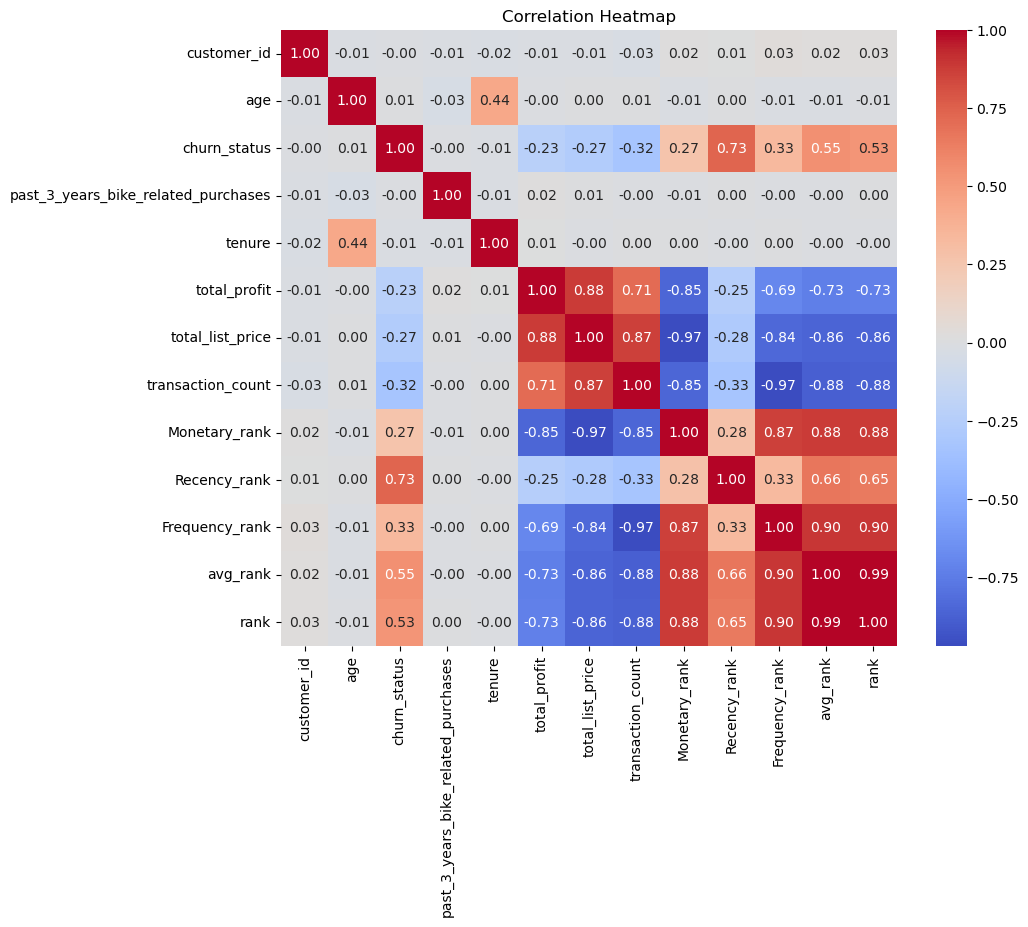

In [1118]:
corr = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

#True(churn) == 1, False(active) == 0, negative corrolation with total profit, transaction num 取消使用减少profit和下单数量
#取消使用意味着rank会更低（但数字更大）positive correlation 

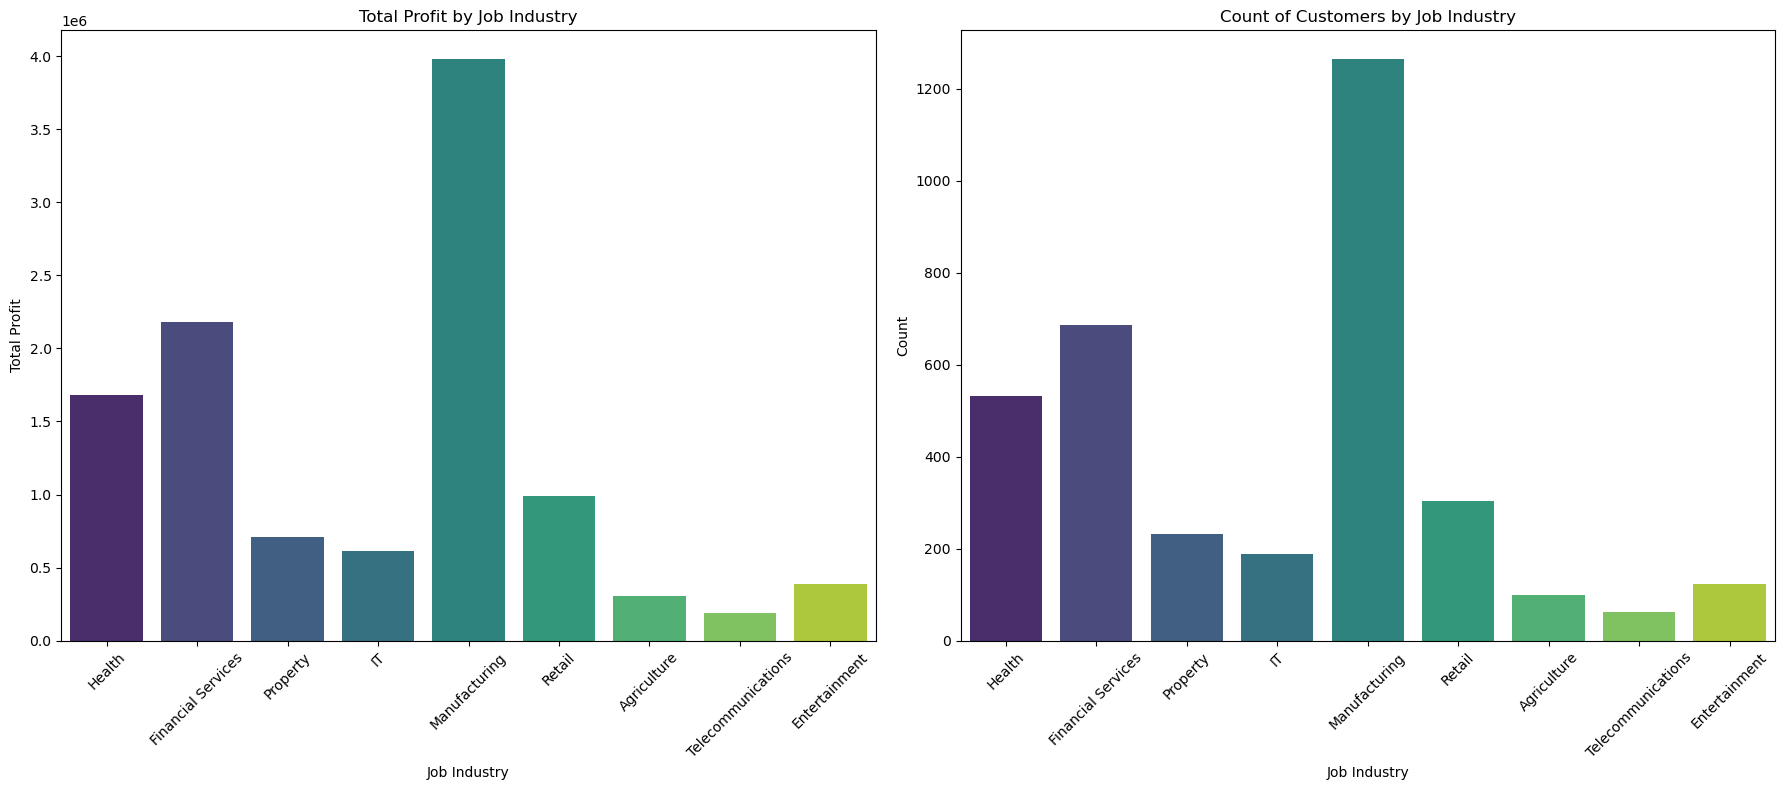

In [1119]:
industry_order = merged_df['job_industry_category'].unique()

plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='job_industry_category', y='total_profit', data=merged_df.groupby('job_industry_category')['total_profit'].sum().reset_index(), 
            palette='viridis', order=industry_order)
plt.title('Total Profit by Job Industry')
plt.xticks(rotation=45)
plt.ylabel('Total Profit')
plt.xlabel('Job Industry')

plt.subplot(1, 2, 2)
sns.countplot(x='job_industry_category', data=merged_df, palette='viridis', order=industry_order)
plt.title('Count of Customers by Job Industry')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Job Industry')

plt.tight_layout()

plt.show()

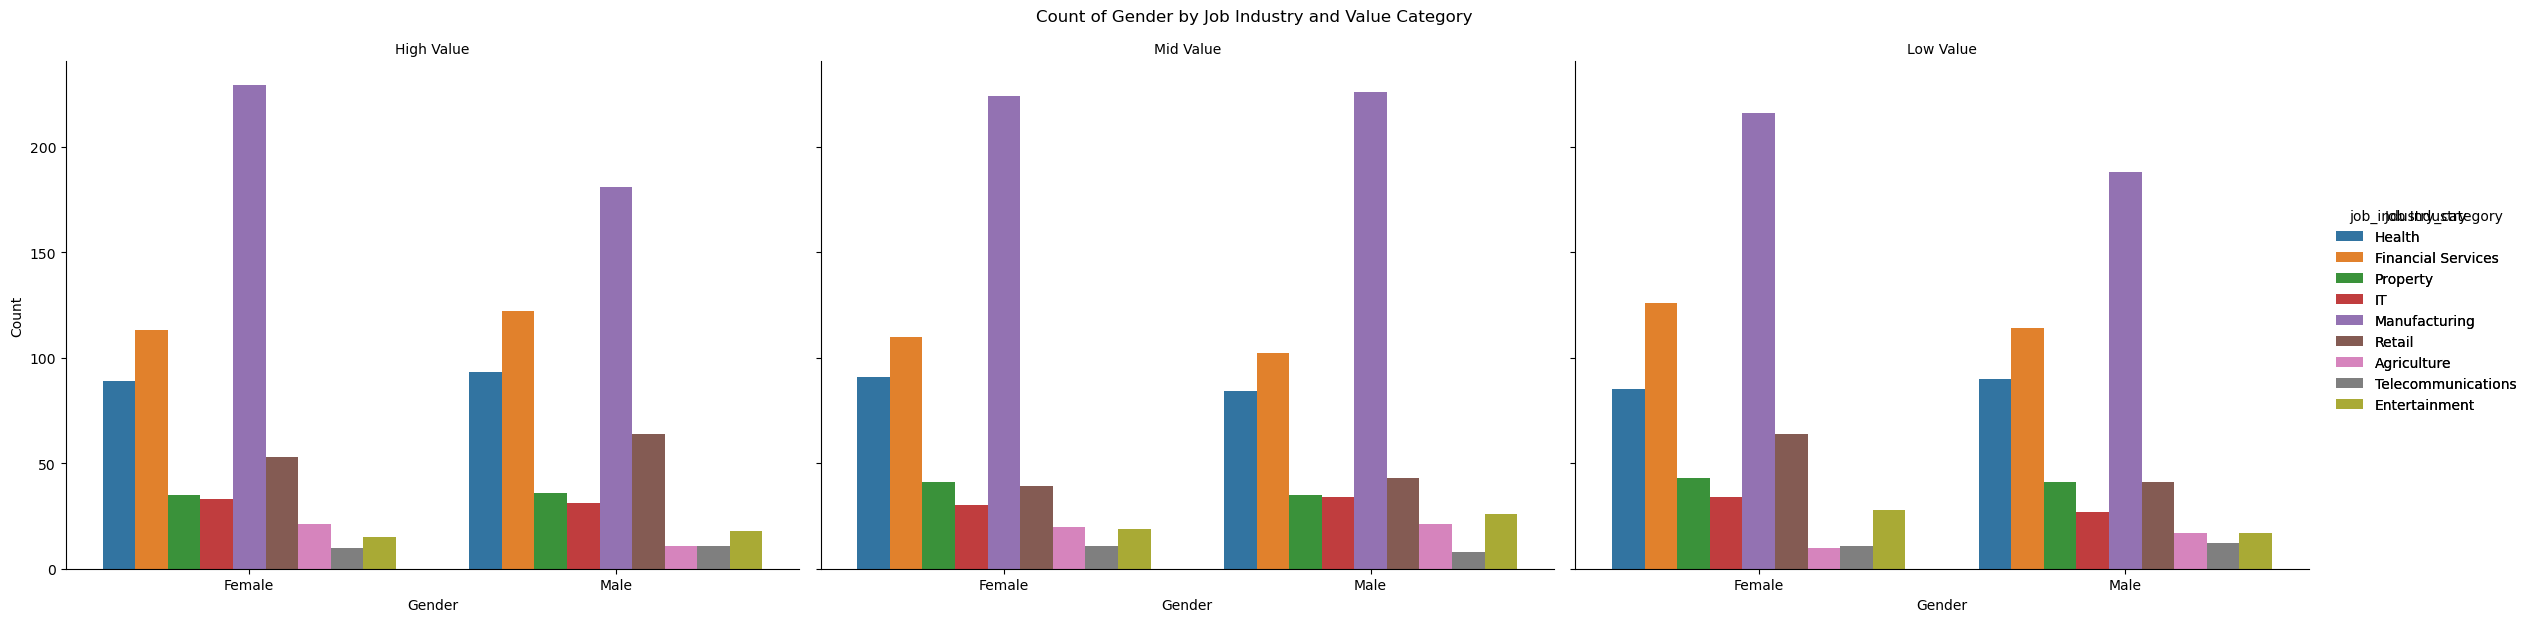

In [1120]:
g = sns.catplot(x='gender', hue='job_industry_category', col='value_category', data=merged_df, kind='count', height=6, aspect=1.2, dodge=True)

g.set_axis_labels("Gender", "Count")
g.set_titles("{col_name}")
g.fig.suptitle("Count of Gender by Job Industry and Value Category", y=1.03)
g.add_legend(title="Job Industry")

plt.show()


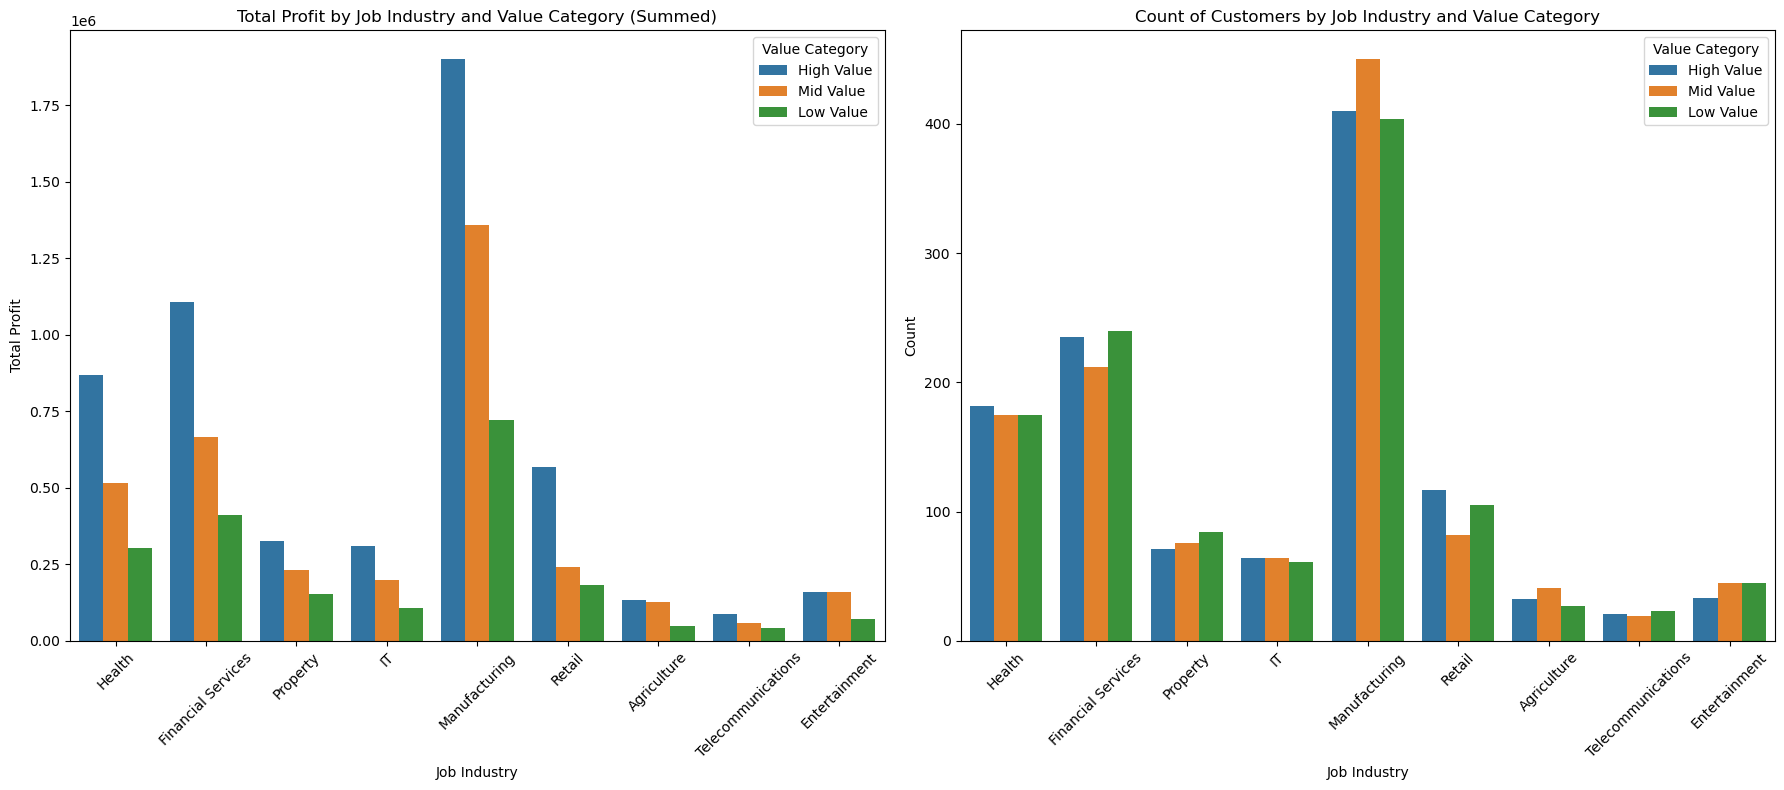

In [1121]:
industry_order = merged_df['job_industry_category'].unique()

# Group the data by job industry and gender, and sum the total profit
grouped_data = merged_df.groupby(['job_industry_category', 'value_category'])['total_profit'].sum().reset_index()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Summed Total Profit by Job Industry and Gender
sns.barplot(x='job_industry_category', y='total_profit', hue='value_category', data=grouped_data,
            ax=axes[0], order=industry_order)
axes[0].set_title('Total Profit by Job Industry and Value Category (Summed)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel('Total Profit')
axes[0].set_xlabel('Job Industry')
axes[0].legend(title='Value Category')

sns.countplot(x='job_industry_category', hue='value_category', data=merged_df, ax=axes[1], order=industry_order)
axes[1].set_title('Count of Customers by Job Industry and Value Category')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Job Industry')
axes[1].legend(title='Value Category')

plt.tight_layout()

plt.show()

In [1122]:
df = df.merge(merged_df[['customer_id', 'value_category']], on='customer_id', how='left')
df

transaction_id product_id customer_id transaction_date  online_order  \
0                  1          2        2950       2017-02-25         False   
1                  2          3        3120       2017-05-21          True   
2                  3         37         402       2017-10-16         False   
3                  4         88        3135       2017-08-31         False   
4                  5         78         787       2017-10-01          True   
...              ...        ...         ...              ...           ...   
19992          19996         51        1018       2017-06-24          True   
19993          19997         41         127       2017-11-09          True   
19994          19998         87        2284       2017-04-14          True   
19995          19999          6        2764       2017-07-03         False   
19996          20000         11        1144       2017-09-22          True   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19992     Approved      OHM Cycles     Standard          high       medium   
19993     Approved           Solex         Road        medium       medium   
19994     Approved      OHM Cycles     Standard        medium       medium   
19995     Approved      OHM Cycles     Standard          high       medium   
19996     Approved   Trek Bicycles     Standard        medium        small   

       ...  state    country  property_valuation   profit TransactionMonth  \
0      ...    VIC  Australia                   6    17.87       2017-02-01   
1      ...    NSW  Australia                   5  1702.55       2017-05-01   
2      ...    NSW  Australia                   1  1544.61       2017-10-01   
3      ...    NSW  Australia                  10   817.36       2017-08-01   
4      ...    NSW  Australia                   7  1055.82       2017-10-01   
...    ...    ...        ...                 ...      ...              ...   
19992  ...    VIC  Australia                  10   802.26       2017-06-01   
19993  ...    QLD  Australia                   1   104.24       2017-11-01   
19994  ...    VIC  Australia                   1  1592.19       2017-04-01   
19995  ...    QLD  Australia                   1    91.15       2017-07-01   
19996  ...    NSW  Australia                   9   195.34       2017-09-01   

       CohortMonth CohortIndex  last_purchase_date churn_status value_category  
0       2017-02-01           1          2017-10-16        False      Low Value  
1       2017-01-01           5          2017-12-10        False     High Value  
2       2017-01-01          10          2017-11-04        False      Mid Value  
3       2017-02-01           7          2017-08-31         True      Mid Value  
4       2017-01-01          10          2017-10-16        False     High Value  
...            ...         ...                 ...          ...            ...  
19992   2017-01-01           6          2017-12-04        False      Mid Value  
19993   2017-01-01          11          2017-12-07        False     High Value  
19994   2017-04-01           1          2017-11-26        False     High Value  
19995   2017-02-01           6          2017-11-09        False      Low Value  
19996   2017-03-01           7          2017-12-13        False     High Value  

[19997 rows x 36 columns]

In [899]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19996
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  object        
 1   product_id                           19997 non-null  object        
 2   customer_id                          19997 non-null  object        
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19997 non-null  bool          
 5   order_status                         19997 non-null  object        
 6   brand                                19997 non-null  object        
 7   product_line                         19997 non-null  object        
 8   product_class                        19997 non-null  object        
 9   product_size                         19997 non-null  object        
 10  list_price

In [1123]:
july_2017_cohort = df[df['CohortMonth'] == '2017-07-01']
july_2017_cohort_5 = july_2017_cohort[july_2017_cohort['CohortIndex'] == 5]
july_2017_cohort_6 = july_2017_cohort[july_2017_cohort['CohortIndex'] == 6]
combined_cohorts = pd.concat([july_2017_cohort_5, july_2017_cohort_6])
combined_cohorts

transaction_id product_id customer_id transaction_date  online_order  \
1750            1751         22        2730       2017-11-21         False   
2160            2161         98        2694       2017-11-22         False   
2561            2562         35        2514       2017-11-14          True   
3035            3036         27        2730       2017-11-21         False   
3397            3398         51        1809       2017-11-20         False   
...              ...        ...         ...              ...           ...   
16936          16939         40        1167       2017-12-20         False   
17550          17554         68        1050       2017-12-04          True   
18354          18358         33         856       2017-12-14         False   
18602          18606          4        1809       2017-12-03          True   
19600          19604         74         926       2017-12-18         False   

      order_status           brand product_line product_class product_size  \
1750      Approved        WeareA2B     Standard        medium       medium   
2160      Approved   Trek Bicycles     Standard          high       medium   
2561      Approved  Giant Bicycles     Standard        medium       medium   
3035      Approved   Trek Bicycles     Standard        medium       medium   
3397      Approved      OHM Cycles     Standard          high       medium   
...            ...             ...          ...           ...          ...   
16936     Approved      OHM Cycles     Standard          high       medium   
17550     Approved      OHM Cycles     Standard        medium       medium   
18354     Approved  Giant Bicycles     Standard        medium        small   
18602     Approved  Giant Bicycles     Standard          high       medium   
19600     Approved        WeareA2B     Standard        medium       medium   

       ...  state    country  property_valuation   profit TransactionMonth  \
1750   ...    QLD  Australia                   7    15.08       2017-11-01   
2160   ...    QLD  Australia                   3   143.36       2017-11-01   
2561   ...    VIC  Australia                  10   448.68       2017-11-01   
3035   ...    QLD  Australia                   7   110.81       2017-11-01   
3397   ...    NSW  Australia                   7   802.26       2017-11-01   
...    ...    ...        ...                 ...      ...              ...   
16936  ...    QLD  Australia                   6   583.27       2017-12-01   
17550  ...    NSW  Australia                  11  1592.19       2017-12-01   
18354  ...    VIC  Australia                   7   144.26       2017-12-01   
18602  ...    NSW  Australia                   7   451.65       2017-12-01   
19600  ...    NSW  Australia                   8   827.16       2017-12-01   

       CohortMonth CohortIndex  last_purchase_date churn_status value_category  
1750    2017-07-01           5          2017-12-26        False     High Value  
2160    2017-07-01           5          2017-12-01        False      Low Value  
2561    2017-07-01           5          2017-11-14        False      Low Value  
3035    2017-07-01           5          2017-12-26        False     High Value  
3397    2017-07-01           5          2017-12-03        False     High Value  
...            ...         ...                 ...          ...            ...  
16936   2017-07-01           6          2017-12-20        False      Mid Value  
17550   2017-07-01           6          2017-12-04        False      Mid Value  
18354   2017-07-01           6          2017-12-29        False     High Value  
18602   2017-07-01           6          2017-12-03        False     High Value  
19600   2017-07-01           6          2017-12-18        False      Mid Value  

[76 rows x 36 columns]

In [ ]:
combined_cohorts.info()


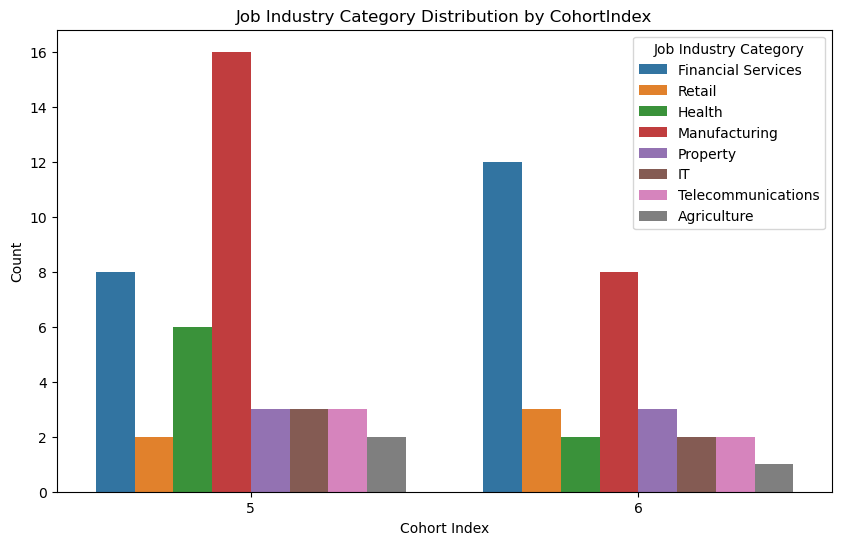

In [1165]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_cohorts, x='CohortIndex', hue='job_industry_category')
plt.title('Job Industry Category Distribution by CohortIndex')
plt.xlabel('Cohort Index')
plt.ylabel('Count')
plt.legend(title='Job Industry Category',loc='upper right')
plt.show()

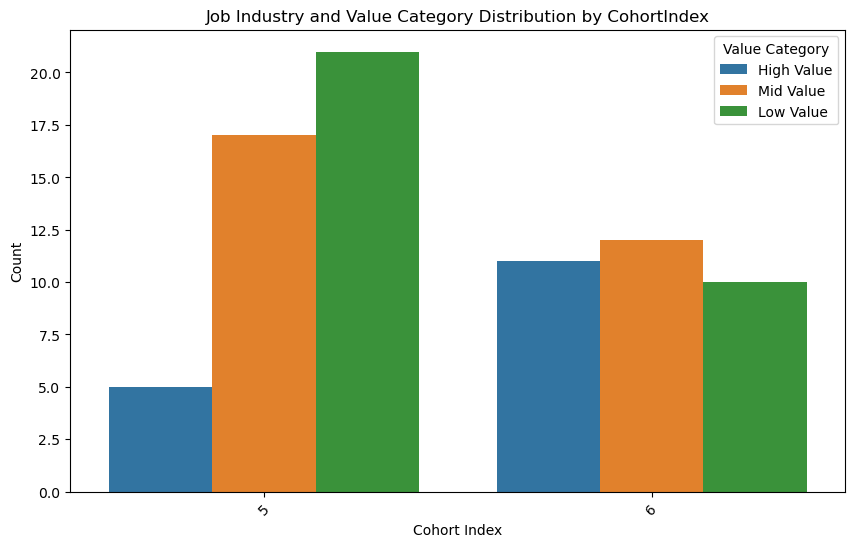

In [1136]:
plt.figure(figsize=(10, 6))

# Use countplot to create the bar plot
sns.countplot(x='CohortIndex', hue='value_category', data=combined_cohorts, dodge=True)

# Adjust aesthetics
plt.title('Job Industry and Value Category Distribution by CohortIndex')
plt.ylabel('Count')
plt.xlabel('Cohort Index')
plt.legend(title='Value Category', loc='upper right')
plt.xticks(rotation=45)

# Display the plot
plt.show()

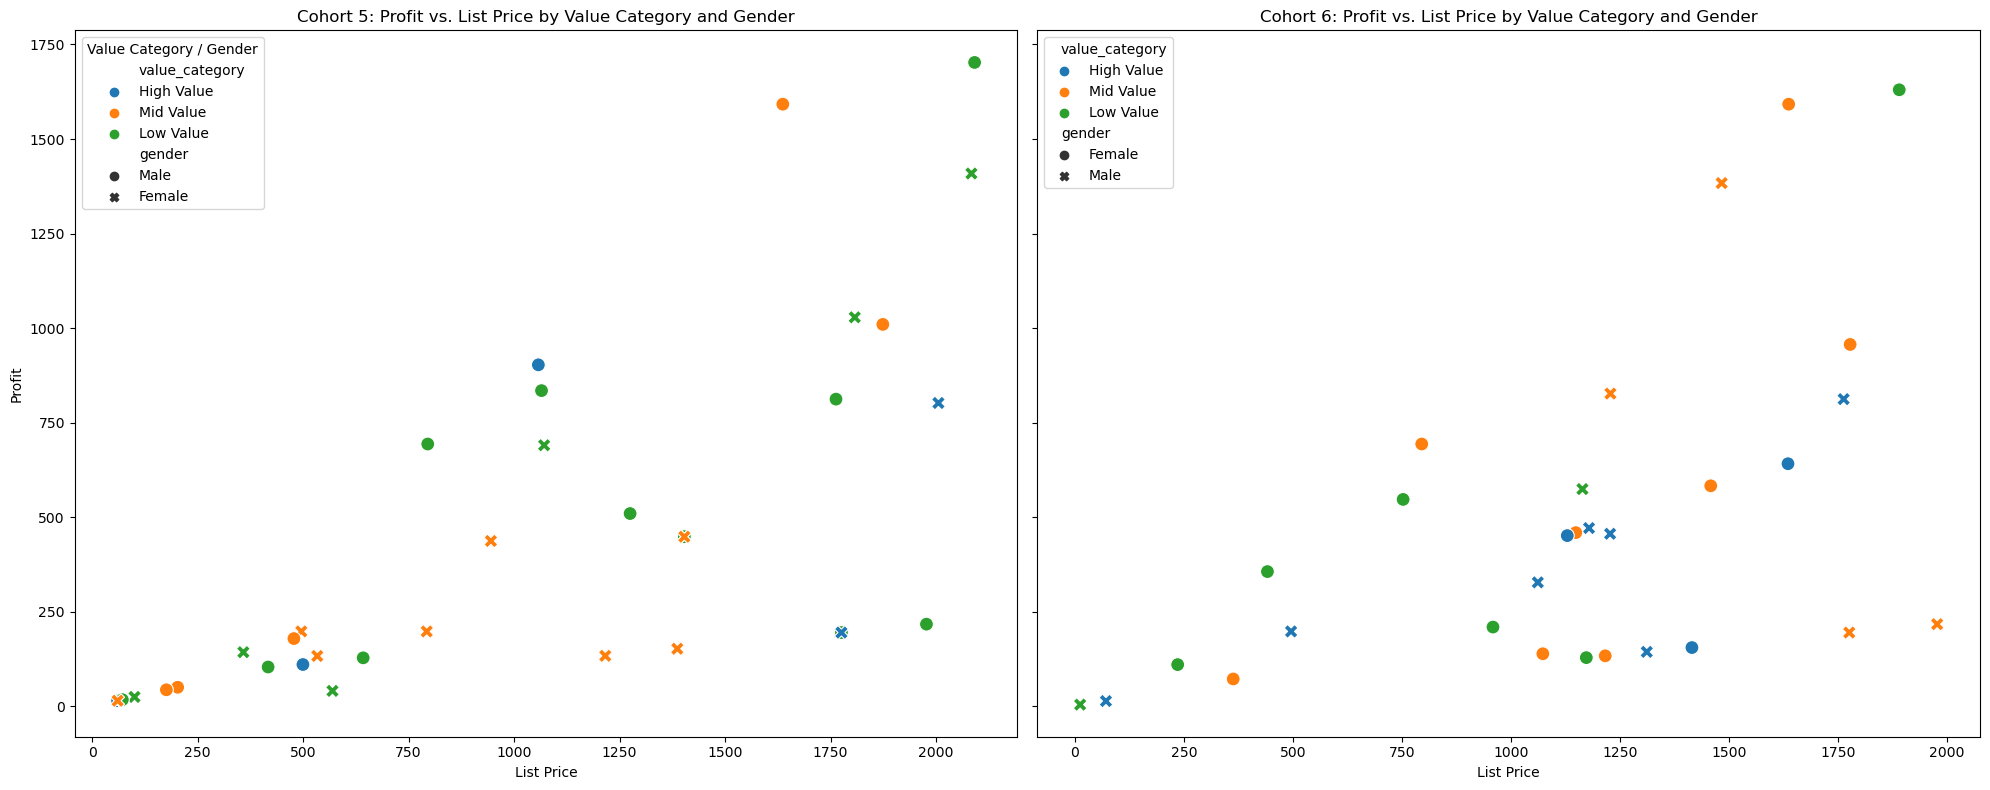

In [1163]:
# Create a figure with two subplots, side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# First plot: july_2017_cohort_6
sns.scatterplot(x='list_price', y='profit', hue='value_category', style='gender', data=july_2017_cohort_5, s=100, ax=ax1)
ax1.set_title('Cohort 5: Profit vs. List Price by Value Category and Gender')
ax1.set_xlabel('List Price')
ax1.set_ylabel('Profit')
ax1.legend(title='Value Category / Gender')

# Second plot: july_2017_cohort_5
sns.scatterplot(x='list_price', y='profit', hue='value_category', style='gender', data=july_2017_cohort_6, s=100, ax=ax2)
ax2.set_title('Cohort 6: Profit vs. List Price by Value Category and Gender')
ax2.set_xlabel('List Price')
ax2.set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

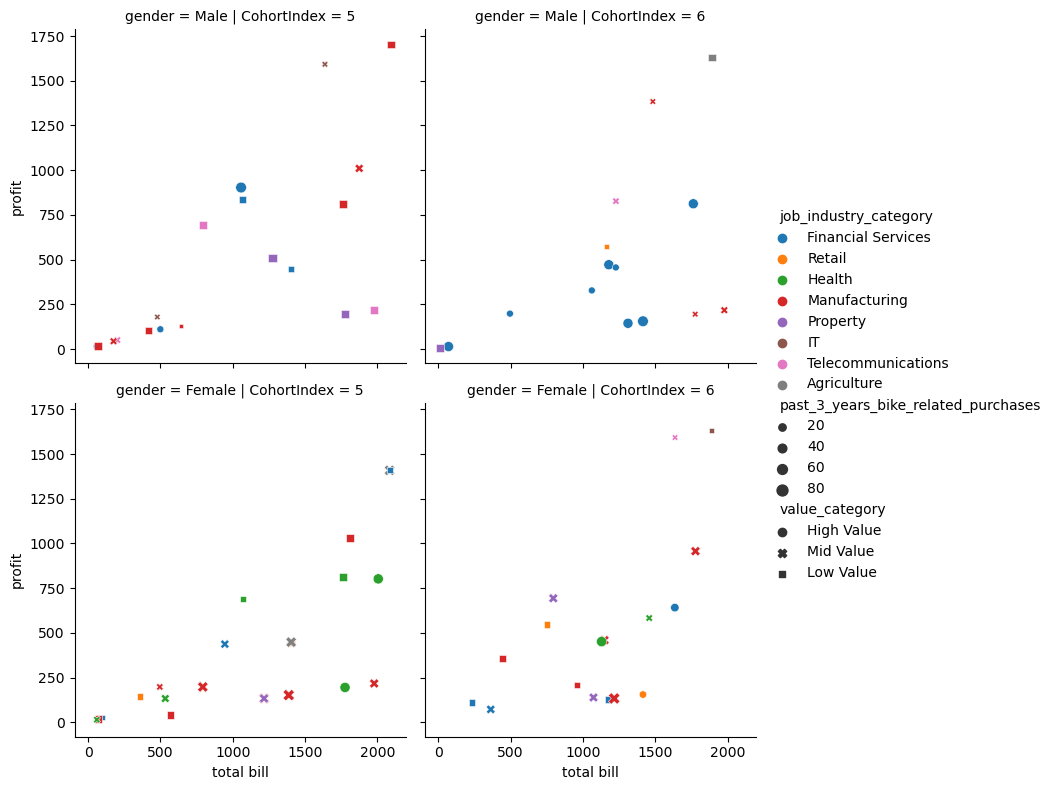

In [1173]:
sns.color_palette('pastel')
ax = sns.relplot(data=combined_cohorts, kind='scatter', x='list_price',y='profit',hue='job_industry_category',col='CohortIndex', style='value_category', size='past_3_years_bike_related_purchases', row='gender', height=4)
ax.set(xlabel="total bill")
plt.show()

In [1177]:
df[df.job_industry_category == 'Agriculture']

transaction_id product_id customer_id transaction_date  online_order  \
43                44         46         165       2017-12-22         False   
58                59         93         993       2017-02-15          True   
114              115         76        1779       2017-05-01         False   
160              161         69        2381       2017-07-10         False   
171              172         55        2365       2017-04-11          True   
...              ...        ...         ...              ...           ...   
19719          19723         60        1841       2017-01-03          True   
19739          19743         62        1451       2017-07-26          True   
19784          19788         92        2474       2017-08-09         False   
19884          19888          2        1686       2017-05-10          True   
19893          19897         70        3163       2017-09-05          True   

      order_status           brand product_line product_class product_size  \
43        Approved           Solex     Standard           low       medium   
58        Approved      OHM Cycles     Standard          high       medium   
114       Approved        WeareA2B     Standard           low       medium   
160       Approved  Giant Bicycles         Road        medium       medium   
171       Approved   Trek Bicycles         Road        medium        large   
...            ...             ...          ...           ...          ...   
19719     Approved  Giant Bicycles     Standard          high        small   
19739     Approved           Solex     Standard        medium       medium   
19784     Approved        WeareA2B      Touring        medium        large   
19884     Approved           Solex     Standard        medium       medium   
19893     Approved   Trek Bicycles     Standard          high       medium   

       ...  state    country  property_valuation   profit TransactionMonth  \
43     ...    NSW  Australia                  10  1215.34       2017-12-01   
58     ...    NSW  Australia                   3   583.27       2017-02-01   
114    ...    VIC  Australia                   7   128.46       2017-05-01   
160    ...    NSW  Australia                   9   198.22       2017-07-01   
171    ...    QLD  Australia                   6  1295.43       2017-04-01   
...    ...    ...        ...                 ...      ...              ...   
19719  ...    NSW  Australia                  11   217.51       2017-01-01   
19739  ...    NSW  Australia                   9   179.44       2017-07-01   
19784  ...    QLD  Australia                   2  1630.25       2017-08-01   
19884  ...    NSW  Australia                  10    17.87       2017-05-01   
19893  ...    NSW  Australia                  10   198.29       2017-09-01   

       CohortMonth CohortIndex  last_purchase_date churn_status value_category  
43      2017-03-01          10          2017-12-22        False     High Value  
58      2017-02-01           1          2017-12-30        False     High Value  
114     2017-01-01           5          2017-08-23         True      Mid Value  
160     2017-03-01           5          2017-12-01        False     High Value  
171     2017-01-01           4          2017-12-29        False      Mid Value  
...            ...         ...                 ...          ...            ...  
19719   2017-01-01           1          2017-11-24        False      Mid Value  
19739   2017-01-01           7          2017-11-29        False     High Value  
19784   2017-02-01           7          2017-11-29        False     High Value  
19884   2017-01-01           5          2017-10-13        False     High Value  
19893   2017-01-01           9          2017-12-16        False      Mid Value  

[578 rows x 36 columns]

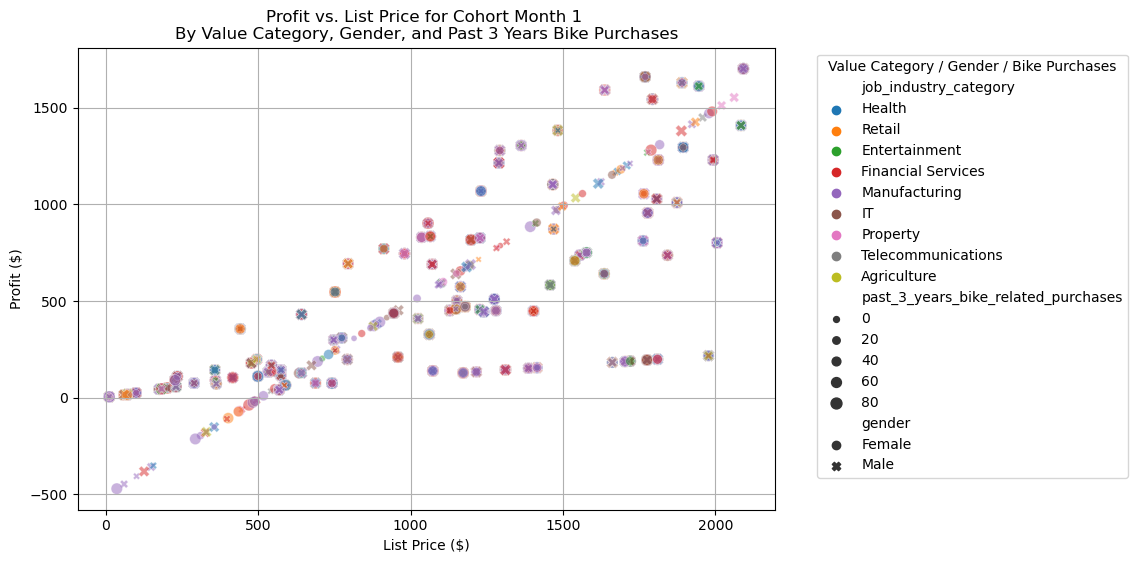

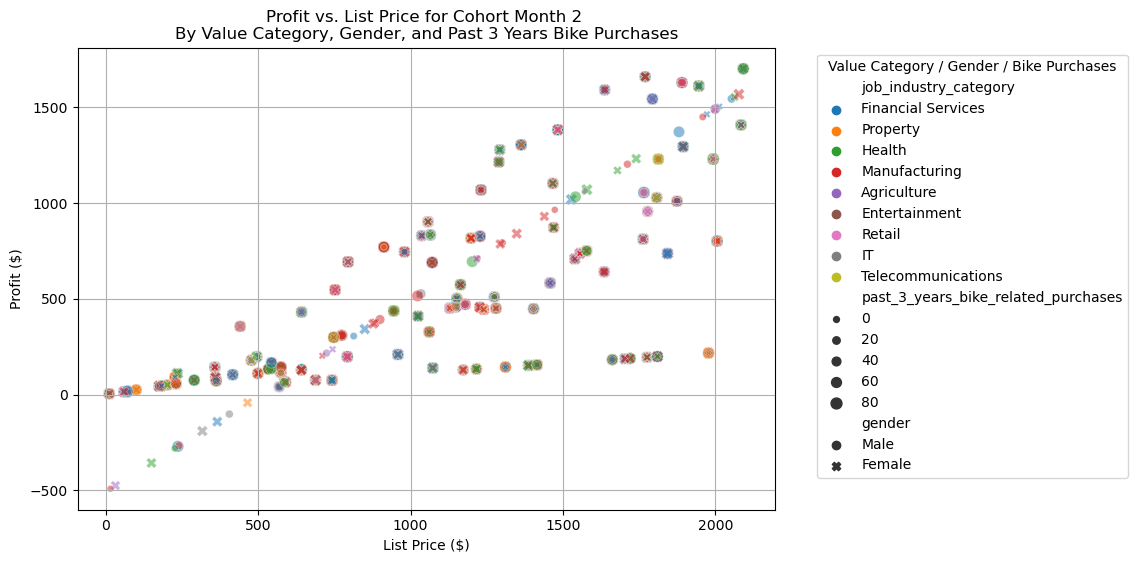

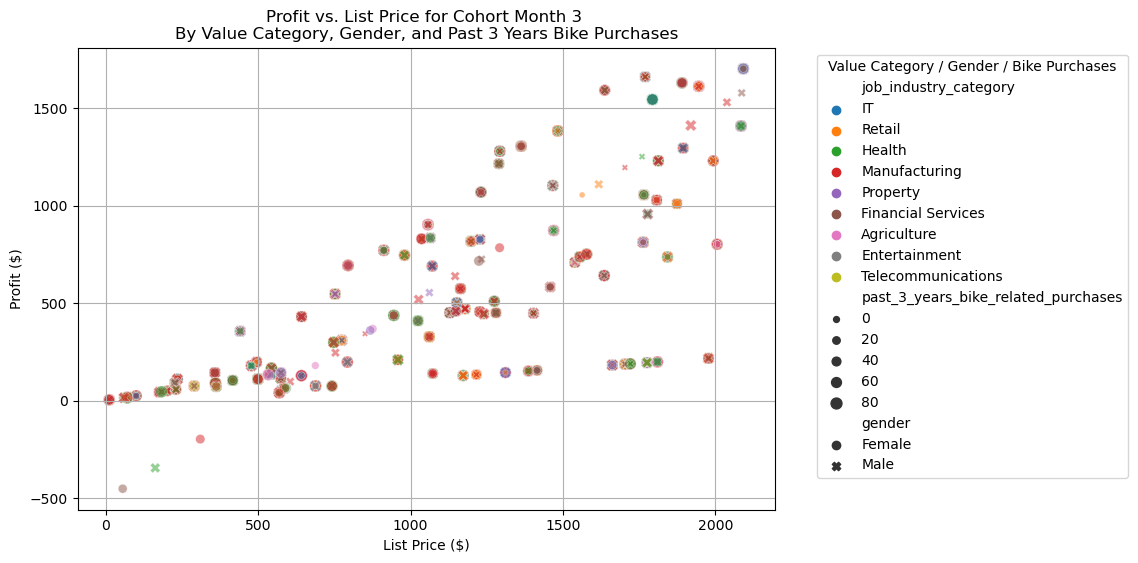

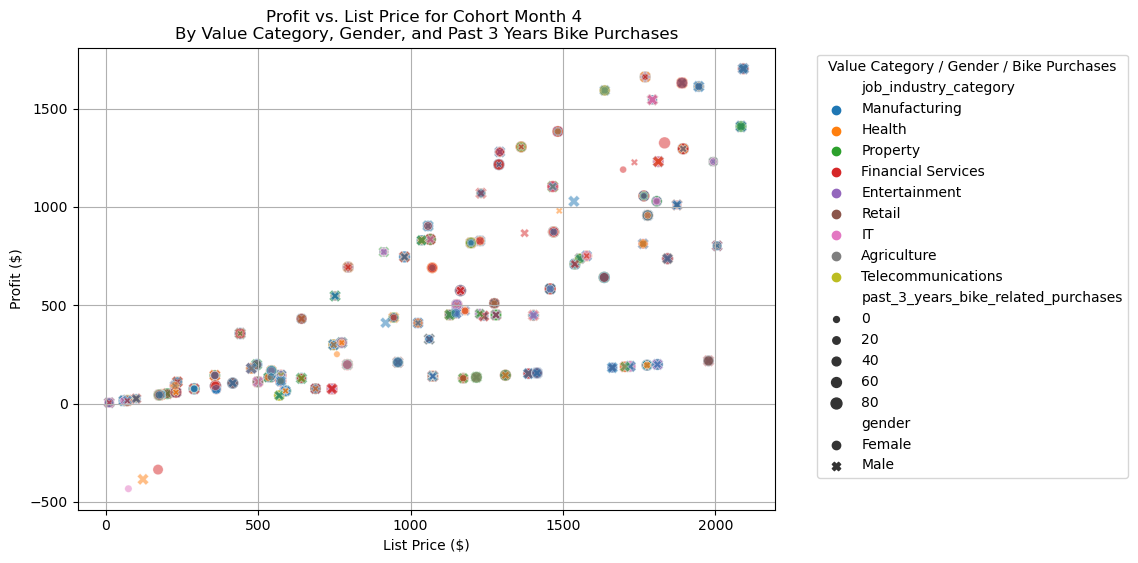

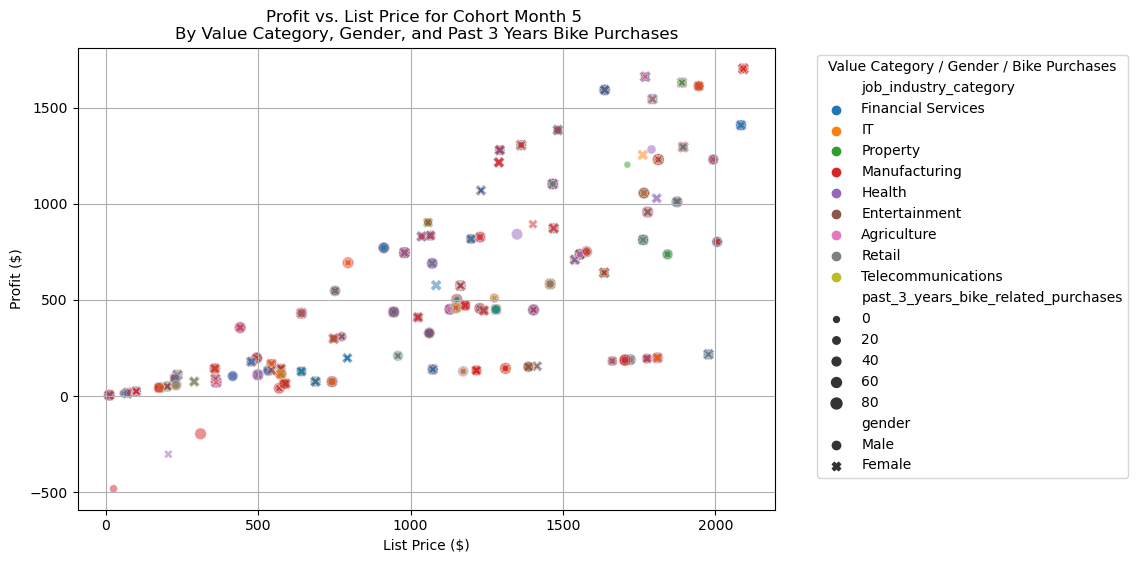

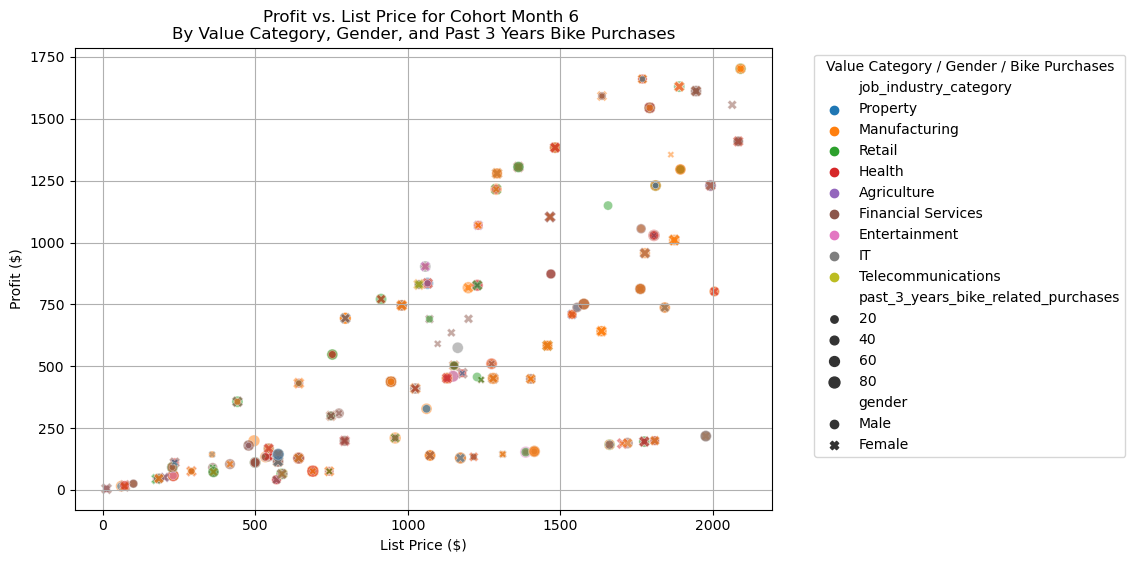

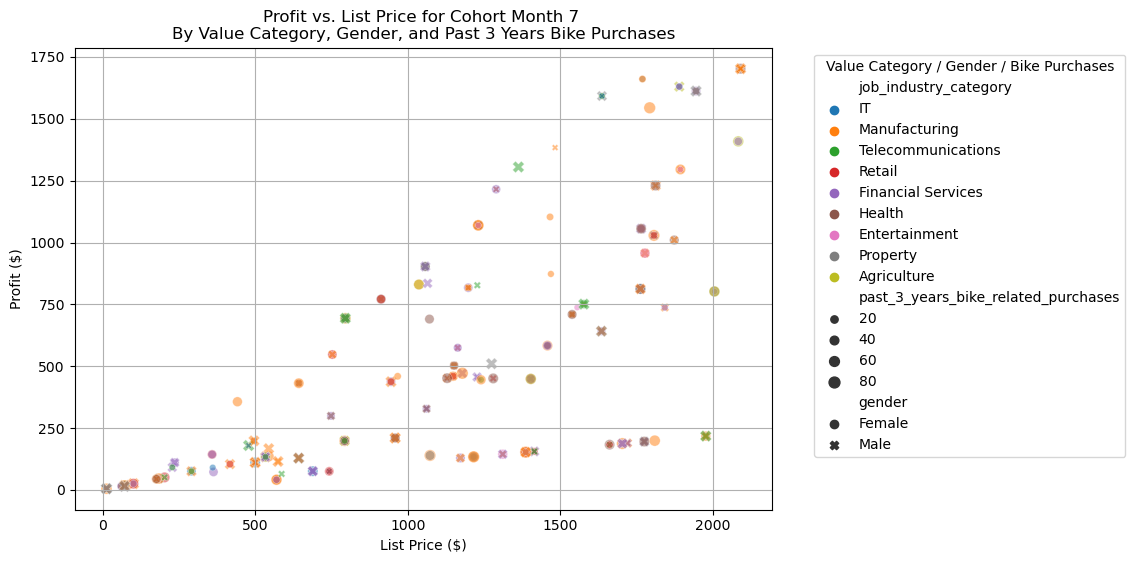

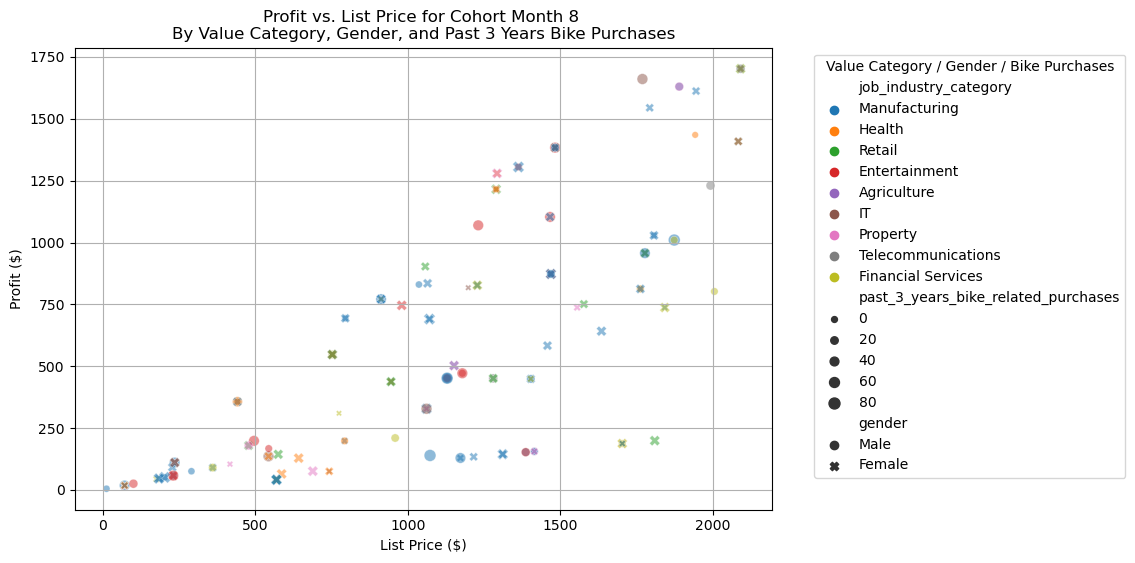

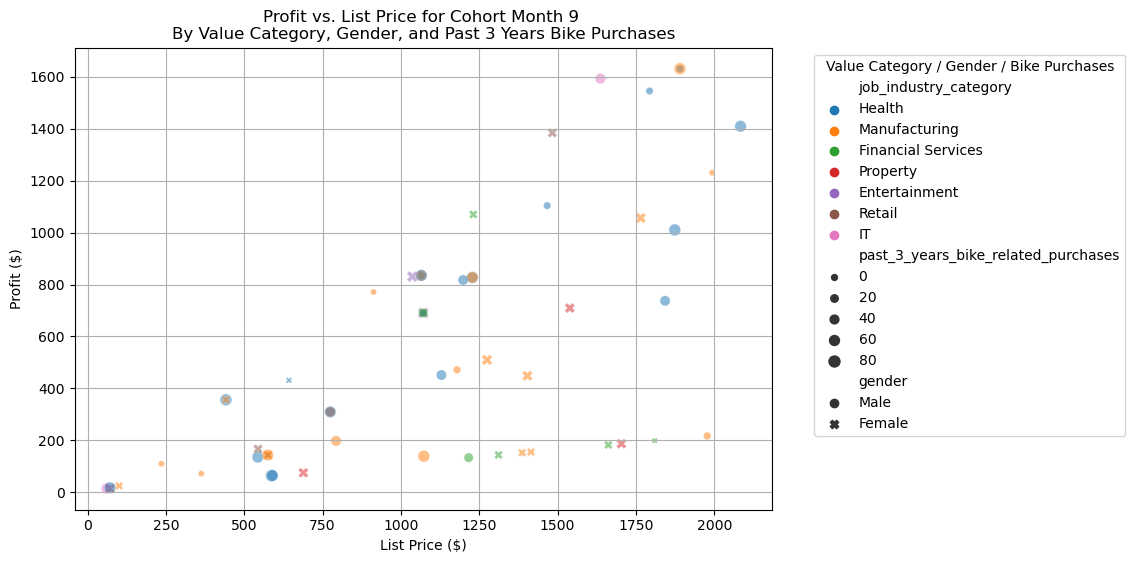

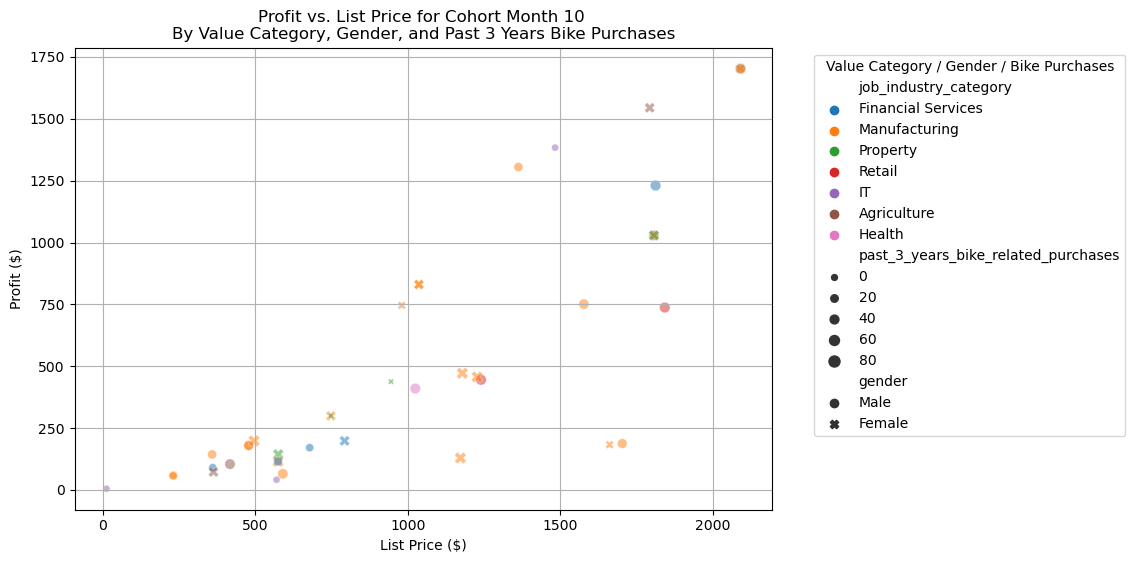

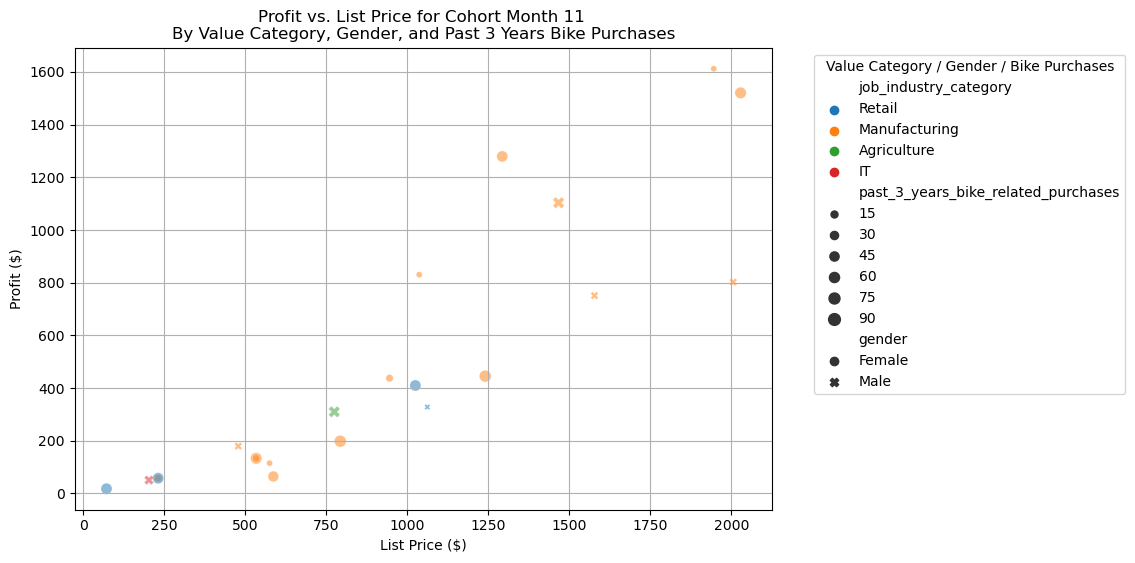

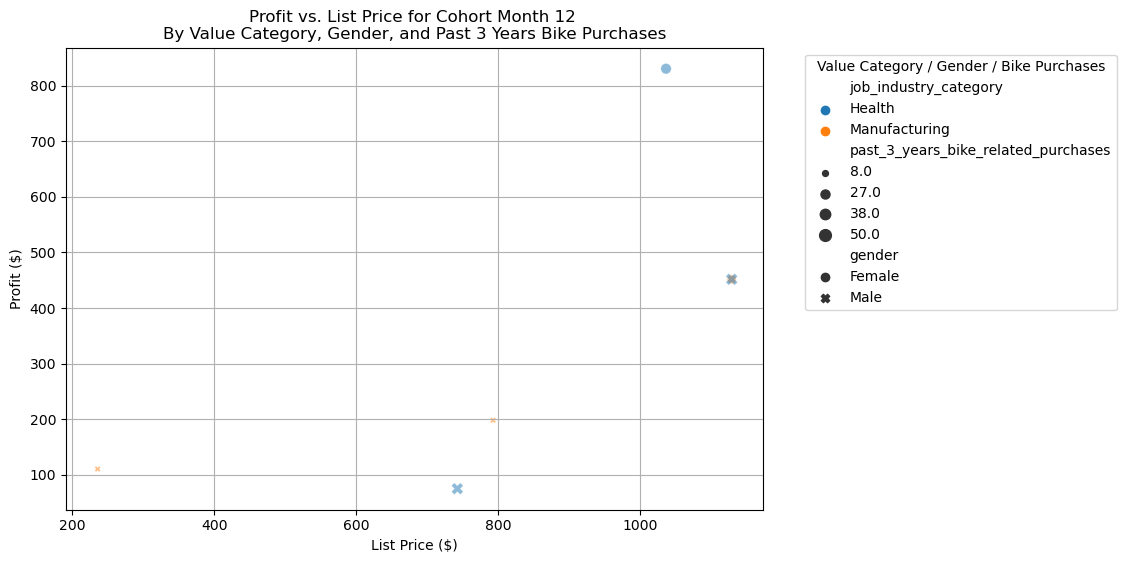

In [1228]:
for a, i in zip(range(1, 13), sorted_cohort_months):
    plt.figure(figsize=(9, 6))

    # Improved scatter plot
    sns.scatterplot(
        x='list_price', 
        y='profit', 
        hue='job_industry_category', 
        style='gender', 
        size='past_3_years_bike_related_purchases', 
        data=df[df.CohortMonth == i],
        alpha=0.5
    )
    plt.title(f'Profit vs. List Price for Cohort Month {a} \nBy Value Category, Gender, and Past 3 Years Bike Purchases')
    plt.xlabel('List Price ($)')
    plt.ylabel('Profit ($)')
    plt.legend(title='Value Category / Gender / Bike Purchases', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)


Text(0.5, 1.0, 'Age Distribution by Wealth Segment and value_category')

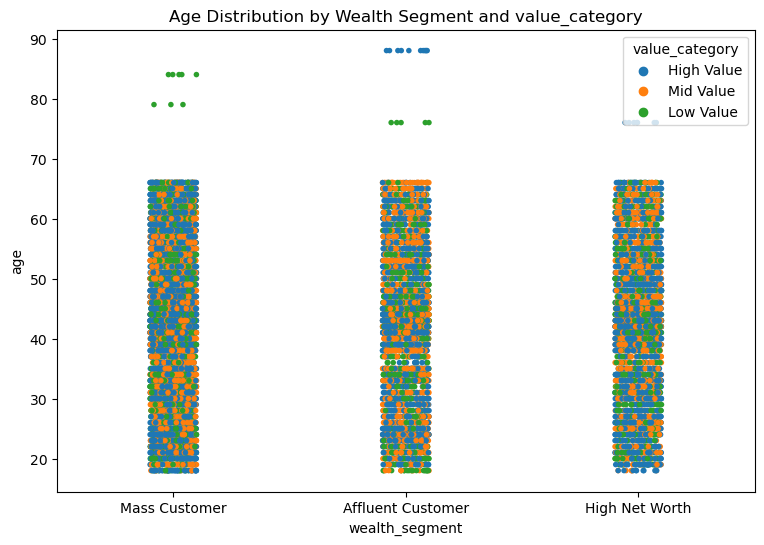

In [1233]:
plt.figure(figsize=(9, 6))
sns.stripplot(x='wealth_segment', y='age', hue = 'value_category',data=df, jitter=True,
                  color=None, size=4, edgecolor="gray", linewidth=0)
plt.title("Age Distribution by Wealth Segment and value_category")
#more high value customers in high net worth group

Text(0.5, 1.0, 'Age Distribution by Wealth Segment and Brand')

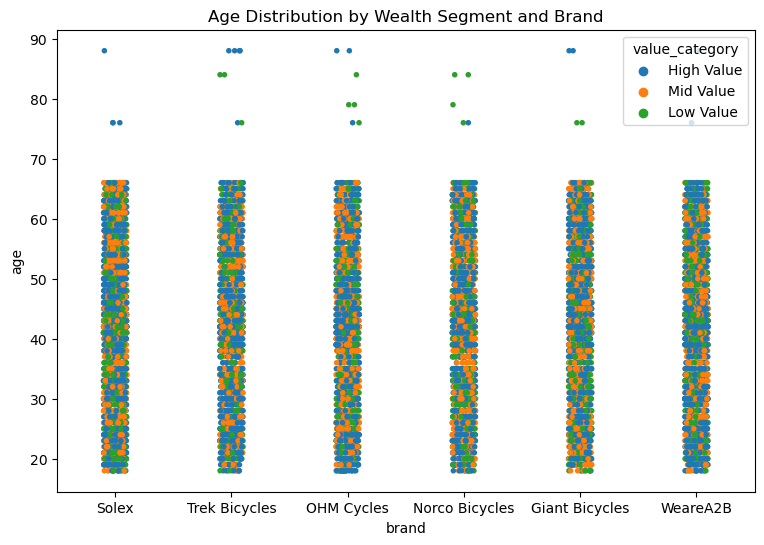

In [1234]:
plt.figure(figsize=(9, 6))
sns.stripplot(x='brand', y='age', hue = 'value_category',data=df, jitter=True,
                  color=None, size=4, edgecolor="gray", linewidth=0)
plt.title("Age Distribution by Wealth Segment and Brand")
#not a preferable brand for different value category

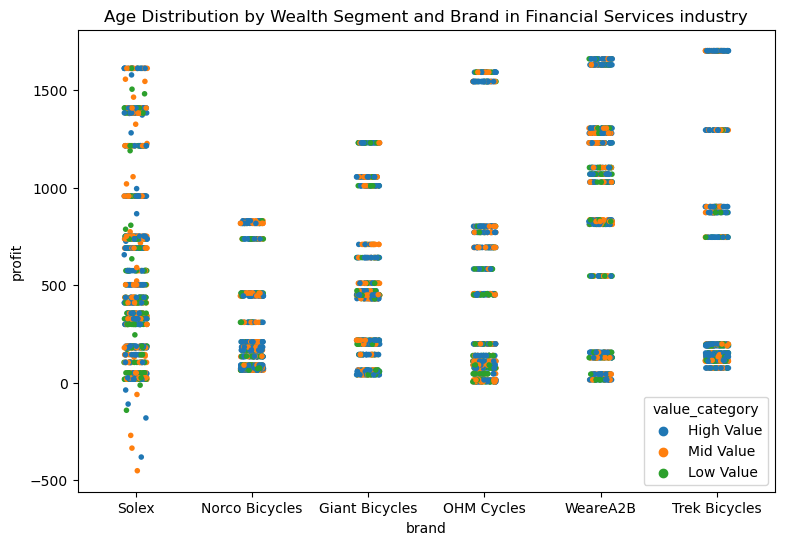

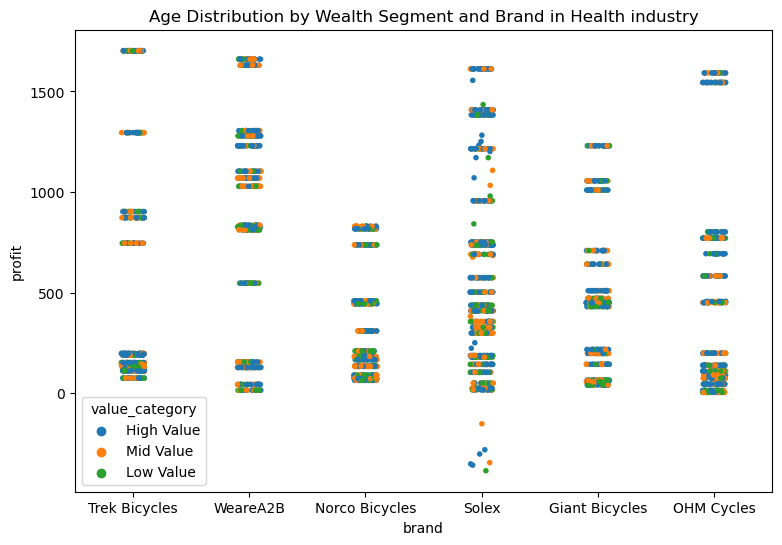

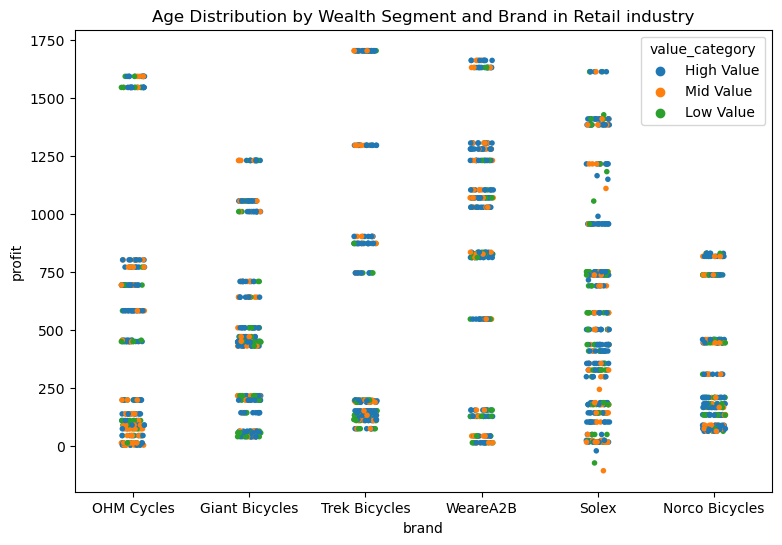

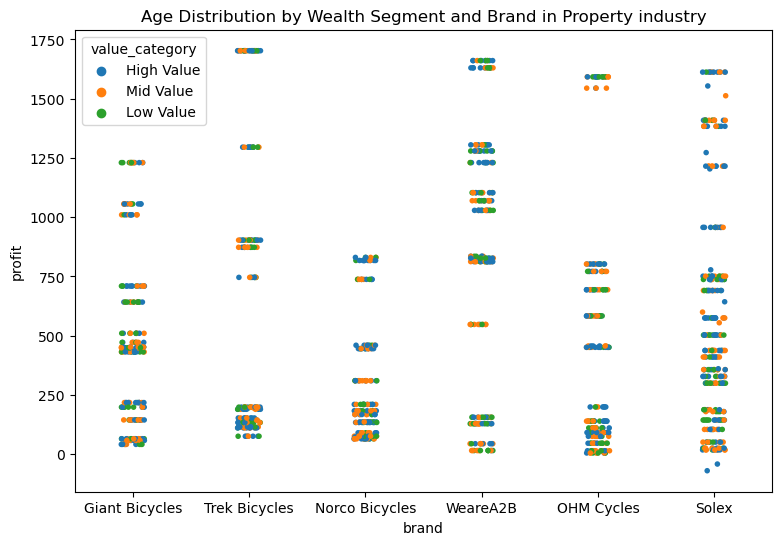

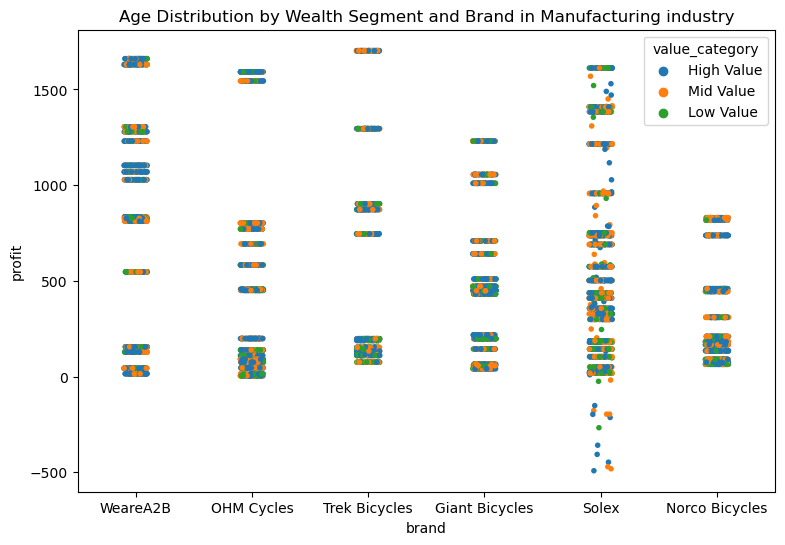

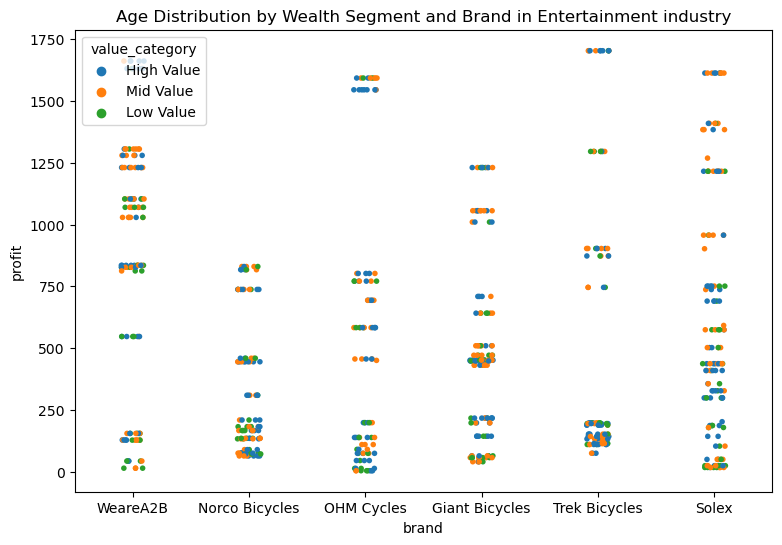

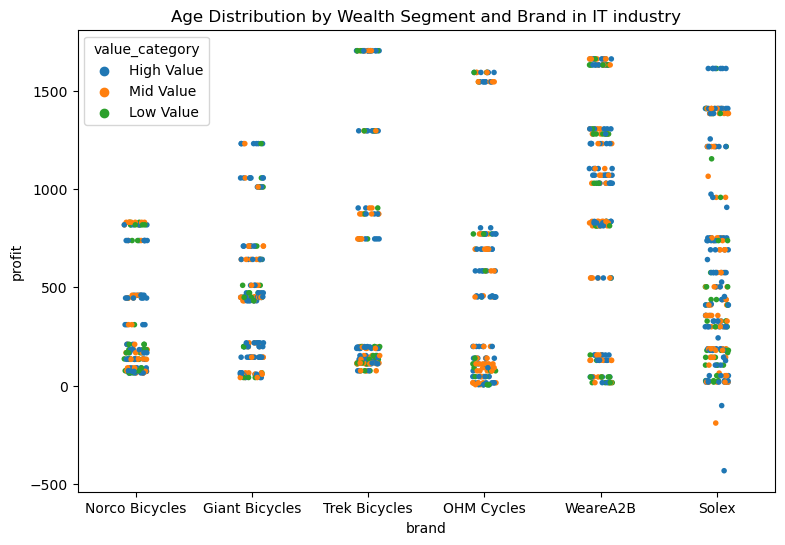

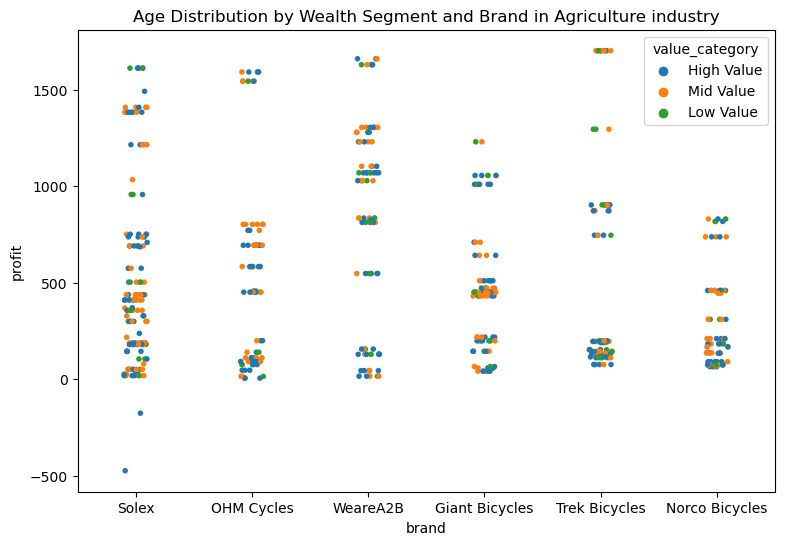

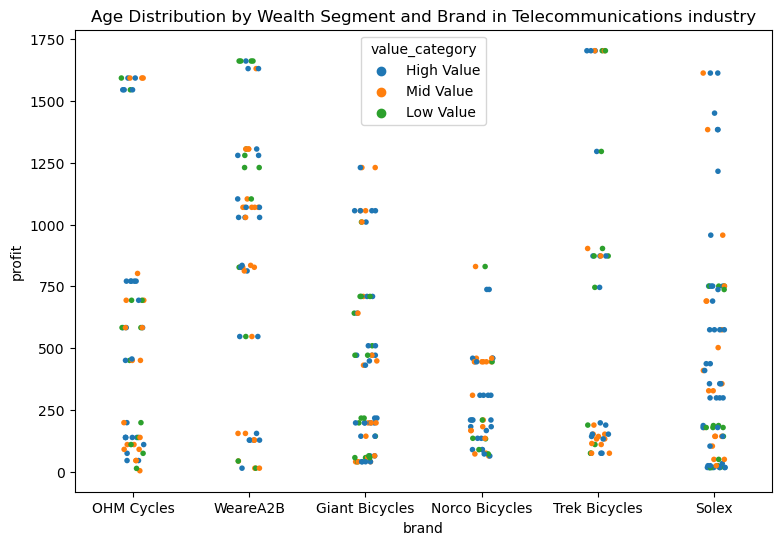

Text(0.5, 1.0, 'Age Distribution by Wealth Segment and value_category')

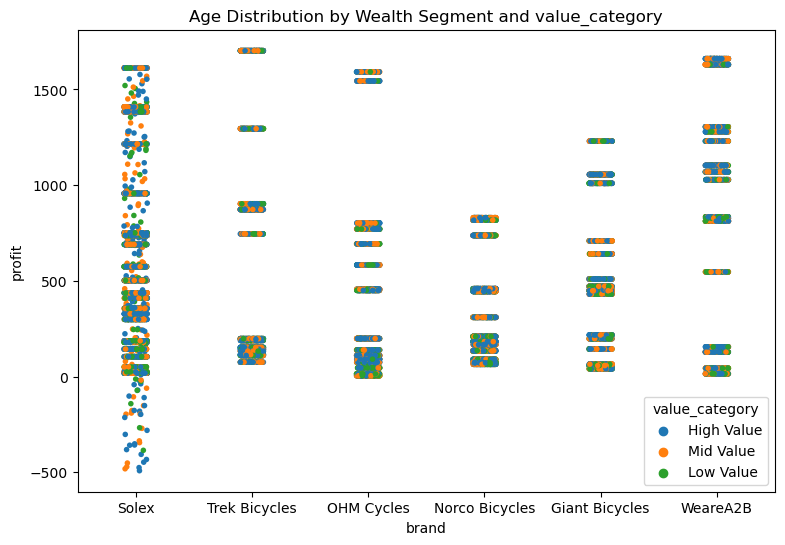

In [1235]:
plt.figure(figsize=(9, 6))
sns.stripplot(x='brand', y='profit', hue = 'value_category',data=df, jitter=True,
                  color=None, size=4, edgecolor="gray", linewidth=0)
plt.title("Age Distribution by Wealth Segment and value_category")
#brand Noroco typically generate lower profit

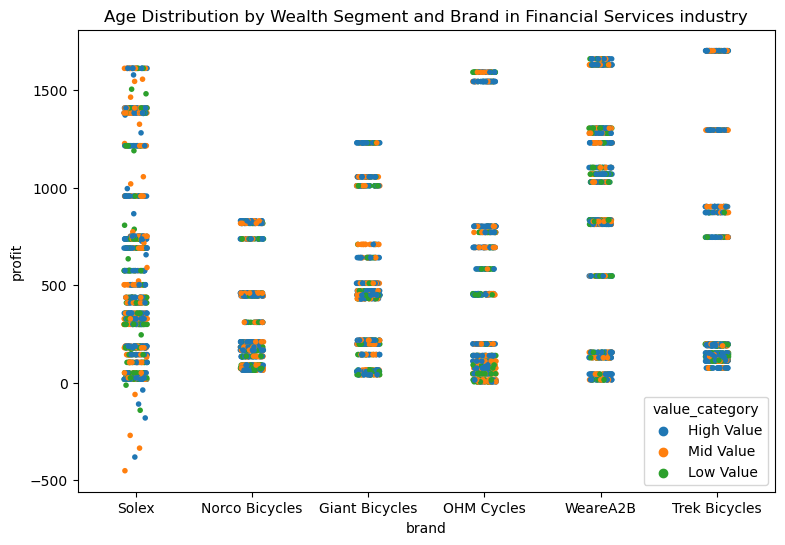

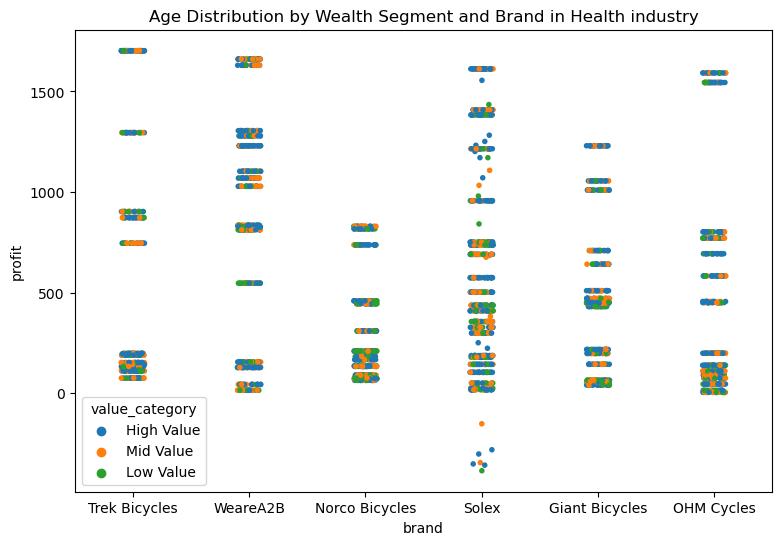

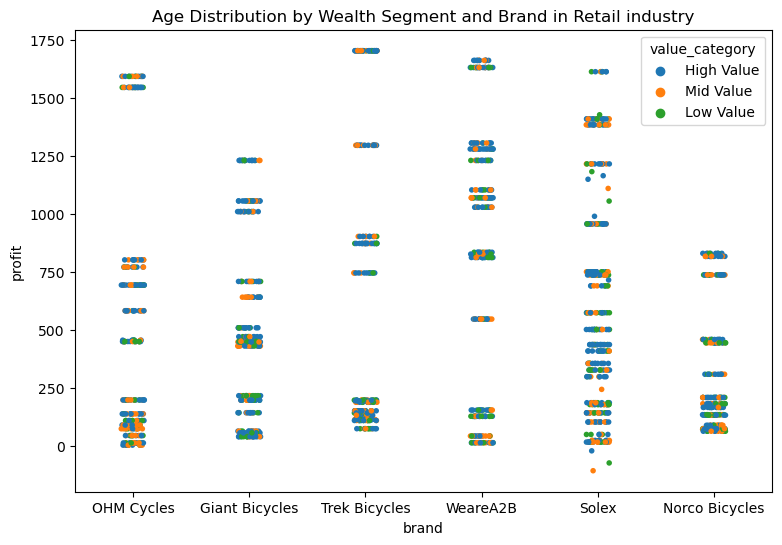

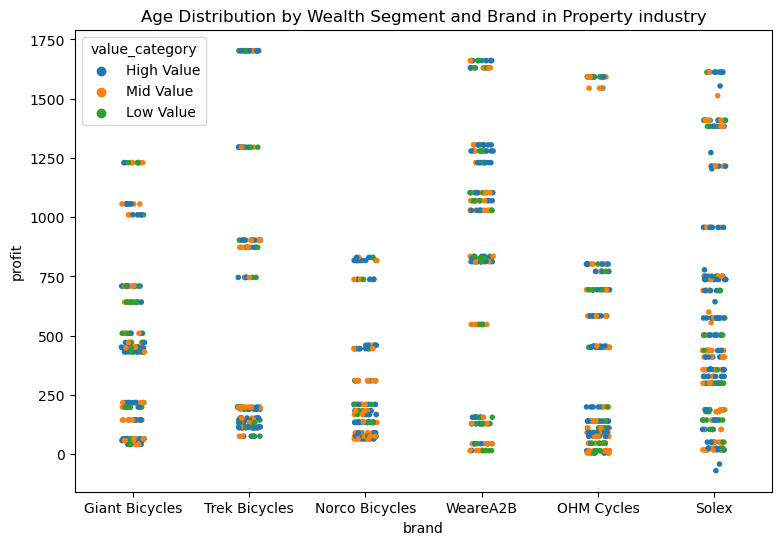

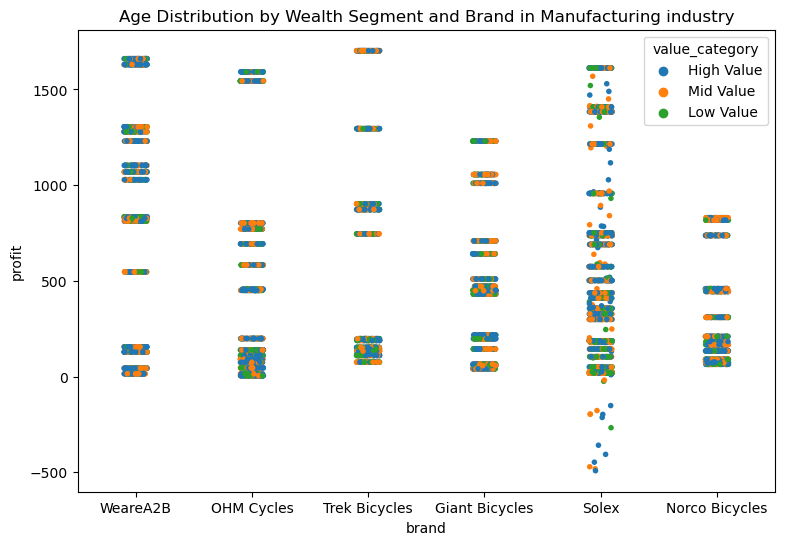

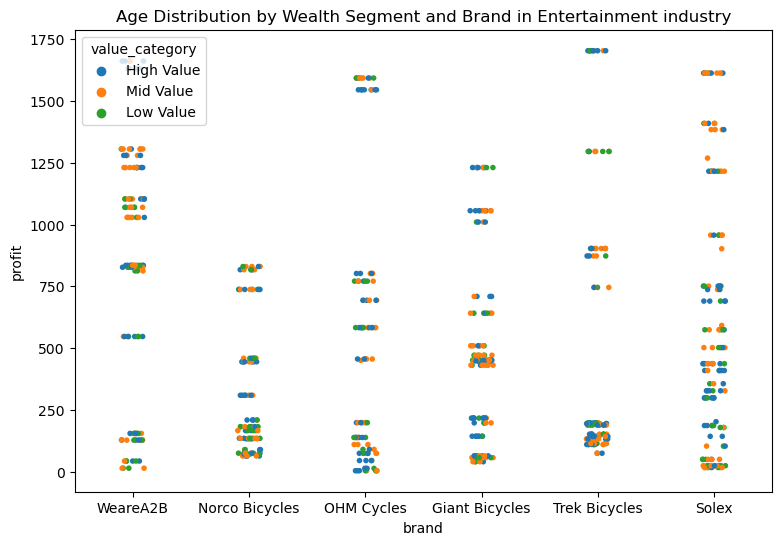

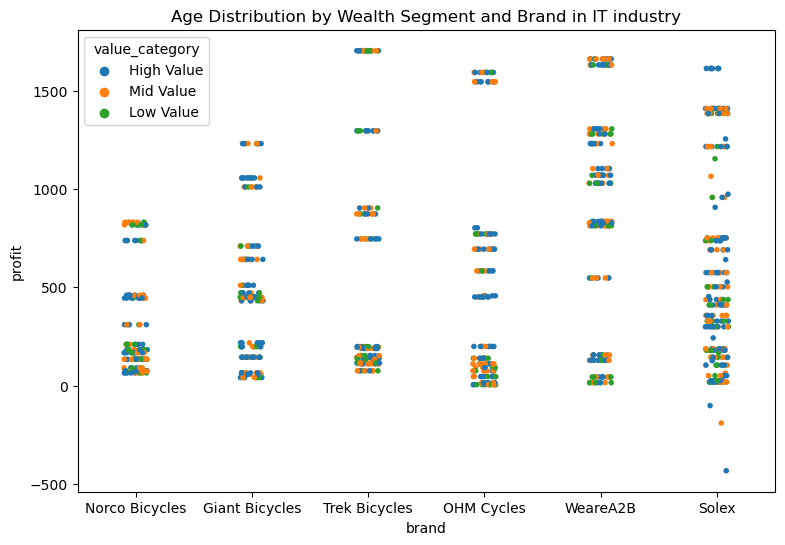

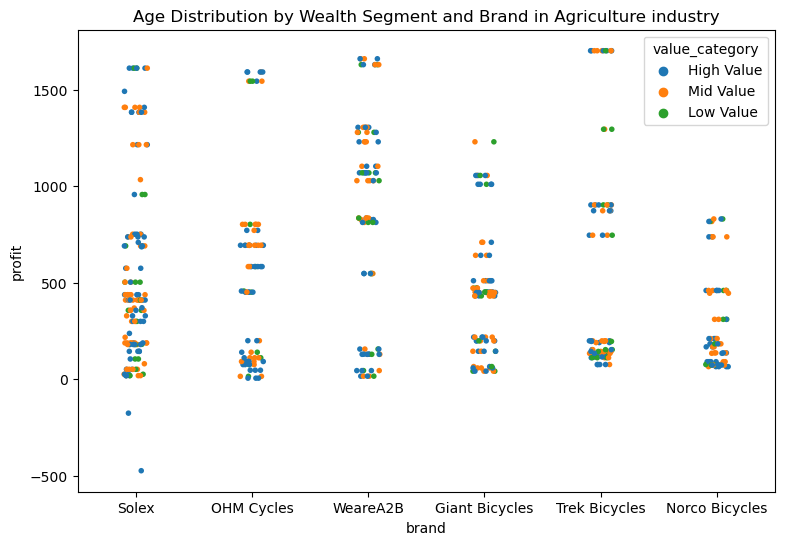

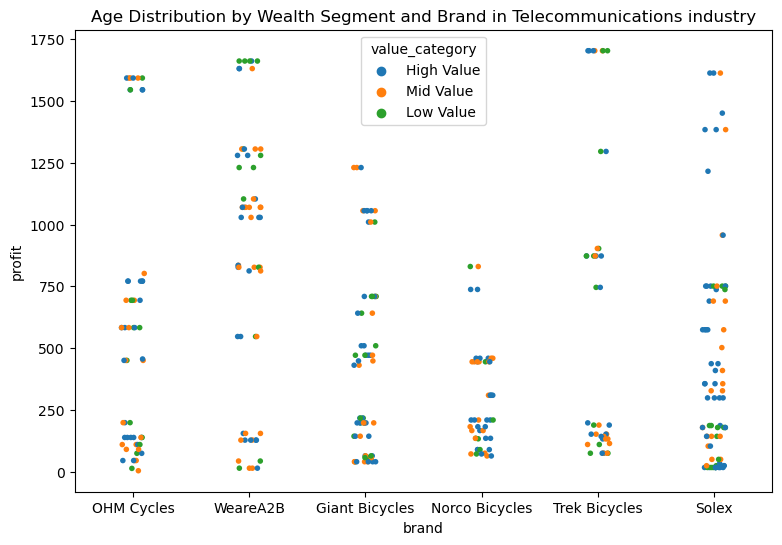

In [1240]:
for i in df.job_industry_category.unique():
    plt.figure(figsize=(9, 6))
    sns.stripplot(x='brand', y='profit', hue = 'value_category',data=df[df.job_industry_category == i] , jitter=True,
                    color=None, size=4, edgecolor="gray", linewidth=0)
    plt.title(f"Age Distribution by Wealth Segment and Brand in {i} industry")